# Download Tweets

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import time

## Authentication

In [2]:
bearer_token = ###
client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

## Get Tweet Counts

In [3]:
def get_tweet_counts(keyword, start_time, end_time, retweet=False):
    
    if retweet:
        query = f'{keyword} lang:tr'
    else:
        query = f'{keyword} lang:tr -is:retweet'
        
    counts = client.get_all_tweets_count(query=query, granularity='day',
                                         start_time=start_time, end_time=end_time)
    
    df = pd.DataFrame(counts.data)
    df = df[["start", "tweet_count"]]
    df["start"] = pd.to_datetime(df["start"]).dt.date
    df.rename({"start":"date"}, axis=1, inplace=True)
    df["keyword"] = keyword
    return df

In [4]:
keywords = ["akp", "akparti", "ak parti", "erdogan", "recep tayyip erdogan",
            "chp",  "kilicdaroglu", "kemal kilicdaroglu",
            "mhp",  "bahceli", "devlet bahceli",
            "hdp", "demirtas", "selahattin demirtas",
            "iyiparti", "iyi parti", "aksener", "meral aksener",
            "dolar", "euro", "lira", "kur"]

akp_keywords = ["akp", "akparti", "ak parti", "erdogan", "recep tayyip erdogan"]
chp_keywords = ["chp", "kilicdaroglu", "kemal kilicdaroglu"]
mhp_keywords = ["mhp", "bahceli", "devlet bahceli"]
hdp_keywords = ["hdp", "demirtas", "selahattin demirtas"]
iyi_keywords = ["iyiparti", "iyi parti", "aksener", "meral aksener"]

keywords_lists = [akp_keywords, chp_keywords, mhp_keywords, hdp_keywords, iyi_keywords]
keywords_lists_str = ["AKP", "CHP", "MHP", "HDP", "İYİ"]

In [5]:
nov_df = pd.DataFrame(columns=["date", "tweet_count", "keyword"])

for keyword in keywords:
    nov_df = nov_df.append(get_tweet_counts(keyword=keyword, retweet=False,
                                            start_time="2021-11-01T00:00:00Z", end_time="2021-12-01T00:00:00Z"))
    
nov_df.reset_index(drop=True, inplace=True)

In [6]:
dec_df = pd.DataFrame(columns=["date", "tweet_count", "keyword"])

for keyword in keywords:
    dec_df = dec_df.append(get_tweet_counts(keyword=keyword, retweet=False,
                                            start_time="2021-12-01T00:00:00Z", end_time="2022-01-01T00:00:00Z"))
    
dec_df.reset_index(drop=True, inplace=True)

In [7]:
tweet_counts = pd.concat([nov_df, dec_df]).reset_index(drop=True)
tweet_counts["date"] = pd.to_datetime(tweet_counts["date"])
tweet_counts = tweet_counts.sort_values(["keyword", "date"]).reset_index(drop=True)
tweet_counts["date_str"] = tweet_counts["date"].astype(str).apply(lambda x: x[5:])
tweet_counts = tweet_counts[["date", "date_str", "keyword", "tweet_count"]]

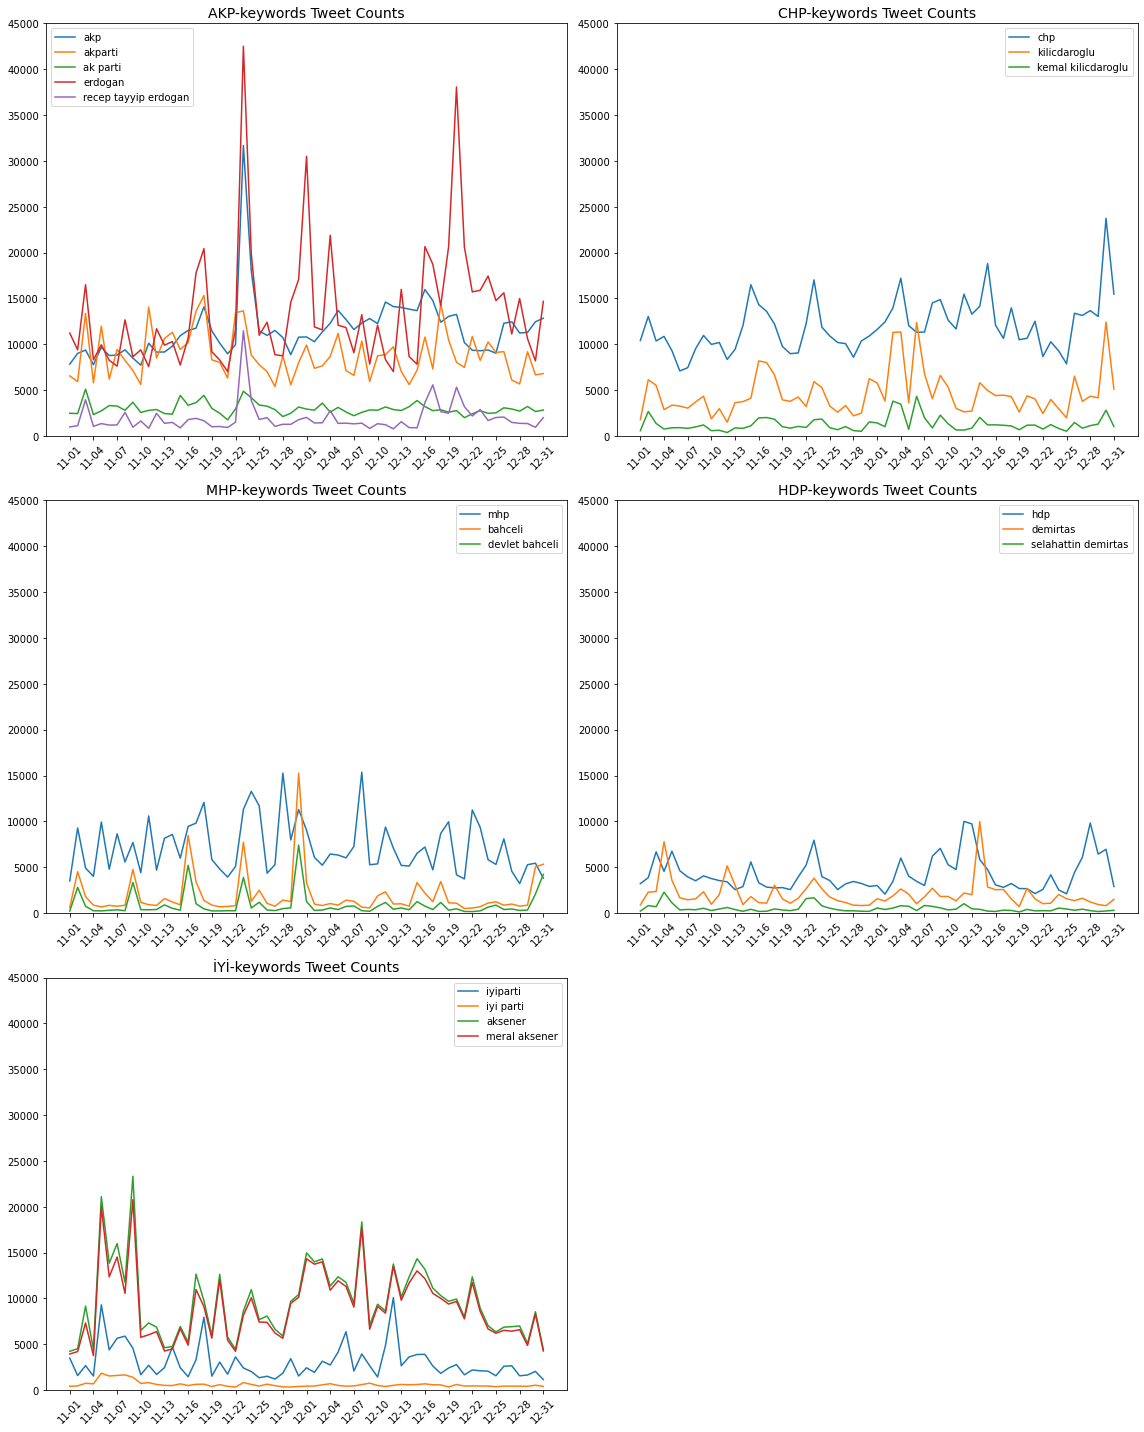

In [8]:
plt.figure(figsize=(16, 20))

for i, keywords_list in enumerate(keywords_lists):    
    plt.subplot(3, 2, i+1)
    for keyword in keywords_list:
        df = tweet_counts[tweet_counts["keyword"] == keyword][["date_str", "tweet_count"]]
        plt.plot(df["date_str"], df["tweet_count"], label=keyword)
        plt.title(f"{keywords_lists_str[i]}-keywords Tweet Counts", fontsize=14)
        
    plt.ylim([0, 45000])
    plt.xticks(df["date_str"][::3], rotation=45)
    plt.legend()
    
plt.tight_layout()
plt.show()

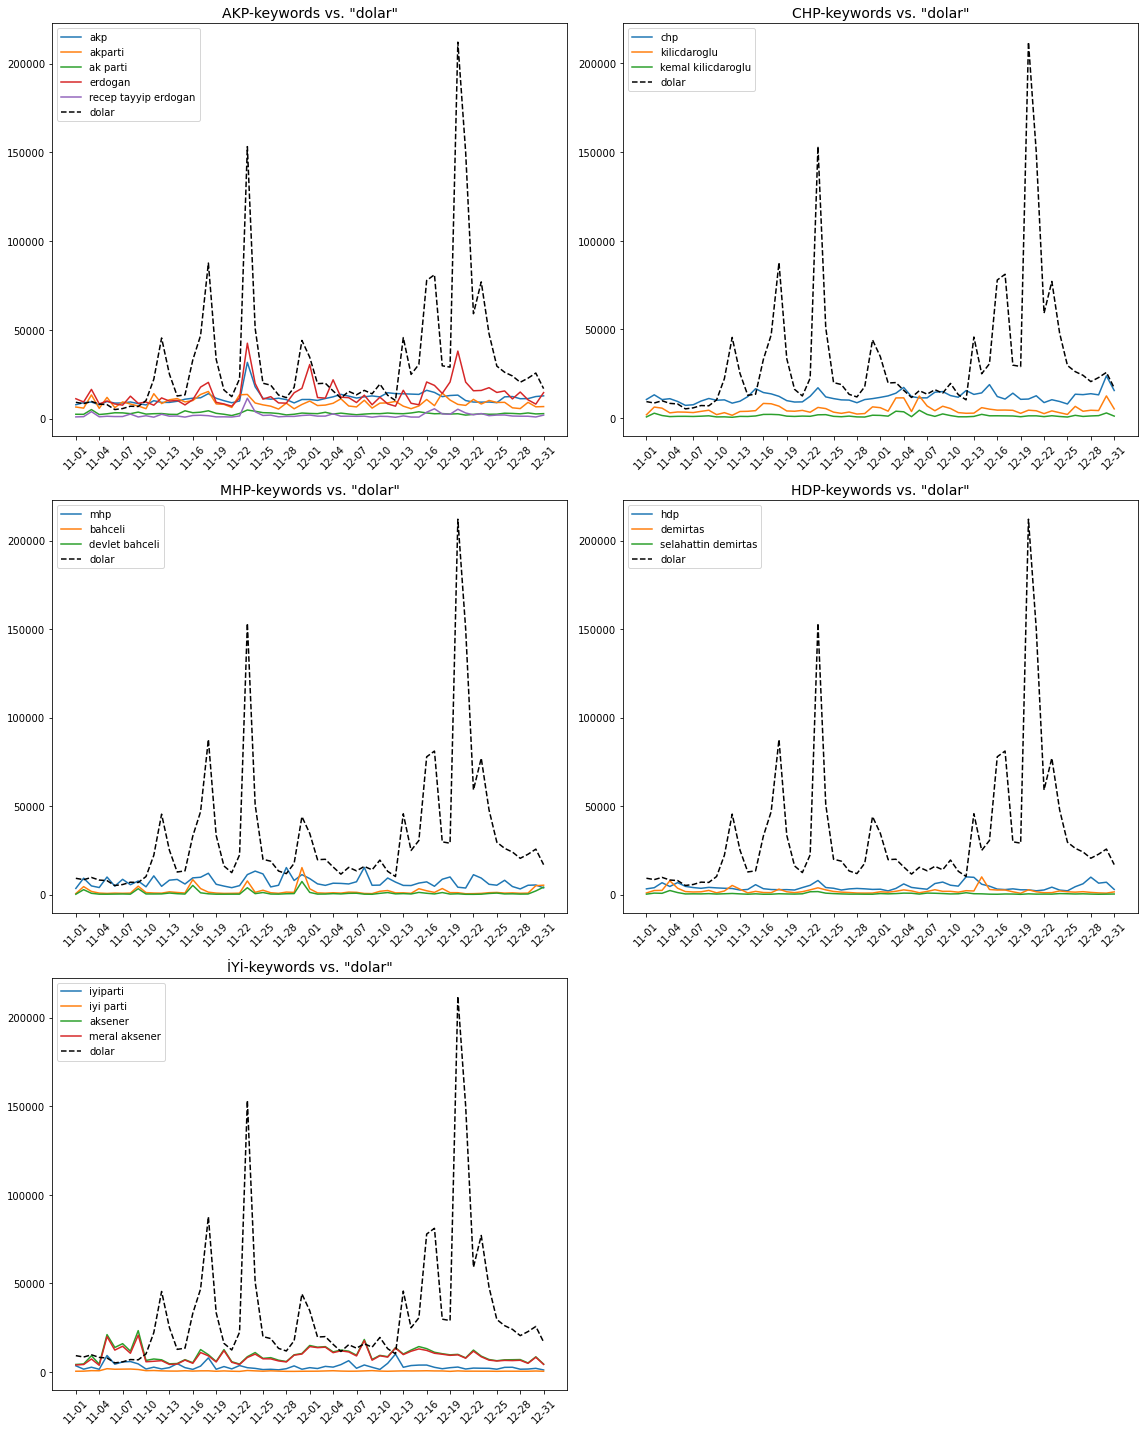

In [9]:
plt.figure(figsize=(16, 20))

for i, keywords_list in enumerate(keywords_lists):    
    plt.subplot(3, 2, i+1)
    for keyword in keywords_list:
        df = tweet_counts[tweet_counts["keyword"] == keyword][["date_str", "tweet_count"]]
        df_dolar = tweet_counts[tweet_counts["keyword"] == "dolar"][["date_str", "tweet_count"]]
        plt.plot(df["date_str"], df["tweet_count"], label=keyword)
        plt.title(f'{keywords_lists_str[i]}-keywords vs. "dolar"', fontsize=14)
    
    plt.plot(df_dolar["date_str"], df_dolar["tweet_count"], linestyle="--", color="k", label="dolar")

    plt.xticks(df["date_str"][::3], rotation=45)
    plt.legend()
    
plt.tight_layout()
plt.show()

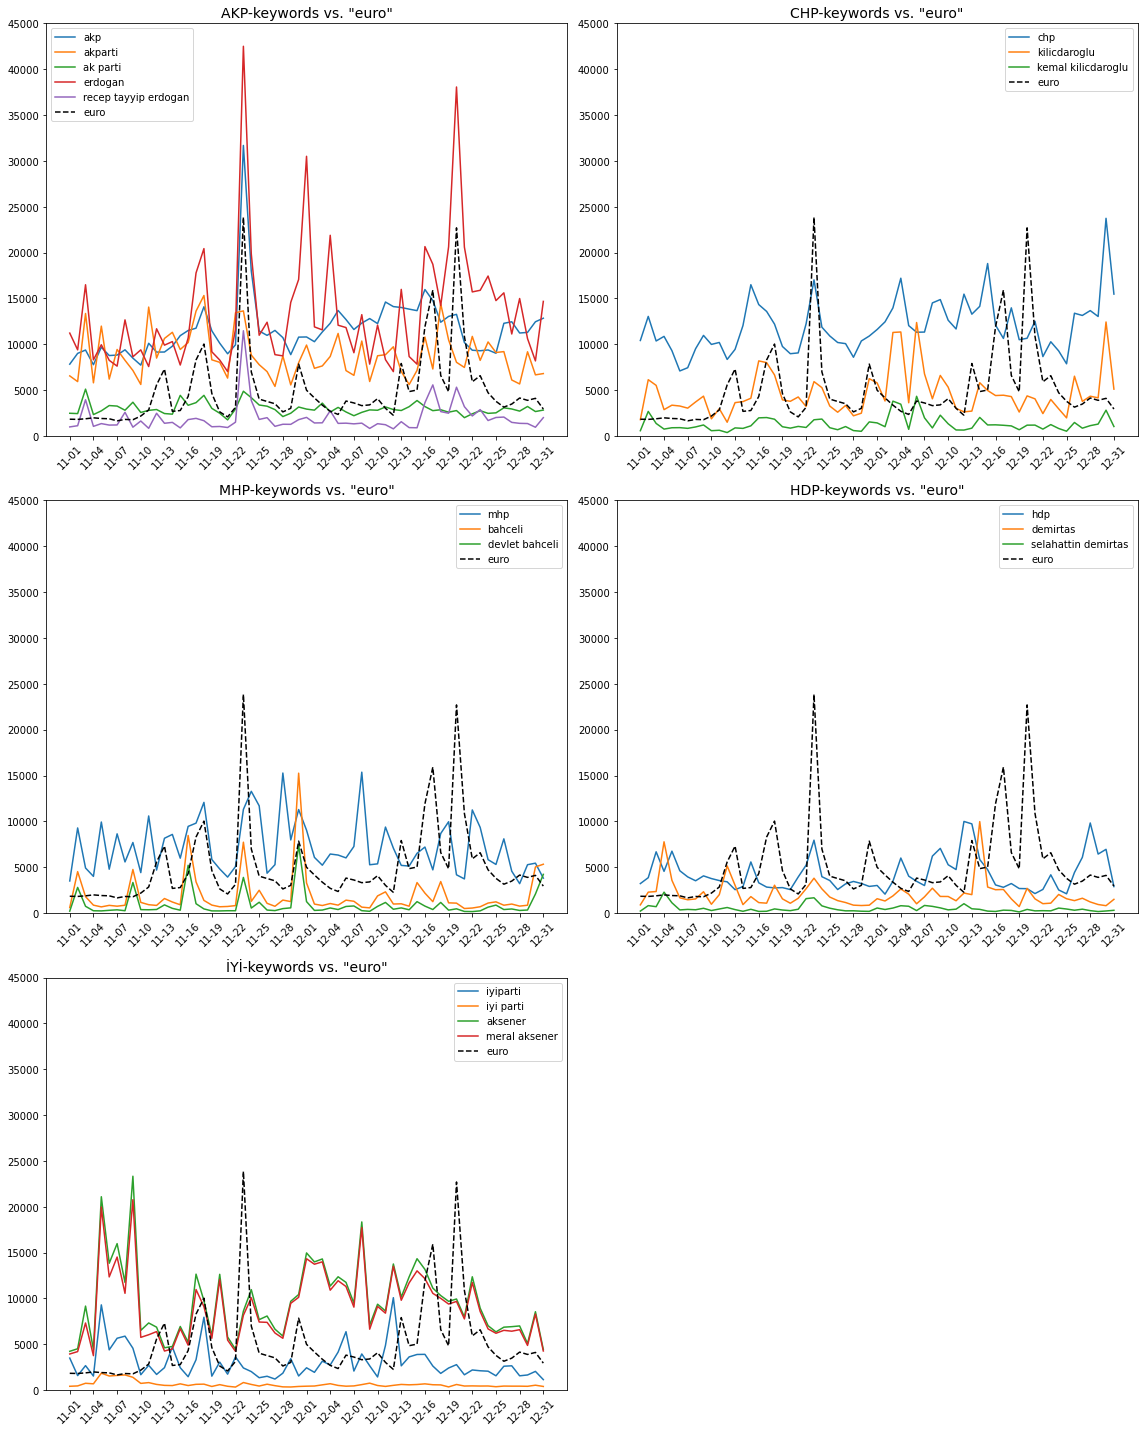

In [10]:
plt.figure(figsize=(16, 20))

for i, keywords_list in enumerate(keywords_lists):    
    plt.subplot(3, 2, i+1)
    for keyword in keywords_list:
        df = tweet_counts[tweet_counts["keyword"] == keyword][["date_str", "tweet_count"]]
        df_euro = tweet_counts[tweet_counts["keyword"] == "euro"][["date_str", "tweet_count"]]
        plt.plot(df["date_str"], df["tweet_count"], label=keyword)
        plt.title(f'{keywords_lists_str[i]}-keywords vs. "euro"', fontsize=14)
    
    plt.plot(df_euro["date_str"], df_euro["tweet_count"], linestyle="--", color="k", label="euro")
    
    plt.ylim([0, 45000])
    plt.xticks(df["date_str"][::3], rotation=45)
    plt.legend()
    
plt.tight_layout()
plt.show()

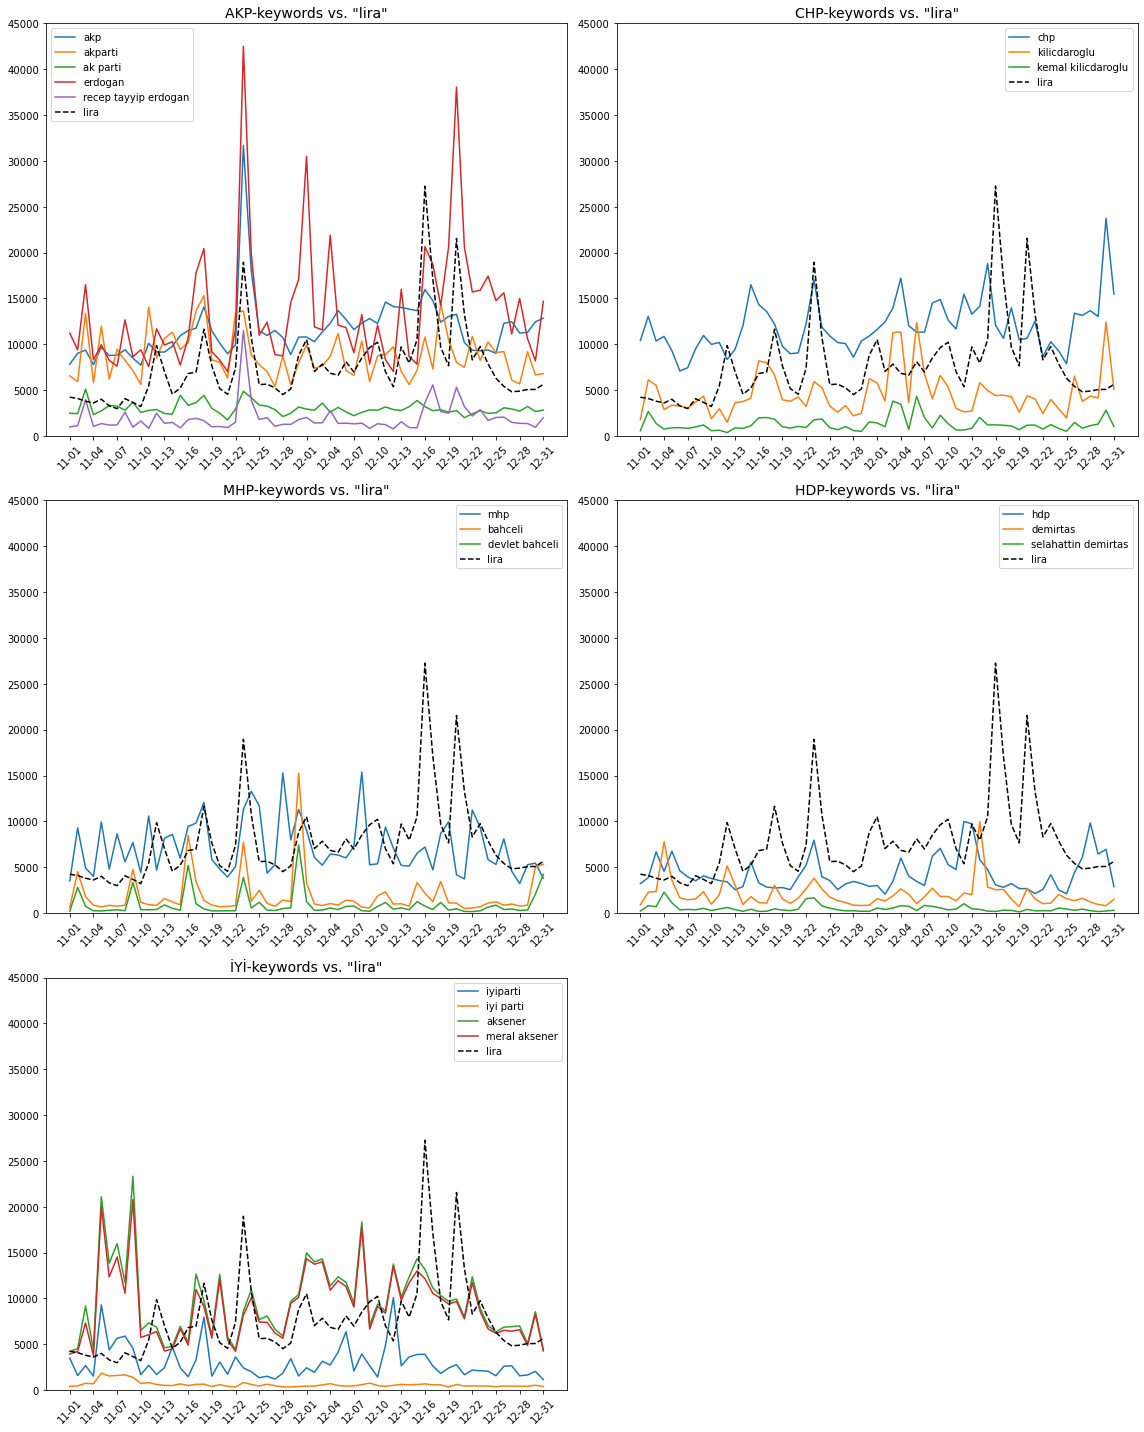

In [11]:
plt.figure(figsize=(16, 20))

for i, keywords_list in enumerate(keywords_lists):    
    plt.subplot(3, 2, i+1)
    for keyword in keywords_list:
        df = tweet_counts[tweet_counts["keyword"] == keyword][["date_str", "tweet_count"]]
        df_lira = tweet_counts[tweet_counts["keyword"] == "lira"][["date_str", "tweet_count"]]
        plt.plot(df["date_str"], df["tweet_count"], label=keyword)
        plt.title(f'{keywords_lists_str[i]}-keywords vs. "lira"', fontsize=14)
    
    plt.plot(df_lira["date_str"], df_lira["tweet_count"], linestyle="--", color="k", label="lira")
    
    plt.ylim([0, 45000])
    plt.xticks(df["date_str"][::3], rotation=45)
    plt.legend()
    
plt.tight_layout()
plt.show()

## Download Tweets

In [12]:
# Removing currency-related keywords

keywords = keywords[:-4]
tweet_counts = tweet_counts[tweet_counts["keyword"].isin(keywords)].sort_values(["keyword", "date"]).reset_index(drop=True)

In [13]:
pd.DataFrame(tweet_counts.groupby("keyword")["tweet_count"].sum().sort_values(ascending=False)).reset_index()

keyword tweet_count
0                erdogan      831208
1                    chp      730098
2                    akp      707791
3                aksener      587763
4          meral aksener      552809
5                akparti      537292
6                    mhp      438507
7           kilicdaroglu      283564
8                    hdp      260343
9               iyiparti      183680
10              ak parti      181747
11              demirtas      124830
12  recep tayyip erdogan      119334
13               bahceli      117993
14    kemal kilicdaroglu       78483
15        devlet bahceli       55919
16             iyi parti       37765
17   selahattin demirtas       29842

In [14]:
tweet_counts["tweet_count"].sum()

5858968

In [15]:
def time_formatter(time):
    return f"{'T'.join(str(time).split())}Z"

In [17]:
def download_tweets(keyword, start_time, end_time, n_tweets, retweet=False):
    
    # Formatting start_time and end_time
    start_time = time_formatter(start_time)
    end_time = time_formatter(end_time)
    
    
    # Defining query based on whether to include retweets or not
    if retweet:
        query = f'{keyword} lang:tr'
    else:
        query = f'{keyword} lang:tr -is:retweet'
        
        
    # Get tweet texts, created_at, tweet_id, author_id
    tweets = client.search_all_tweets(query=query, tweet_fields=["created_at"], expansions=['author_id'],
                         start_time=start_time, end_time=end_time, max_results=n_tweets)
    
    tweet_texts = []
    tweet_created_at = []
    tweet_ids = []
    author_ids = []
    
    print(f"Keyword: {keyword} | Time Range: {str(pd.to_datetime(start_time))[:-6]} - {str(pd.to_datetime(end_time))[:-6]} | # of tweets: {n_tweets}")
    for i, tweet in enumerate(tweets.data):
        #print(f"[{i+1}]\nTweet: {tweet.text}\nCreated at: {tweet.created_at}\nTweet ID: {tweet.id}\nAuthor ID: {tweet.author_id}\n")
        tweet_texts.append(tweet.text)
        tweet_created_at.append(tweet.created_at)
        tweet_ids.append(tweet.id)
        author_ids.append(tweet.author_id)
        
    # Get names and usernames from author_ids
    names = []
    usernames = []
    
    i = 0
    while i < len(author_ids):
        ids = author_ids[i:i+100]
        for user in client.get_users(ids=ids).data:
            names.append(user.name)
            usernames.append(user.username)   
        i += 100
        
    
    # Creating DataFrame
    df = pd.DataFrame([pd.Series(tweet_texts, name="tweet_text"),
                       pd.Series(tweet_created_at, name="tweet_created_at"),
                       pd.Series([keyword]*len(tweet_texts), name="keyword"),
                       pd.Series(tweet_ids, name="tweet_id"),
                       pd.Series(author_ids, name="author_id"),
                       pd.Series(names, name="author_name"),
                       pd.Series(usernames, name="author_username")]).T
    
    return df

In [18]:
time_range = pd.date_range(start=pd.to_datetime("2021/11/01"), end=pd.to_datetime("2022/01/01"), freq="H")

In [19]:
tweets_df = pd.DataFrame(columns=['tweet_text', 'tweet_created_at', 'keyword', 'tweet_id',
                                  'author_id', 'author_name', 'author_username'])

In [20]:
for i in range(len(time_range)-1):
    print(f"Iteration #{i} in {len(time_range)-1} | Progress: {i/(len(time_range)-1)*100:.2f}%")
    for keyword in keywords:
        try:
            tweets_df = tweets_df.append(download_tweets(keyword=keyword,
                                                         start_time=time_range[i],
                                                         end_time=time_range[i+1],
                                                         n_tweets=10,
                                                         retweet=False))
            print(f"Total Tweets Downloaded: {tweets_df.shape[0]}\n")
        except:
            print(f"No tweet for {keyword} in time range {time_range[i]} - {time_range[i+1]}")
        time.sleep(3)
    time.sleep(5)
        
tweets_df.reset_index(drop=True, inplace=True)

Iteration #0 in 1464 | Progress: 0.00%
Keyword: akp | Time Range: 2021-11-01 00:00:00 - 2021-11-01 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 9

Keyword: akparti | Time Range: 2021-11-01 00:00:00 - 2021-11-01 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 19

Keyword: ak parti | Time Range: 2021-11-01 00:00:00 - 2021-11-01 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 29

Keyword: erdogan | Time Range: 2021-11-01 00:00:00 - 2021-11-01 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 38

Keyword: recep tayyip erdogan | Time Range: 2021-11-01 00:00:00 - 2021-11-01 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 47

Keyword: chp | Time Range: 2021-11-01 00:00:00 - 2021-11-01 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 57

Keyword: kilicdaroglu | Time Range: 2021-11-01 00:00:00 - 2021-11-01 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 67

Keyword: kemal kilicdaroglu | Time Range: 2021-11-01 00:00:00 - 2021-11-01 01:00:00 | # of tweets: 10
Total Twe

Keyword: devlet bahceli | Time Range: 2021-11-01 03:00:00 - 2021-11-01 04:00:00 | # of tweets: 10
No tweet for devlet bahceli in time range 2021-11-01 03:00:00 - 2021-11-01 04:00:00
Keyword: hdp | Time Range: 2021-11-01 03:00:00 - 2021-11-01 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 446

Keyword: demirtas | Time Range: 2021-11-01 03:00:00 - 2021-11-01 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 452

Keyword: selahattin demirtas | Time Range: 2021-11-01 03:00:00 - 2021-11-01 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 455

Keyword: iyiparti | Time Range: 2021-11-01 03:00:00 - 2021-11-01 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 457

Keyword: iyi parti | Time Range: 2021-11-01 03:00:00 - 2021-11-01 04:00:00 | # of tweets: 10
No tweet for iyi parti in time range 2021-11-01 03:00:00 - 2021-11-01 04:00:00
Keyword: aksener | Time Range: 2021-11-01 03:00:00 - 2021-11-01 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 467

Keyword: meral aksener | Time R

Total Tweets Downloaded: 982

Keyword: erdogan | Time Range: 2021-11-01 07:00:00 - 2021-11-01 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 992

Keyword: recep tayyip erdogan | Time Range: 2021-11-01 07:00:00 - 2021-11-01 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 1002

Keyword: chp | Time Range: 2021-11-01 07:00:00 - 2021-11-01 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 1012

Keyword: kilicdaroglu | Time Range: 2021-11-01 07:00:00 - 2021-11-01 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 1022

Keyword: kemal kilicdaroglu | Time Range: 2021-11-01 07:00:00 - 2021-11-01 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 1032

Keyword: mhp | Time Range: 2021-11-01 07:00:00 - 2021-11-01 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 1042

Keyword: bahceli | Time Range: 2021-11-01 07:00:00 - 2021-11-01 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 1052

Keyword: devlet bahceli | Time Range: 2021-11-01 07:00:00 - 2021-11-01 08:00:00 | # of tweets: 1

Keyword: iyiparti | Time Range: 2021-11-01 10:00:00 - 2021-11-01 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 1620

Keyword: iyi parti | Time Range: 2021-11-01 10:00:00 - 2021-11-01 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 1630

Keyword: aksener | Time Range: 2021-11-01 10:00:00 - 2021-11-01 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 1640

Keyword: meral aksener | Time Range: 2021-11-01 10:00:00 - 2021-11-01 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 1650

Iteration #11 in 1464 | Progress: 0.75%
Keyword: akp | Time Range: 2021-11-01 11:00:00 - 2021-11-01 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 1660

Keyword: akparti | Time Range: 2021-11-01 11:00:00 - 2021-11-01 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 1669

Keyword: ak parti | Time Range: 2021-11-01 11:00:00 - 2021-11-01 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 1679

Keyword: erdogan | Time Range: 2021-11-01 11:00:00 - 2021-11-01 12:00:00 | # of tweets: 10
Total Twe

Total Tweets Downloaded: 2233

Keyword: kemal kilicdaroglu | Time Range: 2021-11-01 14:00:00 - 2021-11-01 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 2243

Keyword: mhp | Time Range: 2021-11-01 14:00:00 - 2021-11-01 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 2253

Keyword: bahceli | Time Range: 2021-11-01 14:00:00 - 2021-11-01 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 2263

Keyword: devlet bahceli | Time Range: 2021-11-01 14:00:00 - 2021-11-01 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 2273

Keyword: hdp | Time Range: 2021-11-01 14:00:00 - 2021-11-01 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 2283

Keyword: demirtas | Time Range: 2021-11-01 14:00:00 - 2021-11-01 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 2293

Keyword: selahattin demirtas | Time Range: 2021-11-01 14:00:00 - 2021-11-01 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 2303

Keyword: iyiparti | Time Range: 2021-11-01 14:00:00 - 2021-11-01 15:00:00 | # of tweets: 10


Total Tweets Downloaded: 2855

Iteration #18 in 1464 | Progress: 1.23%
Keyword: akp | Time Range: 2021-11-01 18:00:00 - 2021-11-01 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 2865

Keyword: akparti | Time Range: 2021-11-01 18:00:00 - 2021-11-01 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 2875

Keyword: ak parti | Time Range: 2021-11-01 18:00:00 - 2021-11-01 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 2885

Keyword: erdogan | Time Range: 2021-11-01 18:00:00 - 2021-11-01 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 2895

Keyword: recep tayyip erdogan | Time Range: 2021-11-01 18:00:00 - 2021-11-01 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 2905

Keyword: chp | Time Range: 2021-11-01 18:00:00 - 2021-11-01 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 2914

Keyword: kilicdaroglu | Time Range: 2021-11-01 18:00:00 - 2021-11-01 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 2924

Keyword: kemal kilicdaroglu | Time Range: 2021-11-01 18:00:00 - 

Total Tweets Downloaded: 3494

Keyword: hdp | Time Range: 2021-11-01 21:00:00 - 2021-11-01 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 3504

Keyword: demirtas | Time Range: 2021-11-01 21:00:00 - 2021-11-01 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 3514

Keyword: selahattin demirtas | Time Range: 2021-11-01 21:00:00 - 2021-11-01 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 3523

Keyword: iyiparti | Time Range: 2021-11-01 21:00:00 - 2021-11-01 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 3533

Keyword: iyi parti | Time Range: 2021-11-01 21:00:00 - 2021-11-01 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 3543

Keyword: aksener | Time Range: 2021-11-01 21:00:00 - 2021-11-01 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 3553

Keyword: meral aksener | Time Range: 2021-11-01 21:00:00 - 2021-11-01 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 3563

Iteration #22 in 1464 | Progress: 1.50%
Keyword: akp | Time Range: 2021-11-01 22:00:00 - 2021-11-

Keyword: erdogan | Time Range: 2021-11-02 01:00:00 - 2021-11-02 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 4051

Keyword: recep tayyip erdogan | Time Range: 2021-11-02 01:00:00 - 2021-11-02 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 4058

Keyword: chp | Time Range: 2021-11-02 01:00:00 - 2021-11-02 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 4068

Keyword: kilicdaroglu | Time Range: 2021-11-02 01:00:00 - 2021-11-02 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 4076

Keyword: kemal kilicdaroglu | Time Range: 2021-11-02 01:00:00 - 2021-11-02 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 4080

Keyword: mhp | Time Range: 2021-11-02 01:00:00 - 2021-11-02 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 4087

Keyword: bahceli | Time Range: 2021-11-02 01:00:00 - 2021-11-02 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 4091

Keyword: devlet bahceli | Time Range: 2021-11-02 01:00:00 - 2021-11-02 02:00:00 | # of tweets: 10
No tweet for devlet bahceli

Total Tweets Downloaded: 4521

Keyword: selahattin demirtas | Time Range: 2021-11-02 04:00:00 - 2021-11-02 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 4529

Keyword: iyiparti | Time Range: 2021-11-02 04:00:00 - 2021-11-02 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 4539

Keyword: iyi parti | Time Range: 2021-11-02 04:00:00 - 2021-11-02 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 4546

Keyword: aksener | Time Range: 2021-11-02 04:00:00 - 2021-11-02 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 4556

Keyword: meral aksener | Time Range: 2021-11-02 04:00:00 - 2021-11-02 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 4566

Iteration #29 in 1464 | Progress: 1.98%
Keyword: akp | Time Range: 2021-11-02 05:00:00 - 2021-11-02 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 4576

Keyword: akparti | Time Range: 2021-11-02 05:00:00 - 2021-11-02 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 4586

Keyword: ak parti | Time Range: 2021-11-02 05:00:00 - 2021

Total Tweets Downloaded: 5126

Keyword: kilicdaroglu | Time Range: 2021-11-02 08:00:00 - 2021-11-02 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 5136

Keyword: kemal kilicdaroglu | Time Range: 2021-11-02 08:00:00 - 2021-11-02 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 5146

Keyword: mhp | Time Range: 2021-11-02 08:00:00 - 2021-11-02 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 5154

Keyword: bahceli | Time Range: 2021-11-02 08:00:00 - 2021-11-02 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 5164

Keyword: devlet bahceli | Time Range: 2021-11-02 08:00:00 - 2021-11-02 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 5174

Keyword: hdp | Time Range: 2021-11-02 08:00:00 - 2021-11-02 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 5184

Keyword: demirtas | Time Range: 2021-11-02 08:00:00 - 2021-11-02 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 5194

Keyword: selahattin demirtas | Time Range: 2021-11-02 08:00:00 - 2021-11-02 09:00:00 | # of tweets:

Total Tweets Downloaded: 5762

Keyword: meral aksener | Time Range: 2021-11-02 11:00:00 - 2021-11-02 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 5772

Iteration #36 in 1464 | Progress: 2.46%
Keyword: akp | Time Range: 2021-11-02 12:00:00 - 2021-11-02 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 5782

Keyword: akparti | Time Range: 2021-11-02 12:00:00 - 2021-11-02 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 5792

Keyword: ak parti | Time Range: 2021-11-02 12:00:00 - 2021-11-02 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 5802

Keyword: erdogan | Time Range: 2021-11-02 12:00:00 - 2021-11-02 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 5812

Keyword: recep tayyip erdogan | Time Range: 2021-11-02 12:00:00 - 2021-11-02 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 5822

Keyword: chp | Time Range: 2021-11-02 12:00:00 - 2021-11-02 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 5832

Keyword: kilicdaroglu | Time Range: 2021-11-02 12:00:00 - 2021-

Keyword: devlet bahceli | Time Range: 2021-11-02 15:00:00 - 2021-11-02 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 6407

Keyword: hdp | Time Range: 2021-11-02 15:00:00 - 2021-11-02 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 6417

Keyword: demirtas | Time Range: 2021-11-02 15:00:00 - 2021-11-02 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 6427

Keyword: selahattin demirtas | Time Range: 2021-11-02 15:00:00 - 2021-11-02 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 6437

Keyword: iyiparti | Time Range: 2021-11-02 15:00:00 - 2021-11-02 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 6447

Keyword: iyi parti | Time Range: 2021-11-02 15:00:00 - 2021-11-02 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 6457

Keyword: aksener | Time Range: 2021-11-02 15:00:00 - 2021-11-02 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 6467

Keyword: meral aksener | Time Range: 2021-11-02 15:00:00 - 2021-11-02 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 6477


Total Tweets Downloaded: 7031

Keyword: erdogan | Time Range: 2021-11-02 19:00:00 - 2021-11-02 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 7040

Keyword: recep tayyip erdogan | Time Range: 2021-11-02 19:00:00 - 2021-11-02 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 7050

Keyword: chp | Time Range: 2021-11-02 19:00:00 - 2021-11-02 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 7060

Keyword: kilicdaroglu | Time Range: 2021-11-02 19:00:00 - 2021-11-02 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 7070

Keyword: kemal kilicdaroglu | Time Range: 2021-11-02 19:00:00 - 2021-11-02 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 7079

Keyword: mhp | Time Range: 2021-11-02 19:00:00 - 2021-11-02 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 7089

Keyword: bahceli | Time Range: 2021-11-02 19:00:00 - 2021-11-02 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 7099

Keyword: devlet bahceli | Time Range: 2021-11-02 19:00:00 - 2021-11-02 20:00:00 | # of tweets:

Total Tweets Downloaded: 7671

Keyword: iyiparti | Time Range: 2021-11-02 22:00:00 - 2021-11-02 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 7681

Keyword: iyi parti | Time Range: 2021-11-02 22:00:00 - 2021-11-02 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 7691

Keyword: aksener | Time Range: 2021-11-02 22:00:00 - 2021-11-02 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 7700

Keyword: meral aksener | Time Range: 2021-11-02 22:00:00 - 2021-11-02 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 7709

Iteration #47 in 1464 | Progress: 3.21%
Keyword: akp | Time Range: 2021-11-02 23:00:00 - 2021-11-03 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 7719

Keyword: akparti | Time Range: 2021-11-02 23:00:00 - 2021-11-03 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 7728

Keyword: ak parti | Time Range: 2021-11-02 23:00:00 - 2021-11-03 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 7737

Keyword: erdogan | Time Range: 2021-11-02 23:00:00 - 2021-11-03 00:00

Keyword: kilicdaroglu | Time Range: 2021-11-03 02:00:00 - 2021-11-03 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 8241

Keyword: kemal kilicdaroglu | Time Range: 2021-11-03 02:00:00 - 2021-11-03 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 8245

Keyword: mhp | Time Range: 2021-11-03 02:00:00 - 2021-11-03 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 8255

Keyword: bahceli | Time Range: 2021-11-03 02:00:00 - 2021-11-03 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 8262

Keyword: devlet bahceli | Time Range: 2021-11-03 02:00:00 - 2021-11-03 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 8263

Keyword: hdp | Time Range: 2021-11-03 02:00:00 - 2021-11-03 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 8273

Keyword: demirtas | Time Range: 2021-11-03 02:00:00 - 2021-11-03 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 8280

Keyword: selahattin demirtas | Time Range: 2021-11-03 02:00:00 - 2021-11-03 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 82

Keyword: meral aksener | Time Range: 2021-11-03 05:00:00 - 2021-11-03 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 8819

Iteration #54 in 1464 | Progress: 3.69%
Keyword: akp | Time Range: 2021-11-03 06:00:00 - 2021-11-03 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 8829

Keyword: akparti | Time Range: 2021-11-03 06:00:00 - 2021-11-03 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 8839

Keyword: ak parti | Time Range: 2021-11-03 06:00:00 - 2021-11-03 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 8849

Keyword: erdogan | Time Range: 2021-11-03 06:00:00 - 2021-11-03 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 8859

Keyword: recep tayyip erdogan | Time Range: 2021-11-03 06:00:00 - 2021-11-03 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 8869

Keyword: chp | Time Range: 2021-11-03 06:00:00 - 2021-11-03 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 8879

Keyword: kilicdaroglu | Time Range: 2021-11-03 06:00:00 - 2021-11-03 07:00:00 | # of tweets: 1

Total Tweets Downloaded: 9438

Keyword: devlet bahceli | Time Range: 2021-11-03 09:00:00 - 2021-11-03 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 9448

Keyword: hdp | Time Range: 2021-11-03 09:00:00 - 2021-11-03 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 9457

Keyword: demirtas | Time Range: 2021-11-03 09:00:00 - 2021-11-03 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 9467

Keyword: selahattin demirtas | Time Range: 2021-11-03 09:00:00 - 2021-11-03 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 9476

Keyword: iyiparti | Time Range: 2021-11-03 09:00:00 - 2021-11-03 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 9486

Keyword: iyi parti | Time Range: 2021-11-03 09:00:00 - 2021-11-03 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 9495

Keyword: aksener | Time Range: 2021-11-03 09:00:00 - 2021-11-03 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 9504

Keyword: meral aksener | Time Range: 2021-11-03 09:00:00 - 2021-11-03 10:00:00 | # of tweets: 10

Keyword: erdogan | Time Range: 2021-11-03 13:00:00 - 2021-11-03 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 10086

Keyword: recep tayyip erdogan | Time Range: 2021-11-03 13:00:00 - 2021-11-03 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 10096

Keyword: chp | Time Range: 2021-11-03 13:00:00 - 2021-11-03 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 10106

Keyword: kilicdaroglu | Time Range: 2021-11-03 13:00:00 - 2021-11-03 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 10116

Keyword: kemal kilicdaroglu | Time Range: 2021-11-03 13:00:00 - 2021-11-03 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 10126

Keyword: mhp | Time Range: 2021-11-03 13:00:00 - 2021-11-03 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 10136

Keyword: bahceli | Time Range: 2021-11-03 13:00:00 - 2021-11-03 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 10146

Keyword: devlet bahceli | Time Range: 2021-11-03 13:00:00 - 2021-11-03 14:00:00 | # of tweets: 10
Total Tweets Downloa

Total Tweets Downloaded: 10710

Keyword: iyiparti | Time Range: 2021-11-03 16:00:00 - 2021-11-03 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 10720

Keyword: iyi parti | Time Range: 2021-11-03 16:00:00 - 2021-11-03 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 10730

Keyword: aksener | Time Range: 2021-11-03 16:00:00 - 2021-11-03 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 10739

Keyword: meral aksener | Time Range: 2021-11-03 16:00:00 - 2021-11-03 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 10748

Iteration #65 in 1464 | Progress: 4.44%
Keyword: akp | Time Range: 2021-11-03 17:00:00 - 2021-11-03 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 10758

Keyword: akparti | Time Range: 2021-11-03 17:00:00 - 2021-11-03 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 10768

Keyword: ak parti | Time Range: 2021-11-03 17:00:00 - 2021-11-03 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 10778

Keyword: erdogan | Time Range: 2021-11-03 17:00:00 - 2021-11-

Keyword: kilicdaroglu | Time Range: 2021-11-03 20:00:00 - 2021-11-03 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 11337

Keyword: kemal kilicdaroglu | Time Range: 2021-11-03 20:00:00 - 2021-11-03 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 11347

Keyword: mhp | Time Range: 2021-11-03 20:00:00 - 2021-11-03 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 11355

Keyword: bahceli | Time Range: 2021-11-03 20:00:00 - 2021-11-03 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 11364

Keyword: devlet bahceli | Time Range: 2021-11-03 20:00:00 - 2021-11-03 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 11373

Keyword: hdp | Time Range: 2021-11-03 20:00:00 - 2021-11-03 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 11383

Keyword: demirtas | Time Range: 2021-11-03 20:00:00 - 2021-11-03 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 11391

Keyword: selahattin demirtas | Time Range: 2021-11-03 20:00:00 - 2021-11-03 21:00:00 | # of tweets: 10
Total Tweets Downloa

Total Tweets Downloaded: 11940

Keyword: meral aksener | Time Range: 2021-11-03 23:00:00 - 2021-11-04 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 11950

Iteration #72 in 1464 | Progress: 4.92%
Keyword: akp | Time Range: 2021-11-04 00:00:00 - 2021-11-04 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 11959

Keyword: akparti | Time Range: 2021-11-04 00:00:00 - 2021-11-04 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 11968

Keyword: ak parti | Time Range: 2021-11-04 00:00:00 - 2021-11-04 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 11974

Keyword: erdogan | Time Range: 2021-11-04 00:00:00 - 2021-11-04 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 11984

Keyword: recep tayyip erdogan | Time Range: 2021-11-04 00:00:00 - 2021-11-04 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 11994

Keyword: chp | Time Range: 2021-11-04 00:00:00 - 2021-11-04 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 12004

Keyword: kilicdaroglu | Time Range: 2021-11-04 00:00:00

Total Tweets Downloaded: 12450

Keyword: bahceli | Time Range: 2021-11-04 03:00:00 - 2021-11-04 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 12459

Keyword: devlet bahceli | Time Range: 2021-11-04 03:00:00 - 2021-11-04 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 12464

Keyword: hdp | Time Range: 2021-11-04 03:00:00 - 2021-11-04 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 12474

Keyword: demirtas | Time Range: 2021-11-04 03:00:00 - 2021-11-04 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 12483

Keyword: selahattin demirtas | Time Range: 2021-11-04 03:00:00 - 2021-11-04 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 12487

Keyword: iyiparti | Time Range: 2021-11-04 03:00:00 - 2021-11-04 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 12493

Keyword: iyi parti | Time Range: 2021-11-04 03:00:00 - 2021-11-04 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 12497

Keyword: aksener | Time Range: 2021-11-04 03:00:00 - 2021-11-04 04:00:00 | # of tweets: 

Keyword: akparti | Time Range: 2021-11-04 07:00:00 - 2021-11-04 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 13058

Keyword: ak parti | Time Range: 2021-11-04 07:00:00 - 2021-11-04 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 13068

Keyword: erdogan | Time Range: 2021-11-04 07:00:00 - 2021-11-04 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 13078

Keyword: recep tayyip erdogan | Time Range: 2021-11-04 07:00:00 - 2021-11-04 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 13088

Keyword: chp | Time Range: 2021-11-04 07:00:00 - 2021-11-04 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 13098

Keyword: kilicdaroglu | Time Range: 2021-11-04 07:00:00 - 2021-11-04 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 13108

Keyword: kemal kilicdaroglu | Time Range: 2021-11-04 07:00:00 - 2021-11-04 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 13118

Keyword: mhp | Time Range: 2021-11-04 07:00:00 - 2021-11-04 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 1

Total Tweets Downloaded: 13685

Keyword: demirtas | Time Range: 2021-11-04 10:00:00 - 2021-11-04 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 13695

Keyword: selahattin demirtas | Time Range: 2021-11-04 10:00:00 - 2021-11-04 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 13705

Keyword: iyiparti | Time Range: 2021-11-04 10:00:00 - 2021-11-04 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 13714

Keyword: iyi parti | Time Range: 2021-11-04 10:00:00 - 2021-11-04 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 13724

Keyword: aksener | Time Range: 2021-11-04 10:00:00 - 2021-11-04 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 13734

Keyword: meral aksener | Time Range: 2021-11-04 10:00:00 - 2021-11-04 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 13744

Iteration #83 in 1464 | Progress: 5.67%
Keyword: akp | Time Range: 2021-11-04 11:00:00 - 2021-11-04 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 13754

Keyword: akparti | Time Range: 2021-11-04 11:00:0

Keyword: recep tayyip erdogan | Time Range: 2021-11-04 14:00:00 - 2021-11-04 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 14325

Keyword: chp | Time Range: 2021-11-04 14:00:00 - 2021-11-04 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 14335

Keyword: kilicdaroglu | Time Range: 2021-11-04 14:00:00 - 2021-11-04 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 14344

Keyword: kemal kilicdaroglu | Time Range: 2021-11-04 14:00:00 - 2021-11-04 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 14354

Keyword: mhp | Time Range: 2021-11-04 14:00:00 - 2021-11-04 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 14364

Keyword: bahceli | Time Range: 2021-11-04 14:00:00 - 2021-11-04 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 14374

Keyword: devlet bahceli | Time Range: 2021-11-04 14:00:00 - 2021-11-04 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 14383

Keyword: hdp | Time Range: 2021-11-04 14:00:00 - 2021-11-04 15:00:00 | # of tweets: 10
Total Tweets Downloaded:

Total Tweets Downloaded: 14946

Keyword: iyi parti | Time Range: 2021-11-04 17:00:00 - 2021-11-04 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 14955

Keyword: aksener | Time Range: 2021-11-04 17:00:00 - 2021-11-04 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 14965

Keyword: meral aksener | Time Range: 2021-11-04 17:00:00 - 2021-11-04 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 14975

Iteration #90 in 1464 | Progress: 6.15%
Keyword: akp | Time Range: 2021-11-04 18:00:00 - 2021-11-04 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 14983

Keyword: akparti | Time Range: 2021-11-04 18:00:00 - 2021-11-04 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 14993

Keyword: ak parti | Time Range: 2021-11-04 18:00:00 - 2021-11-04 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 15003

Keyword: erdogan | Time Range: 2021-11-04 18:00:00 - 2021-11-04 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 15013

Keyword: recep tayyip erdogan | Time Range: 2021-11-04 18:00:0

Keyword: kemal kilicdaroglu | Time Range: 2021-11-04 21:00:00 - 2021-11-04 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 15581

Keyword: mhp | Time Range: 2021-11-04 21:00:00 - 2021-11-04 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 15587

Keyword: bahceli | Time Range: 2021-11-04 21:00:00 - 2021-11-04 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 15597

Keyword: devlet bahceli | Time Range: 2021-11-04 21:00:00 - 2021-11-04 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 15607

Keyword: hdp | Time Range: 2021-11-04 21:00:00 - 2021-11-04 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 15616

Keyword: demirtas | Time Range: 2021-11-04 21:00:00 - 2021-11-04 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 15626

Keyword: selahattin demirtas | Time Range: 2021-11-04 21:00:00 - 2021-11-04 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 15636

Keyword: iyiparti | Time Range: 2021-11-04 21:00:00 - 2021-11-04 22:00:00 | # of tweets: 10
Total Tweets Downloaded:

Total Tweets Downloaded: 16136

Iteration #97 in 1464 | Progress: 6.63%
Keyword: akp | Time Range: 2021-11-05 01:00:00 - 2021-11-05 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 16145

Keyword: akparti | Time Range: 2021-11-05 01:00:00 - 2021-11-05 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 16154

Keyword: ak parti | Time Range: 2021-11-05 01:00:00 - 2021-11-05 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 16159

Keyword: erdogan | Time Range: 2021-11-05 01:00:00 - 2021-11-05 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 16169

Keyword: recep tayyip erdogan | Time Range: 2021-11-05 01:00:00 - 2021-11-05 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 16172

Keyword: chp | Time Range: 2021-11-05 01:00:00 - 2021-11-05 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 16182

Keyword: kilicdaroglu | Time Range: 2021-11-05 01:00:00 - 2021-11-05 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 16189

Keyword: kemal kilicdaroglu | Time Range: 2021-11-05 01:

Keyword: bahceli | Time Range: 2021-11-05 04:00:00 - 2021-11-05 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 16638

Keyword: devlet bahceli | Time Range: 2021-11-05 04:00:00 - 2021-11-05 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 16641

Keyword: hdp | Time Range: 2021-11-05 04:00:00 - 2021-11-05 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 16651

Keyword: demirtas | Time Range: 2021-11-05 04:00:00 - 2021-11-05 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 16661

Keyword: selahattin demirtas | Time Range: 2021-11-05 04:00:00 - 2021-11-05 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 16671

Keyword: iyiparti | Time Range: 2021-11-05 04:00:00 - 2021-11-05 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 16681

Keyword: iyi parti | Time Range: 2021-11-05 04:00:00 - 2021-11-05 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 16689

Keyword: aksener | Time Range: 2021-11-05 04:00:00 - 2021-11-05 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 1669

Total Tweets Downloaded: 17240

Keyword: ak parti | Time Range: 2021-11-05 08:00:00 - 2021-11-05 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 17250

Keyword: erdogan | Time Range: 2021-11-05 08:00:00 - 2021-11-05 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 17260

Keyword: recep tayyip erdogan | Time Range: 2021-11-05 08:00:00 - 2021-11-05 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 17270

Keyword: chp | Time Range: 2021-11-05 08:00:00 - 2021-11-05 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 17277

Keyword: kilicdaroglu | Time Range: 2021-11-05 08:00:00 - 2021-11-05 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 17286

Keyword: kemal kilicdaroglu | Time Range: 2021-11-05 08:00:00 - 2021-11-05 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 17295

Keyword: mhp | Time Range: 2021-11-05 08:00:00 - 2021-11-05 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 17305

Keyword: bahceli | Time Range: 2021-11-05 08:00:00 - 2021-11-05 09:00:00 | # of tweet

Total Tweets Downloaded: 17873

Keyword: selahattin demirtas | Time Range: 2021-11-05 11:00:00 - 2021-11-05 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 17883

Keyword: iyiparti | Time Range: 2021-11-05 11:00:00 - 2021-11-05 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 17893

Keyword: iyi parti | Time Range: 2021-11-05 11:00:00 - 2021-11-05 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 17903

Keyword: aksener | Time Range: 2021-11-05 11:00:00 - 2021-11-05 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 17913

Keyword: meral aksener | Time Range: 2021-11-05 11:00:00 - 2021-11-05 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 17923

Iteration #108 in 1464 | Progress: 7.38%
Keyword: akp | Time Range: 2021-11-05 12:00:00 - 2021-11-05 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 17933

Keyword: akparti | Time Range: 2021-11-05 12:00:00 - 2021-11-05 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 17943

Keyword: ak parti | Time Range: 2021-11-05 12:00:

Total Tweets Downloaded: 18499

Keyword: chp | Time Range: 2021-11-05 15:00:00 - 2021-11-05 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 18509

Keyword: kilicdaroglu | Time Range: 2021-11-05 15:00:00 - 2021-11-05 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 18518

Keyword: kemal kilicdaroglu | Time Range: 2021-11-05 15:00:00 - 2021-11-05 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 18528

Keyword: mhp | Time Range: 2021-11-05 15:00:00 - 2021-11-05 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 18538

Keyword: bahceli | Time Range: 2021-11-05 15:00:00 - 2021-11-05 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 18548

Keyword: devlet bahceli | Time Range: 2021-11-05 15:00:00 - 2021-11-05 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 18558

Keyword: hdp | Time Range: 2021-11-05 15:00:00 - 2021-11-05 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 18568

Keyword: demirtas | Time Range: 2021-11-05 15:00:00 - 2021-11-05 16:00:00 | # of tweets: 10
Tota

Total Tweets Downloaded: 19129

Keyword: aksener | Time Range: 2021-11-05 18:00:00 - 2021-11-05 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 19138

Keyword: meral aksener | Time Range: 2021-11-05 18:00:00 - 2021-11-05 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 19147

Iteration #115 in 1464 | Progress: 7.86%
Keyword: akp | Time Range: 2021-11-05 19:00:00 - 2021-11-05 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 19157

Keyword: akparti | Time Range: 2021-11-05 19:00:00 - 2021-11-05 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 19167

Keyword: ak parti | Time Range: 2021-11-05 19:00:00 - 2021-11-05 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 19177

Keyword: erdogan | Time Range: 2021-11-05 19:00:00 - 2021-11-05 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 19187

Keyword: recep tayyip erdogan | Time Range: 2021-11-05 19:00:00 - 2021-11-05 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 19196

Keyword: chp | Time Range: 2021-11-05 19:00:00 - 2

Total Tweets Downloaded: 19755

Keyword: mhp | Time Range: 2021-11-05 22:00:00 - 2021-11-05 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 19765

Keyword: bahceli | Time Range: 2021-11-05 22:00:00 - 2021-11-05 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 19774

Keyword: devlet bahceli | Time Range: 2021-11-05 22:00:00 - 2021-11-05 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 19780

Keyword: hdp | Time Range: 2021-11-05 22:00:00 - 2021-11-05 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 19790

Keyword: demirtas | Time Range: 2021-11-05 22:00:00 - 2021-11-05 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 19800

Keyword: selahattin demirtas | Time Range: 2021-11-05 22:00:00 - 2021-11-05 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 19810

Keyword: iyiparti | Time Range: 2021-11-05 22:00:00 - 2021-11-05 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 19820

Keyword: iyi parti | Time Range: 2021-11-05 22:00:00 - 2021-11-05 23:00:00 | # of tweets: 10
T

Total Tweets Downloaded: 20319

Iteration #122 in 1464 | Progress: 8.33%
Keyword: akp | Time Range: 2021-11-06 02:00:00 - 2021-11-06 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 20329

Keyword: akparti | Time Range: 2021-11-06 02:00:00 - 2021-11-06 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 20339

Keyword: ak parti | Time Range: 2021-11-06 02:00:00 - 2021-11-06 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 20349

Keyword: erdogan | Time Range: 2021-11-06 02:00:00 - 2021-11-06 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 20359

Keyword: recep tayyip erdogan | Time Range: 2021-11-06 02:00:00 - 2021-11-06 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 20367

Keyword: chp | Time Range: 2021-11-06 02:00:00 - 2021-11-06 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 20377

Keyword: kilicdaroglu | Time Range: 2021-11-06 02:00:00 - 2021-11-06 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 20385

Keyword: kemal kilicdaroglu | Time Range: 2021-11-06 02

Keyword: devlet bahceli | Time Range: 2021-11-06 05:00:00 - 2021-11-06 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 20893

Keyword: hdp | Time Range: 2021-11-06 05:00:00 - 2021-11-06 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 20903

Keyword: demirtas | Time Range: 2021-11-06 05:00:00 - 2021-11-06 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 20913

Keyword: selahattin demirtas | Time Range: 2021-11-06 05:00:00 - 2021-11-06 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 20922

Keyword: iyiparti | Time Range: 2021-11-06 05:00:00 - 2021-11-06 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 20932

Keyword: iyi parti | Time Range: 2021-11-06 05:00:00 - 2021-11-06 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 20942

Keyword: aksener | Time Range: 2021-11-06 05:00:00 - 2021-11-06 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 20952

Keyword: meral aksener | Time Range: 2021-11-06 05:00:00 - 2021-11-06 06:00:00 | # of tweets: 10
Total Tweets Downloaded

Keyword: erdogan | Time Range: 2021-11-06 09:00:00 - 2021-11-06 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 21525

Keyword: recep tayyip erdogan | Time Range: 2021-11-06 09:00:00 - 2021-11-06 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 21535

Keyword: chp | Time Range: 2021-11-06 09:00:00 - 2021-11-06 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 21544

Keyword: kilicdaroglu | Time Range: 2021-11-06 09:00:00 - 2021-11-06 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 21554

Keyword: kemal kilicdaroglu | Time Range: 2021-11-06 09:00:00 - 2021-11-06 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 21563

Keyword: mhp | Time Range: 2021-11-06 09:00:00 - 2021-11-06 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 21573

Keyword: bahceli | Time Range: 2021-11-06 09:00:00 - 2021-11-06 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 21583

Keyword: devlet bahceli | Time Range: 2021-11-06 09:00:00 - 2021-11-06 10:00:00 | # of tweets: 10
Total Tweets Downloa

Total Tweets Downloaded: 22150

Keyword: iyiparti | Time Range: 2021-11-06 12:00:00 - 2021-11-06 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 22160

Keyword: iyi parti | Time Range: 2021-11-06 12:00:00 - 2021-11-06 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 22169

Keyword: aksener | Time Range: 2021-11-06 12:00:00 - 2021-11-06 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 22179

Keyword: meral aksener | Time Range: 2021-11-06 12:00:00 - 2021-11-06 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 22189

Iteration #133 in 1464 | Progress: 9.08%
Keyword: akp | Time Range: 2021-11-06 13:00:00 - 2021-11-06 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 22199

Keyword: akparti | Time Range: 2021-11-06 13:00:00 - 2021-11-06 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 22208

Keyword: ak parti | Time Range: 2021-11-06 13:00:00 - 2021-11-06 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 22218

Keyword: erdogan | Time Range: 2021-11-06 13:00:00 - 2021-11

Keyword: kilicdaroglu | Time Range: 2021-11-06 16:00:00 - 2021-11-06 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 22782

Keyword: kemal kilicdaroglu | Time Range: 2021-11-06 16:00:00 - 2021-11-06 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 22790

Keyword: mhp | Time Range: 2021-11-06 16:00:00 - 2021-11-06 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 22798

Keyword: bahceli | Time Range: 2021-11-06 16:00:00 - 2021-11-06 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 22808

Keyword: devlet bahceli | Time Range: 2021-11-06 16:00:00 - 2021-11-06 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 22818

Keyword: hdp | Time Range: 2021-11-06 16:00:00 - 2021-11-06 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 22827

Keyword: demirtas | Time Range: 2021-11-06 16:00:00 - 2021-11-06 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 22836

Keyword: selahattin demirtas | Time Range: 2021-11-06 16:00:00 - 2021-11-06 17:00:00 | # of tweets: 10
Total Tweets Downloa

Keyword: meral aksener | Time Range: 2021-11-06 19:00:00 - 2021-11-06 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 23408

Iteration #140 in 1464 | Progress: 9.56%
Keyword: akp | Time Range: 2021-11-06 20:00:00 - 2021-11-06 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 23417

Keyword: akparti | Time Range: 2021-11-06 20:00:00 - 2021-11-06 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 23427

Keyword: ak parti | Time Range: 2021-11-06 20:00:00 - 2021-11-06 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 23437

Keyword: erdogan | Time Range: 2021-11-06 20:00:00 - 2021-11-06 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 23447

Keyword: recep tayyip erdogan | Time Range: 2021-11-06 20:00:00 - 2021-11-06 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 23457

Keyword: chp | Time Range: 2021-11-06 20:00:00 - 2021-11-06 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 23467

Keyword: kilicdaroglu | Time Range: 2021-11-06 20:00:00 - 2021-11-06 21:00:00 | # of t

Total Tweets Downloaded: 24035

Keyword: devlet bahceli | Time Range: 2021-11-06 23:00:00 - 2021-11-07 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 24041

Keyword: hdp | Time Range: 2021-11-06 23:00:00 - 2021-11-07 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 24051

Keyword: demirtas | Time Range: 2021-11-06 23:00:00 - 2021-11-07 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 24061

Keyword: selahattin demirtas | Time Range: 2021-11-06 23:00:00 - 2021-11-07 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 24063

Keyword: iyiparti | Time Range: 2021-11-06 23:00:00 - 2021-11-07 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 24073

Keyword: iyi parti | Time Range: 2021-11-06 23:00:00 - 2021-11-07 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 24083

Keyword: aksener | Time Range: 2021-11-06 23:00:00 - 2021-11-07 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 24093

Keyword: meral aksener | Time Range: 2021-11-06 23:00:00 - 2021-11-07 00:00:00 | # of tw

Total Tweets Downloaded: 24522

Keyword: ak parti | Time Range: 2021-11-07 03:00:00 - 2021-11-07 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 24532

Keyword: erdogan | Time Range: 2021-11-07 03:00:00 - 2021-11-07 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 24542

Keyword: recep tayyip erdogan | Time Range: 2021-11-07 03:00:00 - 2021-11-07 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 24547

Keyword: chp | Time Range: 2021-11-07 03:00:00 - 2021-11-07 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 24557

Keyword: kilicdaroglu | Time Range: 2021-11-07 03:00:00 - 2021-11-07 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 24566

Keyword: kemal kilicdaroglu | Time Range: 2021-11-07 03:00:00 - 2021-11-07 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 24568

Keyword: mhp | Time Range: 2021-11-07 03:00:00 - 2021-11-07 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 24577

Keyword: bahceli | Time Range: 2021-11-07 03:00:00 - 2021-11-07 04:00:00 | # of tweet

Keyword: demirtas | Time Range: 2021-11-07 06:00:00 - 2021-11-07 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 25077

Keyword: selahattin demirtas | Time Range: 2021-11-07 06:00:00 - 2021-11-07 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 25084

Keyword: iyiparti | Time Range: 2021-11-07 06:00:00 - 2021-11-07 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 25094

Keyword: iyi parti | Time Range: 2021-11-07 06:00:00 - 2021-11-07 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 25104

Keyword: aksener | Time Range: 2021-11-07 06:00:00 - 2021-11-07 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 25114

Keyword: meral aksener | Time Range: 2021-11-07 06:00:00 - 2021-11-07 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 25124

Iteration #151 in 1464 | Progress: 10.31%
Keyword: akp | Time Range: 2021-11-07 07:00:00 - 2021-11-07 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 25134

Keyword: akparti | Time Range: 2021-11-07 07:00:00 - 2021-11-07 08:00:00 | # of

Keyword: chp | Time Range: 2021-11-07 10:00:00 - 2021-11-07 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 25709

Keyword: kilicdaroglu | Time Range: 2021-11-07 10:00:00 - 2021-11-07 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 25719

Keyword: kemal kilicdaroglu | Time Range: 2021-11-07 10:00:00 - 2021-11-07 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 25729

Keyword: mhp | Time Range: 2021-11-07 10:00:00 - 2021-11-07 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 25739

Keyword: bahceli | Time Range: 2021-11-07 10:00:00 - 2021-11-07 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 25747

Keyword: devlet bahceli | Time Range: 2021-11-07 10:00:00 - 2021-11-07 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 25755

Keyword: hdp | Time Range: 2021-11-07 10:00:00 - 2021-11-07 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 25765

Keyword: demirtas | Time Range: 2021-11-07 10:00:00 - 2021-11-07 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 25774

Keyw

Keyword: aksener | Time Range: 2021-11-07 13:00:00 - 2021-11-07 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 26344

Keyword: meral aksener | Time Range: 2021-11-07 13:00:00 - 2021-11-07 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 26354

Iteration #158 in 1464 | Progress: 10.79%
Keyword: akp | Time Range: 2021-11-07 14:00:00 - 2021-11-07 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 26364

Keyword: akparti | Time Range: 2021-11-07 14:00:00 - 2021-11-07 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 26374

Keyword: ak parti | Time Range: 2021-11-07 14:00:00 - 2021-11-07 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 26384

Keyword: erdogan | Time Range: 2021-11-07 14:00:00 - 2021-11-07 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 26394

Keyword: recep tayyip erdogan | Time Range: 2021-11-07 14:00:00 - 2021-11-07 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 26404

Keyword: chp | Time Range: 2021-11-07 14:00:00 - 2021-11-07 15:00:00 | # of tweet

Keyword: mhp | Time Range: 2021-11-07 17:00:00 - 2021-11-07 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 26971

Keyword: bahceli | Time Range: 2021-11-07 17:00:00 - 2021-11-07 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 26979

Keyword: devlet bahceli | Time Range: 2021-11-07 17:00:00 - 2021-11-07 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 26988

Keyword: hdp | Time Range: 2021-11-07 17:00:00 - 2021-11-07 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 26998

Keyword: demirtas | Time Range: 2021-11-07 17:00:00 - 2021-11-07 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 27008

Keyword: selahattin demirtas | Time Range: 2021-11-07 17:00:00 - 2021-11-07 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 27017

Keyword: iyiparti | Time Range: 2021-11-07 17:00:00 - 2021-11-07 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 27027

Keyword: iyi parti | Time Range: 2021-11-07 17:00:00 - 2021-11-07 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 27037

K

Total Tweets Downloaded: 27592

Keyword: akparti | Time Range: 2021-11-07 21:00:00 - 2021-11-07 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 27600

Keyword: ak parti | Time Range: 2021-11-07 21:00:00 - 2021-11-07 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 27609

Keyword: erdogan | Time Range: 2021-11-07 21:00:00 - 2021-11-07 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 27619

Keyword: recep tayyip erdogan | Time Range: 2021-11-07 21:00:00 - 2021-11-07 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 27629

Keyword: chp | Time Range: 2021-11-07 21:00:00 - 2021-11-07 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 27639

Keyword: kilicdaroglu | Time Range: 2021-11-07 21:00:00 - 2021-11-07 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 27649

Keyword: kemal kilicdaroglu | Time Range: 2021-11-07 21:00:00 - 2021-11-07 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 27658

Keyword: mhp | Time Range: 2021-11-07 21:00:00 - 2021-11-07 22:00:00 | # of tweet

Keyword: hdp | Time Range: 2021-11-08 00:00:00 - 2021-11-08 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 28184

Keyword: demirtas | Time Range: 2021-11-08 00:00:00 - 2021-11-08 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 28194

Keyword: selahattin demirtas | Time Range: 2021-11-08 00:00:00 - 2021-11-08 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 28201

Keyword: iyiparti | Time Range: 2021-11-08 00:00:00 - 2021-11-08 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 28211

Keyword: iyi parti | Time Range: 2021-11-08 00:00:00 - 2021-11-08 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 28221

Keyword: aksener | Time Range: 2021-11-08 00:00:00 - 2021-11-08 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 28231

Keyword: meral aksener | Time Range: 2021-11-08 00:00:00 - 2021-11-08 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 28241

Iteration #169 in 1464 | Progress: 11.54%
Keyword: akp | Time Range: 2021-11-08 01:00:00 - 2021-11-08 02:00:00 | # of twe

Total Tweets Downloaded: 28682

Keyword: erdogan | Time Range: 2021-11-08 04:00:00 - 2021-11-08 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 28692

Keyword: recep tayyip erdogan | Time Range: 2021-11-08 04:00:00 - 2021-11-08 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 28701

Keyword: chp | Time Range: 2021-11-08 04:00:00 - 2021-11-08 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 28711

Keyword: kilicdaroglu | Time Range: 2021-11-08 04:00:00 - 2021-11-08 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 28721

Keyword: kemal kilicdaroglu | Time Range: 2021-11-08 04:00:00 - 2021-11-08 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 28731

Keyword: mhp | Time Range: 2021-11-08 04:00:00 - 2021-11-08 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 28740

Keyword: bahceli | Time Range: 2021-11-08 04:00:00 - 2021-11-08 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 28746

Keyword: devlet bahceli | Time Range: 2021-11-08 04:00:00 - 2021-11-08 05:00:00 | # of

Keyword: iyiparti | Time Range: 2021-11-08 07:00:00 - 2021-11-08 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 29310

Keyword: iyi parti | Time Range: 2021-11-08 07:00:00 - 2021-11-08 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 29320

Keyword: aksener | Time Range: 2021-11-08 07:00:00 - 2021-11-08 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 29330

Keyword: meral aksener | Time Range: 2021-11-08 07:00:00 - 2021-11-08 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 29340

Iteration #176 in 1464 | Progress: 12.02%
Keyword: akp | Time Range: 2021-11-08 08:00:00 - 2021-11-08 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 29350

Keyword: akparti | Time Range: 2021-11-08 08:00:00 - 2021-11-08 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 29360

Keyword: ak parti | Time Range: 2021-11-08 08:00:00 - 2021-11-08 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 29369

Keyword: erdogan | Time Range: 2021-11-08 08:00:00 - 2021-11-08 09:00:00 | # of tweets: 10


Total Tweets Downloaded: 29931

Keyword: kemal kilicdaroglu | Time Range: 2021-11-08 11:00:00 - 2021-11-08 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 29940

Keyword: mhp | Time Range: 2021-11-08 11:00:00 - 2021-11-08 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 29950

Keyword: bahceli | Time Range: 2021-11-08 11:00:00 - 2021-11-08 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 29960

Keyword: devlet bahceli | Time Range: 2021-11-08 11:00:00 - 2021-11-08 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 29968

Keyword: hdp | Time Range: 2021-11-08 11:00:00 - 2021-11-08 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 29978

Keyword: demirtas | Time Range: 2021-11-08 11:00:00 - 2021-11-08 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 29986

Keyword: selahattin demirtas | Time Range: 2021-11-08 11:00:00 - 2021-11-08 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 29995

Keyword: iyiparti | Time Range: 2021-11-08 11:00:00 - 2021-11-08 12:00:00 | # of twe

Total Tweets Downloaded: 30548

Iteration #183 in 1464 | Progress: 12.50%
Keyword: akp | Time Range: 2021-11-08 15:00:00 - 2021-11-08 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 30558

Keyword: akparti | Time Range: 2021-11-08 15:00:00 - 2021-11-08 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 30568

Keyword: ak parti | Time Range: 2021-11-08 15:00:00 - 2021-11-08 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 30578

Keyword: erdogan | Time Range: 2021-11-08 15:00:00 - 2021-11-08 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 30588

Keyword: recep tayyip erdogan | Time Range: 2021-11-08 15:00:00 - 2021-11-08 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 30598

Keyword: chp | Time Range: 2021-11-08 15:00:00 - 2021-11-08 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 30608

Keyword: kilicdaroglu | Time Range: 2021-11-08 15:00:00 - 2021-11-08 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 30618

Keyword: kemal kilicdaroglu | Time Range: 2021-11-08 1

Keyword: devlet bahceli | Time Range: 2021-11-08 18:00:00 - 2021-11-08 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 31190

Keyword: hdp | Time Range: 2021-11-08 18:00:00 - 2021-11-08 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 31200

Keyword: demirtas | Time Range: 2021-11-08 18:00:00 - 2021-11-08 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 31210

Keyword: selahattin demirtas | Time Range: 2021-11-08 18:00:00 - 2021-11-08 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 31220

Keyword: iyiparti | Time Range: 2021-11-08 18:00:00 - 2021-11-08 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 31229

Keyword: iyi parti | Time Range: 2021-11-08 18:00:00 - 2021-11-08 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 31239

Keyword: aksener | Time Range: 2021-11-08 18:00:00 - 2021-11-08 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 31249

Keyword: meral aksener | Time Range: 2021-11-08 18:00:00 - 2021-11-08 19:00:00 | # of tweets: 10
Total Tweets Downloaded

Total Tweets Downloaded: 31792

Keyword: erdogan | Time Range: 2021-11-08 22:00:00 - 2021-11-08 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 31802

Keyword: recep tayyip erdogan | Time Range: 2021-11-08 22:00:00 - 2021-11-08 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 31812

Keyword: chp | Time Range: 2021-11-08 22:00:00 - 2021-11-08 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 31822

Keyword: kilicdaroglu | Time Range: 2021-11-08 22:00:00 - 2021-11-08 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 31832

Keyword: kemal kilicdaroglu | Time Range: 2021-11-08 22:00:00 - 2021-11-08 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 31842

Keyword: mhp | Time Range: 2021-11-08 22:00:00 - 2021-11-08 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 31852

Keyword: bahceli | Time Range: 2021-11-08 22:00:00 - 2021-11-08 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 31862

Keyword: devlet bahceli | Time Range: 2021-11-08 22:00:00 - 2021-11-08 23:00:00 | # of

Keyword: iyiparti | Time Range: 2021-11-09 01:00:00 - 2021-11-09 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 32339

Keyword: iyi parti | Time Range: 2021-11-09 01:00:00 - 2021-11-09 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 32343

Keyword: aksener | Time Range: 2021-11-09 01:00:00 - 2021-11-09 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 32353

Keyword: meral aksener | Time Range: 2021-11-09 01:00:00 - 2021-11-09 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 32363

Iteration #194 in 1464 | Progress: 13.25%
Keyword: akp | Time Range: 2021-11-09 02:00:00 - 2021-11-09 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 32372

Keyword: akparti | Time Range: 2021-11-09 02:00:00 - 2021-11-09 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 32382

Keyword: ak parti | Time Range: 2021-11-09 02:00:00 - 2021-11-09 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 32392

Keyword: erdogan | Time Range: 2021-11-09 02:00:00 - 2021-11-09 03:00:00 | # of tweets: 10


Total Tweets Downloaded: 32888

Keyword: kemal kilicdaroglu | Time Range: 2021-11-09 05:00:00 - 2021-11-09 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 32898

Keyword: mhp | Time Range: 2021-11-09 05:00:00 - 2021-11-09 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 32908

Keyword: bahceli | Time Range: 2021-11-09 05:00:00 - 2021-11-09 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 32918

Keyword: devlet bahceli | Time Range: 2021-11-09 05:00:00 - 2021-11-09 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 32921

Keyword: hdp | Time Range: 2021-11-09 05:00:00 - 2021-11-09 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 32931

Keyword: demirtas | Time Range: 2021-11-09 05:00:00 - 2021-11-09 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 32941

Keyword: selahattin demirtas | Time Range: 2021-11-09 05:00:00 - 2021-11-09 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 32945

Keyword: iyiparti | Time Range: 2021-11-09 05:00:00 - 2021-11-09 06:00:00 | # of twe

Total Tweets Downloaded: 33509

Iteration #201 in 1464 | Progress: 13.73%
Keyword: akp | Time Range: 2021-11-09 09:00:00 - 2021-11-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 33519

Keyword: akparti | Time Range: 2021-11-09 09:00:00 - 2021-11-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 33527

Keyword: ak parti | Time Range: 2021-11-09 09:00:00 - 2021-11-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 33537

Keyword: erdogan | Time Range: 2021-11-09 09:00:00 - 2021-11-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 33547

Keyword: recep tayyip erdogan | Time Range: 2021-11-09 09:00:00 - 2021-11-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 33557

Keyword: chp | Time Range: 2021-11-09 09:00:00 - 2021-11-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 33567

Keyword: kilicdaroglu | Time Range: 2021-11-09 09:00:00 - 2021-11-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 33577

Keyword: kemal kilicdaroglu | Time Range: 2021-11-09 0

Keyword: devlet bahceli | Time Range: 2021-11-09 12:00:00 - 2021-11-09 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 34146

Keyword: hdp | Time Range: 2021-11-09 12:00:00 - 2021-11-09 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 34156

Keyword: demirtas | Time Range: 2021-11-09 12:00:00 - 2021-11-09 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 34166

Keyword: selahattin demirtas | Time Range: 2021-11-09 12:00:00 - 2021-11-09 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 34176

Keyword: iyiparti | Time Range: 2021-11-09 12:00:00 - 2021-11-09 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 34186

Keyword: iyi parti | Time Range: 2021-11-09 12:00:00 - 2021-11-09 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 34195

Keyword: aksener | Time Range: 2021-11-09 12:00:00 - 2021-11-09 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 34205

Keyword: meral aksener | Time Range: 2021-11-09 12:00:00 - 2021-11-09 13:00:00 | # of tweets: 10
Total Tweets Downloaded

Total Tweets Downloaded: 34773

Keyword: erdogan | Time Range: 2021-11-09 16:00:00 - 2021-11-09 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 34783

Keyword: recep tayyip erdogan | Time Range: 2021-11-09 16:00:00 - 2021-11-09 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 34793

Keyword: chp | Time Range: 2021-11-09 16:00:00 - 2021-11-09 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 34803

Keyword: kilicdaroglu | Time Range: 2021-11-09 16:00:00 - 2021-11-09 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 34813

Keyword: kemal kilicdaroglu | Time Range: 2021-11-09 16:00:00 - 2021-11-09 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 34823

Keyword: mhp | Time Range: 2021-11-09 16:00:00 - 2021-11-09 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 34833

Keyword: bahceli | Time Range: 2021-11-09 16:00:00 - 2021-11-09 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 34843

Keyword: devlet bahceli | Time Range: 2021-11-09 16:00:00 - 2021-11-09 17:00:00 | # of

Keyword: iyiparti | Time Range: 2021-11-09 19:00:00 - 2021-11-09 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 35422

Keyword: iyi parti | Time Range: 2021-11-09 19:00:00 - 2021-11-09 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 35432

Keyword: aksener | Time Range: 2021-11-09 19:00:00 - 2021-11-09 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 35442

Keyword: meral aksener | Time Range: 2021-11-09 19:00:00 - 2021-11-09 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 35452

Iteration #212 in 1464 | Progress: 14.48%
Keyword: akp | Time Range: 2021-11-09 20:00:00 - 2021-11-09 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 35462

Keyword: akparti | Time Range: 2021-11-09 20:00:00 - 2021-11-09 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 35471

Keyword: ak parti | Time Range: 2021-11-09 20:00:00 - 2021-11-09 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 35479

Keyword: erdogan | Time Range: 2021-11-09 20:00:00 - 2021-11-09 21:00:00 | # of tweets: 10


Total Tweets Downloaded: 36042

Keyword: kemal kilicdaroglu | Time Range: 2021-11-09 23:00:00 - 2021-11-10 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 36047

Keyword: mhp | Time Range: 2021-11-09 23:00:00 - 2021-11-10 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 36056

Keyword: bahceli | Time Range: 2021-11-09 23:00:00 - 2021-11-10 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 36066

Keyword: devlet bahceli | Time Range: 2021-11-09 23:00:00 - 2021-11-10 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 36070

Keyword: hdp | Time Range: 2021-11-09 23:00:00 - 2021-11-10 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 36079

Keyword: demirtas | Time Range: 2021-11-09 23:00:00 - 2021-11-10 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 36089

Keyword: selahattin demirtas | Time Range: 2021-11-09 23:00:00 - 2021-11-10 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 36098

Keyword: iyiparti | Time Range: 2021-11-09 23:00:00 - 2021-11-10 00:00:00 | # of twe

Total Tweets Downloaded: 36544

Keyword: meral aksener | Time Range: 2021-11-10 02:00:00 - 2021-11-10 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 36554

Iteration #219 in 1464 | Progress: 14.96%
Keyword: akp | Time Range: 2021-11-10 03:00:00 - 2021-11-10 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 36564

Keyword: akparti | Time Range: 2021-11-10 03:00:00 - 2021-11-10 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 36573

Keyword: ak parti | Time Range: 2021-11-10 03:00:00 - 2021-11-10 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 36583

Keyword: erdogan | Time Range: 2021-11-10 03:00:00 - 2021-11-10 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 36592

Keyword: recep tayyip erdogan | Time Range: 2021-11-10 03:00:00 - 2021-11-10 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 36594

Keyword: chp | Time Range: 2021-11-10 03:00:00 - 2021-11-10 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 36603

Keyword: kilicdaroglu | Time Range: 2021-11-10 03:00:

Total Tweets Downloaded: 37135

Keyword: bahceli | Time Range: 2021-11-10 06:00:00 - 2021-11-10 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 37145

Keyword: devlet bahceli | Time Range: 2021-11-10 06:00:00 - 2021-11-10 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 37154

Keyword: hdp | Time Range: 2021-11-10 06:00:00 - 2021-11-10 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 37164

Keyword: demirtas | Time Range: 2021-11-10 06:00:00 - 2021-11-10 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 37174

Keyword: selahattin demirtas | Time Range: 2021-11-10 06:00:00 - 2021-11-10 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 37182

Keyword: iyiparti | Time Range: 2021-11-10 06:00:00 - 2021-11-10 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 37192

Keyword: iyi parti | Time Range: 2021-11-10 06:00:00 - 2021-11-10 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 37202

Keyword: aksener | Time Range: 2021-11-10 06:00:00 - 2021-11-10 07:00:00 | # of tweets: 

Keyword: akparti | Time Range: 2021-11-10 10:00:00 - 2021-11-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 37771

Keyword: ak parti | Time Range: 2021-11-10 10:00:00 - 2021-11-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 37781

Keyword: erdogan | Time Range: 2021-11-10 10:00:00 - 2021-11-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 37790

Keyword: recep tayyip erdogan | Time Range: 2021-11-10 10:00:00 - 2021-11-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 37800

Keyword: chp | Time Range: 2021-11-10 10:00:00 - 2021-11-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 37810

Keyword: kilicdaroglu | Time Range: 2021-11-10 10:00:00 - 2021-11-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 37820

Keyword: kemal kilicdaroglu | Time Range: 2021-11-10 10:00:00 - 2021-11-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 37830

Keyword: mhp | Time Range: 2021-11-10 10:00:00 - 2021-11-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 3

Keyword: demirtas | Time Range: 2021-11-10 13:00:00 - 2021-11-10 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 38405

Keyword: selahattin demirtas | Time Range: 2021-11-10 13:00:00 - 2021-11-10 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 38415

Keyword: iyiparti | Time Range: 2021-11-10 13:00:00 - 2021-11-10 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 38425

Keyword: iyi parti | Time Range: 2021-11-10 13:00:00 - 2021-11-10 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 38434

Keyword: aksener | Time Range: 2021-11-10 13:00:00 - 2021-11-10 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 38444

Keyword: meral aksener | Time Range: 2021-11-10 13:00:00 - 2021-11-10 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 38454

Iteration #230 in 1464 | Progress: 15.71%
Keyword: akp | Time Range: 2021-11-10 14:00:00 - 2021-11-10 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 38464

Keyword: akparti | Time Range: 2021-11-10 14:00:00 - 2021-11-10 15:00:00 | # of

Total Tweets Downloaded: 39029

Keyword: chp | Time Range: 2021-11-10 17:00:00 - 2021-11-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 39039

Keyword: kilicdaroglu | Time Range: 2021-11-10 17:00:00 - 2021-11-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 39048

Keyword: kemal kilicdaroglu | Time Range: 2021-11-10 17:00:00 - 2021-11-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 39057

Keyword: mhp | Time Range: 2021-11-10 17:00:00 - 2021-11-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 39066

Keyword: bahceli | Time Range: 2021-11-10 17:00:00 - 2021-11-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 39076

Keyword: devlet bahceli | Time Range: 2021-11-10 17:00:00 - 2021-11-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 39086

Keyword: hdp | Time Range: 2021-11-10 17:00:00 - 2021-11-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 39096

Keyword: demirtas | Time Range: 2021-11-10 17:00:00 - 2021-11-10 18:00:00 | # of tweets: 10
Tota

Total Tweets Downloaded: 39653

Keyword: aksener | Time Range: 2021-11-10 20:00:00 - 2021-11-10 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 39663

Keyword: meral aksener | Time Range: 2021-11-10 20:00:00 - 2021-11-10 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 39673

Iteration #237 in 1464 | Progress: 16.19%
Keyword: akp | Time Range: 2021-11-10 21:00:00 - 2021-11-10 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 39683

Keyword: akparti | Time Range: 2021-11-10 21:00:00 - 2021-11-10 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 39693

Keyword: ak parti | Time Range: 2021-11-10 21:00:00 - 2021-11-10 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 39703

Keyword: erdogan | Time Range: 2021-11-10 21:00:00 - 2021-11-10 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 39713

Keyword: recep tayyip erdogan | Time Range: 2021-11-10 21:00:00 - 2021-11-10 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 39723

Keyword: chp | Time Range: 2021-11-10 21:00:00 - 

Keyword: mhp | Time Range: 2021-11-11 00:00:00 - 2021-11-11 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 40229

Keyword: bahceli | Time Range: 2021-11-11 00:00:00 - 2021-11-11 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 40233

Keyword: devlet bahceli | Time Range: 2021-11-11 00:00:00 - 2021-11-11 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 40234

Keyword: hdp | Time Range: 2021-11-11 00:00:00 - 2021-11-11 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 40244

Keyword: demirtas | Time Range: 2021-11-11 00:00:00 - 2021-11-11 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 40248

Keyword: selahattin demirtas | Time Range: 2021-11-11 00:00:00 - 2021-11-11 01:00:00 | # of tweets: 10
No tweet for selahattin demirtas in time range 2021-11-11 00:00:00 - 2021-11-11 01:00:00
Keyword: iyiparti | Time Range: 2021-11-11 00:00:00 - 2021-11-11 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 40252

Keyword: iyi parti | Time Range: 2021-11-11 00:00:00 - 2021-11-11 01:

Iteration #244 in 1464 | Progress: 16.67%
Keyword: akp | Time Range: 2021-11-11 04:00:00 - 2021-11-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 40678

Keyword: akparti | Time Range: 2021-11-11 04:00:00 - 2021-11-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 40688

Keyword: ak parti | Time Range: 2021-11-11 04:00:00 - 2021-11-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 40698

Keyword: erdogan | Time Range: 2021-11-11 04:00:00 - 2021-11-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 40707

Keyword: recep tayyip erdogan | Time Range: 2021-11-11 04:00:00 - 2021-11-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 40716

Keyword: chp | Time Range: 2021-11-11 04:00:00 - 2021-11-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 40726

Keyword: kilicdaroglu | Time Range: 2021-11-11 04:00:00 - 2021-11-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 40736

Keyword: kemal kilicdaroglu | Time Range: 2021-11-11 04:00:00 - 2021-11-11 05:00:00 | 

Total Tweets Downloaded: 41279

Keyword: hdp | Time Range: 2021-11-11 07:00:00 - 2021-11-11 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 41289

Keyword: demirtas | Time Range: 2021-11-11 07:00:00 - 2021-11-11 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 41299

Keyword: selahattin demirtas | Time Range: 2021-11-11 07:00:00 - 2021-11-11 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 41308

Keyword: iyiparti | Time Range: 2021-11-11 07:00:00 - 2021-11-11 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 41317

Keyword: iyi parti | Time Range: 2021-11-11 07:00:00 - 2021-11-11 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 41327

Keyword: aksener | Time Range: 2021-11-11 07:00:00 - 2021-11-11 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 41336

Keyword: meral aksener | Time Range: 2021-11-11 07:00:00 - 2021-11-11 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 41346

Iteration #248 in 1464 | Progress: 16.94%
Keyword: akp | Time Range: 2021-11-11 08:00:00 

Keyword: erdogan | Time Range: 2021-11-11 11:00:00 - 2021-11-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 41901

Keyword: recep tayyip erdogan | Time Range: 2021-11-11 11:00:00 - 2021-11-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 41911

Keyword: chp | Time Range: 2021-11-11 11:00:00 - 2021-11-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 41921

Keyword: kilicdaroglu | Time Range: 2021-11-11 11:00:00 - 2021-11-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 41930

Keyword: kemal kilicdaroglu | Time Range: 2021-11-11 11:00:00 - 2021-11-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 41939

Keyword: mhp | Time Range: 2021-11-11 11:00:00 - 2021-11-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 41949

Keyword: bahceli | Time Range: 2021-11-11 11:00:00 - 2021-11-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 41958

Keyword: devlet bahceli | Time Range: 2021-11-11 11:00:00 - 2021-11-11 12:00:00 | # of tweets: 10
Total Tweets Downloa

Total Tweets Downloaded: 42511

Keyword: iyiparti | Time Range: 2021-11-11 14:00:00 - 2021-11-11 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 42520

Keyword: iyi parti | Time Range: 2021-11-11 14:00:00 - 2021-11-11 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 42530

Keyword: aksener | Time Range: 2021-11-11 14:00:00 - 2021-11-11 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 42539

Keyword: meral aksener | Time Range: 2021-11-11 14:00:00 - 2021-11-11 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 42548

Iteration #255 in 1464 | Progress: 17.42%
Keyword: akp | Time Range: 2021-11-11 15:00:00 - 2021-11-11 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 42557

Keyword: akparti | Time Range: 2021-11-11 15:00:00 - 2021-11-11 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 42567

Keyword: ak parti | Time Range: 2021-11-11 15:00:00 - 2021-11-11 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 42577

Keyword: erdogan | Time Range: 2021-11-11 15:00:00 - 2021-1

Keyword: kilicdaroglu | Time Range: 2021-11-11 18:00:00 - 2021-11-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 43151

Keyword: kemal kilicdaroglu | Time Range: 2021-11-11 18:00:00 - 2021-11-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 43161

Keyword: mhp | Time Range: 2021-11-11 18:00:00 - 2021-11-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 43171

Keyword: bahceli | Time Range: 2021-11-11 18:00:00 - 2021-11-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 43181

Keyword: devlet bahceli | Time Range: 2021-11-11 18:00:00 - 2021-11-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 43191

Keyword: hdp | Time Range: 2021-11-11 18:00:00 - 2021-11-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 43201

Keyword: demirtas | Time Range: 2021-11-11 18:00:00 - 2021-11-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 43211

Keyword: selahattin demirtas | Time Range: 2021-11-11 18:00:00 - 2021-11-11 19:00:00 | # of tweets: 10
Total Tweets Downloa

Keyword: meral aksener | Time Range: 2021-11-11 21:00:00 - 2021-11-11 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 43792

Iteration #262 in 1464 | Progress: 17.90%
Keyword: akp | Time Range: 2021-11-11 22:00:00 - 2021-11-11 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 43802

Keyword: akparti | Time Range: 2021-11-11 22:00:00 - 2021-11-11 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 43812

Keyword: ak parti | Time Range: 2021-11-11 22:00:00 - 2021-11-11 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 43822

Keyword: erdogan | Time Range: 2021-11-11 22:00:00 - 2021-11-11 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 43832

Keyword: recep tayyip erdogan | Time Range: 2021-11-11 22:00:00 - 2021-11-11 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 43842

Keyword: chp | Time Range: 2021-11-11 22:00:00 - 2021-11-11 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 43852

Keyword: kilicdaroglu | Time Range: 2021-11-11 22:00:00 - 2021-11-11 23:00:00 | # of 

Total Tweets Downloaded: 44335

Keyword: bahceli | Time Range: 2021-11-12 01:00:00 - 2021-11-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 44342

Keyword: devlet bahceli | Time Range: 2021-11-12 01:00:00 - 2021-11-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 44345

Keyword: hdp | Time Range: 2021-11-12 01:00:00 - 2021-11-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 44355

Keyword: demirtas | Time Range: 2021-11-12 01:00:00 - 2021-11-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 44365

Keyword: selahattin demirtas | Time Range: 2021-11-12 01:00:00 - 2021-11-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 44369

Keyword: iyiparti | Time Range: 2021-11-12 01:00:00 - 2021-11-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 44378

Keyword: iyi parti | Time Range: 2021-11-12 01:00:00 - 2021-11-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 44380

Keyword: aksener | Time Range: 2021-11-12 01:00:00 - 2021-11-12 02:00:00 | # of tweets: 

Keyword: akparti | Time Range: 2021-11-12 05:00:00 - 2021-11-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 44826

Keyword: ak parti | Time Range: 2021-11-12 05:00:00 - 2021-11-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 44836

Keyword: erdogan | Time Range: 2021-11-12 05:00:00 - 2021-11-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 44846

Keyword: recep tayyip erdogan | Time Range: 2021-11-12 05:00:00 - 2021-11-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 44856

Keyword: chp | Time Range: 2021-11-12 05:00:00 - 2021-11-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 44866

Keyword: kilicdaroglu | Time Range: 2021-11-12 05:00:00 - 2021-11-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 44876

Keyword: kemal kilicdaroglu | Time Range: 2021-11-12 05:00:00 - 2021-11-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 44886

Keyword: mhp | Time Range: 2021-11-12 05:00:00 - 2021-11-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 4

Total Tweets Downloaded: 45435

Keyword: demirtas | Time Range: 2021-11-12 08:00:00 - 2021-11-12 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 45445

Keyword: selahattin demirtas | Time Range: 2021-11-12 08:00:00 - 2021-11-12 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 45450

Keyword: iyiparti | Time Range: 2021-11-12 08:00:00 - 2021-11-12 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 45460

Keyword: iyi parti | Time Range: 2021-11-12 08:00:00 - 2021-11-12 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 45470

Keyword: aksener | Time Range: 2021-11-12 08:00:00 - 2021-11-12 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 45479

Keyword: meral aksener | Time Range: 2021-11-12 08:00:00 - 2021-11-12 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 45488

Iteration #273 in 1464 | Progress: 18.65%
Keyword: akp | Time Range: 2021-11-12 09:00:00 - 2021-11-12 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 45498

Keyword: akparti | Time Range: 2021-11-12 09:00

Keyword: recep tayyip erdogan | Time Range: 2021-11-12 12:00:00 - 2021-11-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 46052

Keyword: chp | Time Range: 2021-11-12 12:00:00 - 2021-11-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 46061

Keyword: kilicdaroglu | Time Range: 2021-11-12 12:00:00 - 2021-11-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 46070

Keyword: kemal kilicdaroglu | Time Range: 2021-11-12 12:00:00 - 2021-11-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 46080

Keyword: mhp | Time Range: 2021-11-12 12:00:00 - 2021-11-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 46090

Keyword: bahceli | Time Range: 2021-11-12 12:00:00 - 2021-11-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 46100

Keyword: devlet bahceli | Time Range: 2021-11-12 12:00:00 - 2021-11-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 46110

Keyword: hdp | Time Range: 2021-11-12 12:00:00 - 2021-11-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded:

Total Tweets Downloaded: 46673

Keyword: iyi parti | Time Range: 2021-11-12 15:00:00 - 2021-11-12 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 46683

Keyword: aksener | Time Range: 2021-11-12 15:00:00 - 2021-11-12 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 46693

Keyword: meral aksener | Time Range: 2021-11-12 15:00:00 - 2021-11-12 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 46703

Iteration #280 in 1464 | Progress: 19.13%
Keyword: akp | Time Range: 2021-11-12 16:00:00 - 2021-11-12 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 46712

Keyword: akparti | Time Range: 2021-11-12 16:00:00 - 2021-11-12 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 46722

Keyword: ak parti | Time Range: 2021-11-12 16:00:00 - 2021-11-12 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 46732

Keyword: erdogan | Time Range: 2021-11-12 16:00:00 - 2021-11-12 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 46742

Keyword: recep tayyip erdogan | Time Range: 2021-11-12 16:00

Keyword: kemal kilicdaroglu | Time Range: 2021-11-12 19:00:00 - 2021-11-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 47308

Keyword: mhp | Time Range: 2021-11-12 19:00:00 - 2021-11-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 47317

Keyword: bahceli | Time Range: 2021-11-12 19:00:00 - 2021-11-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 47327

Keyword: devlet bahceli | Time Range: 2021-11-12 19:00:00 - 2021-11-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 47337

Keyword: hdp | Time Range: 2021-11-12 19:00:00 - 2021-11-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 47347

Keyword: demirtas | Time Range: 2021-11-12 19:00:00 - 2021-11-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 47357

Keyword: selahattin demirtas | Time Range: 2021-11-12 19:00:00 - 2021-11-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 47367

Keyword: iyiparti | Time Range: 2021-11-12 19:00:00 - 2021-11-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded:

Total Tweets Downloaded: 47924

Iteration #287 in 1464 | Progress: 19.60%
Keyword: akp | Time Range: 2021-11-12 23:00:00 - 2021-11-13 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 47932

Keyword: akparti | Time Range: 2021-11-12 23:00:00 - 2021-11-13 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 47942

Keyword: ak parti | Time Range: 2021-11-12 23:00:00 - 2021-11-13 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 47952

Keyword: erdogan | Time Range: 2021-11-12 23:00:00 - 2021-11-13 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 47962

Keyword: recep tayyip erdogan | Time Range: 2021-11-12 23:00:00 - 2021-11-13 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 47972

Keyword: chp | Time Range: 2021-11-12 23:00:00 - 2021-11-13 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 47982

Keyword: kilicdaroglu | Time Range: 2021-11-12 23:00:00 - 2021-11-13 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 47992

Keyword: kemal kilicdaroglu | Time Range: 2021-11-12 2

Keyword: bahceli | Time Range: 2021-11-13 02:00:00 - 2021-11-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 48439

Keyword: devlet bahceli | Time Range: 2021-11-13 02:00:00 - 2021-11-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 48440

Keyword: hdp | Time Range: 2021-11-13 02:00:00 - 2021-11-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 48450

Keyword: demirtas | Time Range: 2021-11-13 02:00:00 - 2021-11-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 48459

Keyword: selahattin demirtas | Time Range: 2021-11-13 02:00:00 - 2021-11-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 48468

Keyword: iyiparti | Time Range: 2021-11-13 02:00:00 - 2021-11-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 48478

Keyword: iyi parti | Time Range: 2021-11-13 02:00:00 - 2021-11-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 48481

Keyword: aksener | Time Range: 2021-11-13 02:00:00 - 2021-11-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 4849

Total Tweets Downloaded: 48967

Keyword: ak parti | Time Range: 2021-11-13 06:00:00 - 2021-11-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 48977

Keyword: erdogan | Time Range: 2021-11-13 06:00:00 - 2021-11-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 48987

Keyword: recep tayyip erdogan | Time Range: 2021-11-13 06:00:00 - 2021-11-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 48997

Keyword: chp | Time Range: 2021-11-13 06:00:00 - 2021-11-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 49007

Keyword: kilicdaroglu | Time Range: 2021-11-13 06:00:00 - 2021-11-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 49017

Keyword: kemal kilicdaroglu | Time Range: 2021-11-13 06:00:00 - 2021-11-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 49020

Keyword: mhp | Time Range: 2021-11-13 06:00:00 - 2021-11-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 49030

Keyword: bahceli | Time Range: 2021-11-13 06:00:00 - 2021-11-13 07:00:00 | # of tweet

Total Tweets Downloaded: 49593

Keyword: selahattin demirtas | Time Range: 2021-11-13 09:00:00 - 2021-11-13 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 49603

Keyword: iyiparti | Time Range: 2021-11-13 09:00:00 - 2021-11-13 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 49613

Keyword: iyi parti | Time Range: 2021-11-13 09:00:00 - 2021-11-13 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 49623

Keyword: aksener | Time Range: 2021-11-13 09:00:00 - 2021-11-13 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 49633

Keyword: meral aksener | Time Range: 2021-11-13 09:00:00 - 2021-11-13 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 49643

Iteration #298 in 1464 | Progress: 20.36%
Keyword: akp | Time Range: 2021-11-13 10:00:00 - 2021-11-13 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 49653

Keyword: akparti | Time Range: 2021-11-13 10:00:00 - 2021-11-13 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 49663

Keyword: ak parti | Time Range: 2021-11-13 10:00

Total Tweets Downloaded: 50220

Keyword: chp | Time Range: 2021-11-13 13:00:00 - 2021-11-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 50229

Keyword: kilicdaroglu | Time Range: 2021-11-13 13:00:00 - 2021-11-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 50239

Keyword: kemal kilicdaroglu | Time Range: 2021-11-13 13:00:00 - 2021-11-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 50249

Keyword: mhp | Time Range: 2021-11-13 13:00:00 - 2021-11-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 50259

Keyword: bahceli | Time Range: 2021-11-13 13:00:00 - 2021-11-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 50269

Keyword: devlet bahceli | Time Range: 2021-11-13 13:00:00 - 2021-11-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 50279

Keyword: hdp | Time Range: 2021-11-13 13:00:00 - 2021-11-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 50289

Keyword: demirtas | Time Range: 2021-11-13 13:00:00 - 2021-11-13 14:00:00 | # of tweets: 10
Tota

Total Tweets Downloaded: 50861

Keyword: aksener | Time Range: 2021-11-13 16:00:00 - 2021-11-13 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 50871

Keyword: meral aksener | Time Range: 2021-11-13 16:00:00 - 2021-11-13 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 50881

Iteration #305 in 1464 | Progress: 20.83%
Keyword: akp | Time Range: 2021-11-13 17:00:00 - 2021-11-13 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 50891

Keyword: akparti | Time Range: 2021-11-13 17:00:00 - 2021-11-13 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 50901

Keyword: ak parti | Time Range: 2021-11-13 17:00:00 - 2021-11-13 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 50911

Keyword: erdogan | Time Range: 2021-11-13 17:00:00 - 2021-11-13 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 50921

Keyword: recep tayyip erdogan | Time Range: 2021-11-13 17:00:00 - 2021-11-13 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 50931

Keyword: chp | Time Range: 2021-11-13 17:00:00 - 

Total Tweets Downloaded: 51490

Keyword: mhp | Time Range: 2021-11-13 20:00:00 - 2021-11-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 51500

Keyword: bahceli | Time Range: 2021-11-13 20:00:00 - 2021-11-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 51510

Keyword: devlet bahceli | Time Range: 2021-11-13 20:00:00 - 2021-11-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 51520

Keyword: hdp | Time Range: 2021-11-13 20:00:00 - 2021-11-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 51530

Keyword: demirtas | Time Range: 2021-11-13 20:00:00 - 2021-11-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 51539

Keyword: selahattin demirtas | Time Range: 2021-11-13 20:00:00 - 2021-11-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 51549

Keyword: iyiparti | Time Range: 2021-11-13 20:00:00 - 2021-11-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 51558

Keyword: iyi parti | Time Range: 2021-11-13 20:00:00 - 2021-11-13 21:00:00 | # of tweets: 10
T

Keyword: akp | Time Range: 2021-11-14 00:00:00 - 2021-11-14 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 52106

Keyword: akparti | Time Range: 2021-11-14 00:00:00 - 2021-11-14 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 52116

Keyword: ak parti | Time Range: 2021-11-14 00:00:00 - 2021-11-14 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 52126

Keyword: erdogan | Time Range: 2021-11-14 00:00:00 - 2021-11-14 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 52136

Keyword: recep tayyip erdogan | Time Range: 2021-11-14 00:00:00 - 2021-11-14 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 52145

Keyword: chp | Time Range: 2021-11-14 00:00:00 - 2021-11-14 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 52154

Keyword: kilicdaroglu | Time Range: 2021-11-14 00:00:00 - 2021-11-14 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 52164

Keyword: kemal kilicdaroglu | Time Range: 2021-11-14 00:00:00 - 2021-11-14 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 5

Keyword: devlet bahceli | Time Range: 2021-11-14 03:00:00 - 2021-11-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 52629

Keyword: hdp | Time Range: 2021-11-14 03:00:00 - 2021-11-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 52639

Keyword: demirtas | Time Range: 2021-11-14 03:00:00 - 2021-11-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 52649

Keyword: selahattin demirtas | Time Range: 2021-11-14 03:00:00 - 2021-11-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 52651

Keyword: iyiparti | Time Range: 2021-11-14 03:00:00 - 2021-11-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 52661

Keyword: iyi parti | Time Range: 2021-11-14 03:00:00 - 2021-11-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 52662

Keyword: aksener | Time Range: 2021-11-14 03:00:00 - 2021-11-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 52672

Keyword: meral aksener | Time Range: 2021-11-14 03:00:00 - 2021-11-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded

Keyword: erdogan | Time Range: 2021-11-14 07:00:00 - 2021-11-14 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 53202

Keyword: recep tayyip erdogan | Time Range: 2021-11-14 07:00:00 - 2021-11-14 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 53212

Keyword: chp | Time Range: 2021-11-14 07:00:00 - 2021-11-14 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 53222

Keyword: kilicdaroglu | Time Range: 2021-11-14 07:00:00 - 2021-11-14 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 53232

Keyword: kemal kilicdaroglu | Time Range: 2021-11-14 07:00:00 - 2021-11-14 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 53242

Keyword: mhp | Time Range: 2021-11-14 07:00:00 - 2021-11-14 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 53252

Keyword: bahceli | Time Range: 2021-11-14 07:00:00 - 2021-11-14 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 53262

Keyword: devlet bahceli | Time Range: 2021-11-14 07:00:00 - 2021-11-14 08:00:00 | # of tweets: 10
Total Tweets Downloa

Total Tweets Downloaded: 53829

Keyword: iyiparti | Time Range: 2021-11-14 10:00:00 - 2021-11-14 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 53839

Keyword: iyi parti | Time Range: 2021-11-14 10:00:00 - 2021-11-14 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 53849

Keyword: aksener | Time Range: 2021-11-14 10:00:00 - 2021-11-14 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 53859

Keyword: meral aksener | Time Range: 2021-11-14 10:00:00 - 2021-11-14 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 53869

Iteration #323 in 1464 | Progress: 22.06%
Keyword: akp | Time Range: 2021-11-14 11:00:00 - 2021-11-14 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 53879

Keyword: akparti | Time Range: 2021-11-14 11:00:00 - 2021-11-14 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 53889

Keyword: ak parti | Time Range: 2021-11-14 11:00:00 - 2021-11-14 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 53899

Keyword: erdogan | Time Range: 2021-11-14 11:00:00 - 2021-1

Keyword: kilicdaroglu | Time Range: 2021-11-14 14:00:00 - 2021-11-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 54462

Keyword: kemal kilicdaroglu | Time Range: 2021-11-14 14:00:00 - 2021-11-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 54471

Keyword: mhp | Time Range: 2021-11-14 14:00:00 - 2021-11-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 54481

Keyword: bahceli | Time Range: 2021-11-14 14:00:00 - 2021-11-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 54491

Keyword: devlet bahceli | Time Range: 2021-11-14 14:00:00 - 2021-11-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 54501

Keyword: hdp | Time Range: 2021-11-14 14:00:00 - 2021-11-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 54511

Keyword: demirtas | Time Range: 2021-11-14 14:00:00 - 2021-11-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 54521

Keyword: selahattin demirtas | Time Range: 2021-11-14 14:00:00 - 2021-11-14 15:00:00 | # of tweets: 10
Total Tweets Downloa

Total Tweets Downloaded: 55083

Keyword: meral aksener | Time Range: 2021-11-14 17:00:00 - 2021-11-14 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 55093

Iteration #330 in 1464 | Progress: 22.54%
Keyword: akp | Time Range: 2021-11-14 18:00:00 - 2021-11-14 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 55103

Keyword: akparti | Time Range: 2021-11-14 18:00:00 - 2021-11-14 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 55113

Keyword: ak parti | Time Range: 2021-11-14 18:00:00 - 2021-11-14 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 55122

Keyword: erdogan | Time Range: 2021-11-14 18:00:00 - 2021-11-14 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 55132

Keyword: recep tayyip erdogan | Time Range: 2021-11-14 18:00:00 - 2021-11-14 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 55142

Keyword: chp | Time Range: 2021-11-14 18:00:00 - 2021-11-14 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 55152

Keyword: kilicdaroglu | Time Range: 2021-11-14 18:00:

Total Tweets Downloaded: 55711

Keyword: bahceli | Time Range: 2021-11-14 21:00:00 - 2021-11-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 55721

Keyword: devlet bahceli | Time Range: 2021-11-14 21:00:00 - 2021-11-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 55731

Keyword: hdp | Time Range: 2021-11-14 21:00:00 - 2021-11-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 55740

Keyword: demirtas | Time Range: 2021-11-14 21:00:00 - 2021-11-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 55750

Keyword: selahattin demirtas | Time Range: 2021-11-14 21:00:00 - 2021-11-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 55759

Keyword: iyiparti | Time Range: 2021-11-14 21:00:00 - 2021-11-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 55769

Keyword: iyi parti | Time Range: 2021-11-14 21:00:00 - 2021-11-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 55779

Keyword: aksener | Time Range: 2021-11-14 21:00:00 - 2021-11-14 22:00:00 | # of tweets: 

Keyword: akparti | Time Range: 2021-11-15 01:00:00 - 2021-11-15 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 56301

Keyword: ak parti | Time Range: 2021-11-15 01:00:00 - 2021-11-15 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 56311

Keyword: erdogan | Time Range: 2021-11-15 01:00:00 - 2021-11-15 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 56321

Keyword: recep tayyip erdogan | Time Range: 2021-11-15 01:00:00 - 2021-11-15 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 56325

Keyword: chp | Time Range: 2021-11-15 01:00:00 - 2021-11-15 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 56335

Keyword: kilicdaroglu | Time Range: 2021-11-15 01:00:00 - 2021-11-15 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 56345

Keyword: kemal kilicdaroglu | Time Range: 2021-11-15 01:00:00 - 2021-11-15 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 56347

Keyword: mhp | Time Range: 2021-11-15 01:00:00 - 2021-11-15 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 5

Keyword: hdp | Time Range: 2021-11-15 04:00:00 - 2021-11-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 56769

Keyword: demirtas | Time Range: 2021-11-15 04:00:00 - 2021-11-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 56779

Keyword: selahattin demirtas | Time Range: 2021-11-15 04:00:00 - 2021-11-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 56782

Keyword: iyiparti | Time Range: 2021-11-15 04:00:00 - 2021-11-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 56792

Keyword: iyi parti | Time Range: 2021-11-15 04:00:00 - 2021-11-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 56802

Keyword: aksener | Time Range: 2021-11-15 04:00:00 - 2021-11-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 56812

Keyword: meral aksener | Time Range: 2021-11-15 04:00:00 - 2021-11-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 56822

Iteration #341 in 1464 | Progress: 23.29%
Keyword: akp | Time Range: 2021-11-15 05:00:00 - 2021-11-15 06:00:00 | # of twe

Total Tweets Downloaded: 57380

Keyword: recep tayyip erdogan | Time Range: 2021-11-15 08:00:00 - 2021-11-15 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 57390

Keyword: chp | Time Range: 2021-11-15 08:00:00 - 2021-11-15 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 57400

Keyword: kilicdaroglu | Time Range: 2021-11-15 08:00:00 - 2021-11-15 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 57409

Keyword: kemal kilicdaroglu | Time Range: 2021-11-15 08:00:00 - 2021-11-15 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 57417

Keyword: mhp | Time Range: 2021-11-15 08:00:00 - 2021-11-15 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 57427

Keyword: bahceli | Time Range: 2021-11-15 08:00:00 - 2021-11-15 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 57437

Keyword: devlet bahceli | Time Range: 2021-11-15 08:00:00 - 2021-11-15 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 57447

Keyword: hdp | Time Range: 2021-11-15 08:00:00 - 2021-11-15 09:00:00 | # of twe

Keyword: iyiparti | Time Range: 2021-11-15 11:00:00 - 2021-11-15 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 58009

Keyword: iyi parti | Time Range: 2021-11-15 11:00:00 - 2021-11-15 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 58018

Keyword: aksener | Time Range: 2021-11-15 11:00:00 - 2021-11-15 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 58028

Keyword: meral aksener | Time Range: 2021-11-15 11:00:00 - 2021-11-15 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 58038

Iteration #348 in 1464 | Progress: 23.77%
Keyword: akp | Time Range: 2021-11-15 12:00:00 - 2021-11-15 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 58048

Keyword: akparti | Time Range: 2021-11-15 12:00:00 - 2021-11-15 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 58058

Keyword: ak parti | Time Range: 2021-11-15 12:00:00 - 2021-11-15 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 58068

Keyword: erdogan | Time Range: 2021-11-15 12:00:00 - 2021-11-15 13:00:00 | # of tweets: 10


Total Tweets Downloaded: 58632

Keyword: kemal kilicdaroglu | Time Range: 2021-11-15 15:00:00 - 2021-11-15 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 58641

Keyword: mhp | Time Range: 2021-11-15 15:00:00 - 2021-11-15 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 58651

Keyword: bahceli | Time Range: 2021-11-15 15:00:00 - 2021-11-15 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 58661

Keyword: devlet bahceli | Time Range: 2021-11-15 15:00:00 - 2021-11-15 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 58671

Keyword: hdp | Time Range: 2021-11-15 15:00:00 - 2021-11-15 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 58681

Keyword: demirtas | Time Range: 2021-11-15 15:00:00 - 2021-11-15 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 58690

Keyword: selahattin demirtas | Time Range: 2021-11-15 15:00:00 - 2021-11-15 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 58700

Keyword: iyiparti | Time Range: 2021-11-15 15:00:00 - 2021-11-15 16:00:00 | # of twe

Total Tweets Downloaded: 59258

Iteration #355 in 1464 | Progress: 24.25%
Keyword: akp | Time Range: 2021-11-15 19:00:00 - 2021-11-15 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 59268

Keyword: akparti | Time Range: 2021-11-15 19:00:00 - 2021-11-15 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 59278

Keyword: ak parti | Time Range: 2021-11-15 19:00:00 - 2021-11-15 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 59288

Keyword: erdogan | Time Range: 2021-11-15 19:00:00 - 2021-11-15 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 59298

Keyword: recep tayyip erdogan | Time Range: 2021-11-15 19:00:00 - 2021-11-15 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 59307

Keyword: chp | Time Range: 2021-11-15 19:00:00 - 2021-11-15 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 59316

Keyword: kilicdaroglu | Time Range: 2021-11-15 19:00:00 - 2021-11-15 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 59326

Keyword: kemal kilicdaroglu | Time Range: 2021-11-15 1

Keyword: devlet bahceli | Time Range: 2021-11-15 22:00:00 - 2021-11-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 59896

Keyword: hdp | Time Range: 2021-11-15 22:00:00 - 2021-11-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 59906

Keyword: demirtas | Time Range: 2021-11-15 22:00:00 - 2021-11-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 59916

Keyword: selahattin demirtas | Time Range: 2021-11-15 22:00:00 - 2021-11-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 59923

Keyword: iyiparti | Time Range: 2021-11-15 22:00:00 - 2021-11-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 59932

Keyword: iyi parti | Time Range: 2021-11-15 22:00:00 - 2021-11-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 59942

Keyword: aksener | Time Range: 2021-11-15 22:00:00 - 2021-11-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 59951

Keyword: meral aksener | Time Range: 2021-11-15 22:00:00 - 2021-11-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded

Keyword: erdogan | Time Range: 2021-11-16 02:00:00 - 2021-11-16 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 60426

Keyword: recep tayyip erdogan | Time Range: 2021-11-16 02:00:00 - 2021-11-16 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 60430

Keyword: chp | Time Range: 2021-11-16 02:00:00 - 2021-11-16 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 60440

Keyword: kilicdaroglu | Time Range: 2021-11-16 02:00:00 - 2021-11-16 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 60449

Keyword: kemal kilicdaroglu | Time Range: 2021-11-16 02:00:00 - 2021-11-16 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 60452

Keyword: mhp | Time Range: 2021-11-16 02:00:00 - 2021-11-16 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 60460

Keyword: bahceli | Time Range: 2021-11-16 02:00:00 - 2021-11-16 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 60462

Keyword: devlet bahceli | Time Range: 2021-11-16 02:00:00 - 2021-11-16 03:00:00 | # of tweets: 10
Total Tweets Downloa

Total Tweets Downloaded: 60934

Keyword: iyiparti | Time Range: 2021-11-16 05:00:00 - 2021-11-16 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 60944

Keyword: iyi parti | Time Range: 2021-11-16 05:00:00 - 2021-11-16 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 60953

Keyword: aksener | Time Range: 2021-11-16 05:00:00 - 2021-11-16 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 60962

Keyword: meral aksener | Time Range: 2021-11-16 05:00:00 - 2021-11-16 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 60971

Iteration #366 in 1464 | Progress: 25.00%
Keyword: akp | Time Range: 2021-11-16 06:00:00 - 2021-11-16 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 60981

Keyword: akparti | Time Range: 2021-11-16 06:00:00 - 2021-11-16 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 60991

Keyword: ak parti | Time Range: 2021-11-16 06:00:00 - 2021-11-16 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 61001

Keyword: erdogan | Time Range: 2021-11-16 06:00:00 - 2021-1

Keyword: kilicdaroglu | Time Range: 2021-11-16 09:00:00 - 2021-11-16 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 61563

Keyword: kemal kilicdaroglu | Time Range: 2021-11-16 09:00:00 - 2021-11-16 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 61573

Keyword: mhp | Time Range: 2021-11-16 09:00:00 - 2021-11-16 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 61583

Keyword: bahceli | Time Range: 2021-11-16 09:00:00 - 2021-11-16 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 61593

Keyword: devlet bahceli | Time Range: 2021-11-16 09:00:00 - 2021-11-16 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 61603

Keyword: hdp | Time Range: 2021-11-16 09:00:00 - 2021-11-16 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 61612

Keyword: demirtas | Time Range: 2021-11-16 09:00:00 - 2021-11-16 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 61622

Keyword: selahattin demirtas | Time Range: 2021-11-16 09:00:00 - 2021-11-16 10:00:00 | # of tweets: 10
Total Tweets Downloa

Total Tweets Downloaded: 62177

Keyword: meral aksener | Time Range: 2021-11-16 12:00:00 - 2021-11-16 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 62187

Iteration #373 in 1464 | Progress: 25.48%
Keyword: akp | Time Range: 2021-11-16 13:00:00 - 2021-11-16 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 62196

Keyword: akparti | Time Range: 2021-11-16 13:00:00 - 2021-11-16 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 62206

Keyword: ak parti | Time Range: 2021-11-16 13:00:00 - 2021-11-16 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 62216

Keyword: erdogan | Time Range: 2021-11-16 13:00:00 - 2021-11-16 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 62226

Keyword: recep tayyip erdogan | Time Range: 2021-11-16 13:00:00 - 2021-11-16 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 62236

Keyword: chp | Time Range: 2021-11-16 13:00:00 - 2021-11-16 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 62245

Keyword: kilicdaroglu | Time Range: 2021-11-16 13:00:

Total Tweets Downloaded: 62800

Keyword: bahceli | Time Range: 2021-11-16 16:00:00 - 2021-11-16 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 62810

Keyword: devlet bahceli | Time Range: 2021-11-16 16:00:00 - 2021-11-16 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 62820

Keyword: hdp | Time Range: 2021-11-16 16:00:00 - 2021-11-16 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 62830

Keyword: demirtas | Time Range: 2021-11-16 16:00:00 - 2021-11-16 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 62840

Keyword: selahattin demirtas | Time Range: 2021-11-16 16:00:00 - 2021-11-16 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 62846

Keyword: iyiparti | Time Range: 2021-11-16 16:00:00 - 2021-11-16 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 62856

Keyword: iyi parti | Time Range: 2021-11-16 16:00:00 - 2021-11-16 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 62864

Keyword: aksener | Time Range: 2021-11-16 16:00:00 - 2021-11-16 17:00:00 | # of tweets: 

Keyword: akparti | Time Range: 2021-11-16 20:00:00 - 2021-11-16 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 63423

Keyword: ak parti | Time Range: 2021-11-16 20:00:00 - 2021-11-16 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 63433

Keyword: erdogan | Time Range: 2021-11-16 20:00:00 - 2021-11-16 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 63443

Keyword: recep tayyip erdogan | Time Range: 2021-11-16 20:00:00 - 2021-11-16 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 63452

Keyword: chp | Time Range: 2021-11-16 20:00:00 - 2021-11-16 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 63461

Keyword: kilicdaroglu | Time Range: 2021-11-16 20:00:00 - 2021-11-16 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 63471

Keyword: kemal kilicdaroglu | Time Range: 2021-11-16 20:00:00 - 2021-11-16 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 63481

Keyword: mhp | Time Range: 2021-11-16 20:00:00 - 2021-11-16 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 6

Total Tweets Downloaded: 64042

Keyword: demirtas | Time Range: 2021-11-16 23:00:00 - 2021-11-17 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 64052

Keyword: selahattin demirtas | Time Range: 2021-11-16 23:00:00 - 2021-11-17 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 64054

Keyword: iyiparti | Time Range: 2021-11-16 23:00:00 - 2021-11-17 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 64064

Keyword: iyi parti | Time Range: 2021-11-16 23:00:00 - 2021-11-17 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 64073

Keyword: aksener | Time Range: 2021-11-16 23:00:00 - 2021-11-17 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 64083

Keyword: meral aksener | Time Range: 2021-11-16 23:00:00 - 2021-11-17 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 64093

Iteration #384 in 1464 | Progress: 26.23%
Keyword: akp | Time Range: 2021-11-17 00:00:00 - 2021-11-17 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 64103

Keyword: akparti | Time Range: 2021-11-17 00:00

Keyword: recep tayyip erdogan | Time Range: 2021-11-17 03:00:00 - 2021-11-17 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 64562

Keyword: chp | Time Range: 2021-11-17 03:00:00 - 2021-11-17 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 64572

Keyword: kilicdaroglu | Time Range: 2021-11-17 03:00:00 - 2021-11-17 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 64582

Keyword: kemal kilicdaroglu | Time Range: 2021-11-17 03:00:00 - 2021-11-17 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 64592

Keyword: mhp | Time Range: 2021-11-17 03:00:00 - 2021-11-17 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 64602

Keyword: bahceli | Time Range: 2021-11-17 03:00:00 - 2021-11-17 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 64611

Keyword: devlet bahceli | Time Range: 2021-11-17 03:00:00 - 2021-11-17 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 64618

Keyword: hdp | Time Range: 2021-11-17 03:00:00 - 2021-11-17 04:00:00 | # of tweets: 10
Total Tweets Downloaded:

Total Tweets Downloaded: 65157

Keyword: iyi parti | Time Range: 2021-11-17 06:00:00 - 2021-11-17 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 65167

Keyword: aksener | Time Range: 2021-11-17 06:00:00 - 2021-11-17 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 65177

Keyword: meral aksener | Time Range: 2021-11-17 06:00:00 - 2021-11-17 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 65187

Iteration #391 in 1464 | Progress: 26.71%
Keyword: akp | Time Range: 2021-11-17 07:00:00 - 2021-11-17 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 65197

Keyword: akparti | Time Range: 2021-11-17 07:00:00 - 2021-11-17 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 65207

Keyword: ak parti | Time Range: 2021-11-17 07:00:00 - 2021-11-17 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 65217

Keyword: erdogan | Time Range: 2021-11-17 07:00:00 - 2021-11-17 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 65227

Keyword: recep tayyip erdogan | Time Range: 2021-11-17 07:00

Keyword: kemal kilicdaroglu | Time Range: 2021-11-17 10:00:00 - 2021-11-17 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 65787

Keyword: mhp | Time Range: 2021-11-17 10:00:00 - 2021-11-17 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 65797

Keyword: bahceli | Time Range: 2021-11-17 10:00:00 - 2021-11-17 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 65807

Keyword: devlet bahceli | Time Range: 2021-11-17 10:00:00 - 2021-11-17 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 65817

Keyword: hdp | Time Range: 2021-11-17 10:00:00 - 2021-11-17 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 65827

Keyword: demirtas | Time Range: 2021-11-17 10:00:00 - 2021-11-17 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 65837

Keyword: selahattin demirtas | Time Range: 2021-11-17 10:00:00 - 2021-11-17 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 65847

Keyword: iyiparti | Time Range: 2021-11-17 10:00:00 - 2021-11-17 11:00:00 | # of tweets: 10
Total Tweets Downloaded:

Total Tweets Downloaded: 66405

Iteration #398 in 1464 | Progress: 27.19%
Keyword: akp | Time Range: 2021-11-17 14:00:00 - 2021-11-17 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 66415

Keyword: akparti | Time Range: 2021-11-17 14:00:00 - 2021-11-17 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 66424

Keyword: ak parti | Time Range: 2021-11-17 14:00:00 - 2021-11-17 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 66434

Keyword: erdogan | Time Range: 2021-11-17 14:00:00 - 2021-11-17 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 66444

Keyword: recep tayyip erdogan | Time Range: 2021-11-17 14:00:00 - 2021-11-17 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 66454

Keyword: chp | Time Range: 2021-11-17 14:00:00 - 2021-11-17 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 66464

Keyword: kilicdaroglu | Time Range: 2021-11-17 14:00:00 - 2021-11-17 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 66474

Keyword: kemal kilicdaroglu | Time Range: 2021-11-17 1

Keyword: devlet bahceli | Time Range: 2021-11-17 17:00:00 - 2021-11-17 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 67031

Keyword: hdp | Time Range: 2021-11-17 17:00:00 - 2021-11-17 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 67041

Keyword: demirtas | Time Range: 2021-11-17 17:00:00 - 2021-11-17 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 67051

Keyword: selahattin demirtas | Time Range: 2021-11-17 17:00:00 - 2021-11-17 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 67060

Keyword: iyiparti | Time Range: 2021-11-17 17:00:00 - 2021-11-17 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 67070

Keyword: iyi parti | Time Range: 2021-11-17 17:00:00 - 2021-11-17 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 67080

Keyword: aksener | Time Range: 2021-11-17 17:00:00 - 2021-11-17 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 67090

Keyword: meral aksener | Time Range: 2021-11-17 17:00:00 - 2021-11-17 18:00:00 | # of tweets: 10
Total Tweets Downloaded

Total Tweets Downloaded: 67640

Keyword: erdogan | Time Range: 2021-11-17 21:00:00 - 2021-11-17 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 67650

Keyword: recep tayyip erdogan | Time Range: 2021-11-17 21:00:00 - 2021-11-17 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 67660

Keyword: chp | Time Range: 2021-11-17 21:00:00 - 2021-11-17 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 67670

Keyword: kilicdaroglu | Time Range: 2021-11-17 21:00:00 - 2021-11-17 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 67680

Keyword: kemal kilicdaroglu | Time Range: 2021-11-17 21:00:00 - 2021-11-17 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 67690

Keyword: mhp | Time Range: 2021-11-17 21:00:00 - 2021-11-17 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 67700

Keyword: bahceli | Time Range: 2021-11-17 21:00:00 - 2021-11-17 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 67710

Keyword: devlet bahceli | Time Range: 2021-11-17 21:00:00 - 2021-11-17 22:00:00 | # of

Total Tweets Downloaded: 68243

Keyword: selahattin demirtas | Time Range: 2021-11-18 00:00:00 - 2021-11-18 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 68244

Keyword: iyiparti | Time Range: 2021-11-18 00:00:00 - 2021-11-18 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 68254

Keyword: iyi parti | Time Range: 2021-11-18 00:00:00 - 2021-11-18 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 68256

Keyword: aksener | Time Range: 2021-11-18 00:00:00 - 2021-11-18 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 68266

Keyword: meral aksener | Time Range: 2021-11-18 00:00:00 - 2021-11-18 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 68276

Iteration #409 in 1464 | Progress: 27.94%
Keyword: akp | Time Range: 2021-11-18 01:00:00 - 2021-11-18 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 68286

Keyword: akparti | Time Range: 2021-11-18 01:00:00 - 2021-11-18 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 68296

Keyword: ak parti | Time Range: 2021-11-18 01:00

Total Tweets Downloaded: 68750

Keyword: recep tayyip erdogan | Time Range: 2021-11-18 04:00:00 - 2021-11-18 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 68760

Keyword: chp | Time Range: 2021-11-18 04:00:00 - 2021-11-18 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 68770

Keyword: kilicdaroglu | Time Range: 2021-11-18 04:00:00 - 2021-11-18 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 68780

Keyword: kemal kilicdaroglu | Time Range: 2021-11-18 04:00:00 - 2021-11-18 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 68788

Keyword: mhp | Time Range: 2021-11-18 04:00:00 - 2021-11-18 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 68798

Keyword: bahceli | Time Range: 2021-11-18 04:00:00 - 2021-11-18 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 68808

Keyword: devlet bahceli | Time Range: 2021-11-18 04:00:00 - 2021-11-18 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 68814

Keyword: hdp | Time Range: 2021-11-18 04:00:00 - 2021-11-18 05:00:00 | # of twe

Keyword: iyiparti | Time Range: 2021-11-18 07:00:00 - 2021-11-18 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 69376

Keyword: iyi parti | Time Range: 2021-11-18 07:00:00 - 2021-11-18 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 69386

Keyword: aksener | Time Range: 2021-11-18 07:00:00 - 2021-11-18 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 69395

Keyword: meral aksener | Time Range: 2021-11-18 07:00:00 - 2021-11-18 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 69404

Iteration #416 in 1464 | Progress: 28.42%
Keyword: akp | Time Range: 2021-11-18 08:00:00 - 2021-11-18 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 69413

Keyword: akparti | Time Range: 2021-11-18 08:00:00 - 2021-11-18 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 69423

Keyword: ak parti | Time Range: 2021-11-18 08:00:00 - 2021-11-18 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 69433

Keyword: erdogan | Time Range: 2021-11-18 08:00:00 - 2021-11-18 09:00:00 | # of tweets: 10


Total Tweets Downloaded: 70001

Keyword: kemal kilicdaroglu | Time Range: 2021-11-18 11:00:00 - 2021-11-18 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 70010

Keyword: mhp | Time Range: 2021-11-18 11:00:00 - 2021-11-18 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 70020

Keyword: bahceli | Time Range: 2021-11-18 11:00:00 - 2021-11-18 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 70030

Keyword: devlet bahceli | Time Range: 2021-11-18 11:00:00 - 2021-11-18 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 70040

Keyword: hdp | Time Range: 2021-11-18 11:00:00 - 2021-11-18 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 70049

Keyword: demirtas | Time Range: 2021-11-18 11:00:00 - 2021-11-18 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 70059

Keyword: selahattin demirtas | Time Range: 2021-11-18 11:00:00 - 2021-11-18 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 70069

Keyword: iyiparti | Time Range: 2021-11-18 11:00:00 - 2021-11-18 12:00:00 | # of twe

Total Tweets Downloaded: 70634

Iteration #423 in 1464 | Progress: 28.89%
Keyword: akp | Time Range: 2021-11-18 15:00:00 - 2021-11-18 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 70644

Keyword: akparti | Time Range: 2021-11-18 15:00:00 - 2021-11-18 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 70653

Keyword: ak parti | Time Range: 2021-11-18 15:00:00 - 2021-11-18 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 70663

Keyword: erdogan | Time Range: 2021-11-18 15:00:00 - 2021-11-18 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 70673

Keyword: recep tayyip erdogan | Time Range: 2021-11-18 15:00:00 - 2021-11-18 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 70682

Keyword: chp | Time Range: 2021-11-18 15:00:00 - 2021-11-18 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 70692

Keyword: kilicdaroglu | Time Range: 2021-11-18 15:00:00 - 2021-11-18 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 70701

Keyword: kemal kilicdaroglu | Time Range: 2021-11-18 1

Keyword: devlet bahceli | Time Range: 2021-11-18 18:00:00 - 2021-11-18 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 71272

Keyword: hdp | Time Range: 2021-11-18 18:00:00 - 2021-11-18 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 71282

Keyword: demirtas | Time Range: 2021-11-18 18:00:00 - 2021-11-18 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 71291

Keyword: selahattin demirtas | Time Range: 2021-11-18 18:00:00 - 2021-11-18 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 71301

Keyword: iyiparti | Time Range: 2021-11-18 18:00:00 - 2021-11-18 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 71311

Keyword: iyi parti | Time Range: 2021-11-18 18:00:00 - 2021-11-18 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 71321

Keyword: aksener | Time Range: 2021-11-18 18:00:00 - 2021-11-18 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 71331

Keyword: meral aksener | Time Range: 2021-11-18 18:00:00 - 2021-11-18 19:00:00 | # of tweets: 10
Total Tweets Downloaded

Total Tweets Downloaded: 71903

Keyword: erdogan | Time Range: 2021-11-18 22:00:00 - 2021-11-18 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 71913

Keyword: recep tayyip erdogan | Time Range: 2021-11-18 22:00:00 - 2021-11-18 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 71923

Keyword: chp | Time Range: 2021-11-18 22:00:00 - 2021-11-18 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 71932

Keyword: kilicdaroglu | Time Range: 2021-11-18 22:00:00 - 2021-11-18 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 71941

Keyword: kemal kilicdaroglu | Time Range: 2021-11-18 22:00:00 - 2021-11-18 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 71951

Keyword: mhp | Time Range: 2021-11-18 22:00:00 - 2021-11-18 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 71961

Keyword: bahceli | Time Range: 2021-11-18 22:00:00 - 2021-11-18 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 71971

Keyword: devlet bahceli | Time Range: 2021-11-18 22:00:00 - 2021-11-18 23:00:00 | # of

Keyword: iyiparti | Time Range: 2021-11-19 01:00:00 - 2021-11-19 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 72450

Keyword: iyi parti | Time Range: 2021-11-19 01:00:00 - 2021-11-19 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 72454

Keyword: aksener | Time Range: 2021-11-19 01:00:00 - 2021-11-19 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 72464

Keyword: meral aksener | Time Range: 2021-11-19 01:00:00 - 2021-11-19 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 72474

Iteration #434 in 1464 | Progress: 29.64%
Keyword: akp | Time Range: 2021-11-19 02:00:00 - 2021-11-19 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 72484

Keyword: akparti | Time Range: 2021-11-19 02:00:00 - 2021-11-19 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 72494

Keyword: ak parti | Time Range: 2021-11-19 02:00:00 - 2021-11-19 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 72504

Keyword: erdogan | Time Range: 2021-11-19 02:00:00 - 2021-11-19 03:00:00 | # of tweets: 10


Total Tweets Downloaded: 72987

Keyword: kemal kilicdaroglu | Time Range: 2021-11-19 05:00:00 - 2021-11-19 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 72997

Keyword: mhp | Time Range: 2021-11-19 05:00:00 - 2021-11-19 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 73007

Keyword: bahceli | Time Range: 2021-11-19 05:00:00 - 2021-11-19 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 73017

Keyword: devlet bahceli | Time Range: 2021-11-19 05:00:00 - 2021-11-19 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 73022

Keyword: hdp | Time Range: 2021-11-19 05:00:00 - 2021-11-19 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 73032

Keyword: demirtas | Time Range: 2021-11-19 05:00:00 - 2021-11-19 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 73042

Keyword: selahattin demirtas | Time Range: 2021-11-19 05:00:00 - 2021-11-19 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 73052

Keyword: iyiparti | Time Range: 2021-11-19 05:00:00 - 2021-11-19 06:00:00 | # of twe

Iteration #441 in 1464 | Progress: 30.12%
Keyword: akp | Time Range: 2021-11-19 09:00:00 - 2021-11-19 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 73623

Keyword: akparti | Time Range: 2021-11-19 09:00:00 - 2021-11-19 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 73633

Keyword: ak parti | Time Range: 2021-11-19 09:00:00 - 2021-11-19 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 73643

Keyword: erdogan | Time Range: 2021-11-19 09:00:00 - 2021-11-19 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 73653

Keyword: recep tayyip erdogan | Time Range: 2021-11-19 09:00:00 - 2021-11-19 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 73663

Keyword: chp | Time Range: 2021-11-19 09:00:00 - 2021-11-19 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 73673

Keyword: kilicdaroglu | Time Range: 2021-11-19 09:00:00 - 2021-11-19 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 73683

Keyword: kemal kilicdaroglu | Time Range: 2021-11-19 09:00:00 - 2021-11-19 10:00:00 | 

Total Tweets Downloaded: 74247

Keyword: hdp | Time Range: 2021-11-19 12:00:00 - 2021-11-19 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 74257

Keyword: demirtas | Time Range: 2021-11-19 12:00:00 - 2021-11-19 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 74267

Keyword: selahattin demirtas | Time Range: 2021-11-19 12:00:00 - 2021-11-19 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 74275

Keyword: iyiparti | Time Range: 2021-11-19 12:00:00 - 2021-11-19 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 74285

Keyword: iyi parti | Time Range: 2021-11-19 12:00:00 - 2021-11-19 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 74295

Keyword: aksener | Time Range: 2021-11-19 12:00:00 - 2021-11-19 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 74305

Keyword: meral aksener | Time Range: 2021-11-19 12:00:00 - 2021-11-19 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 74315

Iteration #445 in 1464 | Progress: 30.40%
Keyword: akp | Time Range: 2021-11-19 13:00:00 

Keyword: erdogan | Time Range: 2021-11-19 16:00:00 - 2021-11-19 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 74879

Keyword: recep tayyip erdogan | Time Range: 2021-11-19 16:00:00 - 2021-11-19 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 74889

Keyword: chp | Time Range: 2021-11-19 16:00:00 - 2021-11-19 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 74898

Keyword: kilicdaroglu | Time Range: 2021-11-19 16:00:00 - 2021-11-19 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 74907

Keyword: kemal kilicdaroglu | Time Range: 2021-11-19 16:00:00 - 2021-11-19 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 74917

Keyword: mhp | Time Range: 2021-11-19 16:00:00 - 2021-11-19 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 74927

Keyword: bahceli | Time Range: 2021-11-19 16:00:00 - 2021-11-19 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 74936

Keyword: devlet bahceli | Time Range: 2021-11-19 16:00:00 - 2021-11-19 17:00:00 | # of tweets: 10
Total Tweets Downloa

Total Tweets Downloaded: 75496

Keyword: iyiparti | Time Range: 2021-11-19 19:00:00 - 2021-11-19 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 75506

Keyword: iyi parti | Time Range: 2021-11-19 19:00:00 - 2021-11-19 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 75516

Keyword: aksener | Time Range: 2021-11-19 19:00:00 - 2021-11-19 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 75526

Keyword: meral aksener | Time Range: 2021-11-19 19:00:00 - 2021-11-19 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 75536

Iteration #452 in 1464 | Progress: 30.87%
Keyword: akp | Time Range: 2021-11-19 20:00:00 - 2021-11-19 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 75546

Keyword: akparti | Time Range: 2021-11-19 20:00:00 - 2021-11-19 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 75556

Keyword: ak parti | Time Range: 2021-11-19 20:00:00 - 2021-11-19 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 75566

Keyword: erdogan | Time Range: 2021-11-19 20:00:00 - 2021-1

Keyword: kilicdaroglu | Time Range: 2021-11-19 23:00:00 - 2021-11-20 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 76128

Keyword: kemal kilicdaroglu | Time Range: 2021-11-19 23:00:00 - 2021-11-20 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 76138

Keyword: mhp | Time Range: 2021-11-19 23:00:00 - 2021-11-20 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 76148

Keyword: bahceli | Time Range: 2021-11-19 23:00:00 - 2021-11-20 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 76158

Keyword: devlet bahceli | Time Range: 2021-11-19 23:00:00 - 2021-11-20 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 76160

Keyword: hdp | Time Range: 2021-11-19 23:00:00 - 2021-11-20 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 76170

Keyword: demirtas | Time Range: 2021-11-19 23:00:00 - 2021-11-20 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 76179

Keyword: selahattin demirtas | Time Range: 2021-11-19 23:00:00 - 2021-11-20 00:00:00 | # of tweets: 10
Total Tweets Downloa

Keyword: aksener | Time Range: 2021-11-20 02:00:00 - 2021-11-20 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 76613

Keyword: meral aksener | Time Range: 2021-11-20 02:00:00 - 2021-11-20 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 76623

Iteration #459 in 1464 | Progress: 31.35%
Keyword: akp | Time Range: 2021-11-20 03:00:00 - 2021-11-20 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 76632

Keyword: akparti | Time Range: 2021-11-20 03:00:00 - 2021-11-20 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 76642

Keyword: ak parti | Time Range: 2021-11-20 03:00:00 - 2021-11-20 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 76652

Keyword: erdogan | Time Range: 2021-11-20 03:00:00 - 2021-11-20 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 76662

Keyword: recep tayyip erdogan | Time Range: 2021-11-20 03:00:00 - 2021-11-20 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 76668

Keyword: chp | Time Range: 2021-11-20 03:00:00 - 2021-11-20 04:00:00 | # of tweet

Keyword: mhp | Time Range: 2021-11-20 06:00:00 - 2021-11-20 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 77190

Keyword: bahceli | Time Range: 2021-11-20 06:00:00 - 2021-11-20 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 77200

Keyword: devlet bahceli | Time Range: 2021-11-20 06:00:00 - 2021-11-20 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 77206

Keyword: hdp | Time Range: 2021-11-20 06:00:00 - 2021-11-20 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 77216

Keyword: demirtas | Time Range: 2021-11-20 06:00:00 - 2021-11-20 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 77226

Keyword: selahattin demirtas | Time Range: 2021-11-20 06:00:00 - 2021-11-20 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 77236

Keyword: iyiparti | Time Range: 2021-11-20 06:00:00 - 2021-11-20 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 77246

Keyword: iyi parti | Time Range: 2021-11-20 06:00:00 - 2021-11-20 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 77256

K

Total Tweets Downloaded: 77814

Keyword: akparti | Time Range: 2021-11-20 10:00:00 - 2021-11-20 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 77824

Keyword: ak parti | Time Range: 2021-11-20 10:00:00 - 2021-11-20 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 77834

Keyword: erdogan | Time Range: 2021-11-20 10:00:00 - 2021-11-20 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 77843

Keyword: recep tayyip erdogan | Time Range: 2021-11-20 10:00:00 - 2021-11-20 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 77853

Keyword: chp | Time Range: 2021-11-20 10:00:00 - 2021-11-20 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 77863

Keyword: kilicdaroglu | Time Range: 2021-11-20 10:00:00 - 2021-11-20 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 77873

Keyword: kemal kilicdaroglu | Time Range: 2021-11-20 10:00:00 - 2021-11-20 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 77883

Keyword: mhp | Time Range: 2021-11-20 10:00:00 - 2021-11-20 11:00:00 | # of tweet

Total Tweets Downloaded: 78448

Keyword: demirtas | Time Range: 2021-11-20 13:00:00 - 2021-11-20 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 78458

Keyword: selahattin demirtas | Time Range: 2021-11-20 13:00:00 - 2021-11-20 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 78468

Keyword: iyiparti | Time Range: 2021-11-20 13:00:00 - 2021-11-20 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 78478

Keyword: iyi parti | Time Range: 2021-11-20 13:00:00 - 2021-11-20 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 78488

Keyword: aksener | Time Range: 2021-11-20 13:00:00 - 2021-11-20 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 78498

Keyword: meral aksener | Time Range: 2021-11-20 13:00:00 - 2021-11-20 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 78508

Iteration #470 in 1464 | Progress: 32.10%
Keyword: akp | Time Range: 2021-11-20 14:00:00 - 2021-11-20 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 78518

Keyword: akparti | Time Range: 2021-11-20 14:00

Keyword: recep tayyip erdogan | Time Range: 2021-11-20 17:00:00 - 2021-11-20 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 79082

Keyword: chp | Time Range: 2021-11-20 17:00:00 - 2021-11-20 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 79091

Keyword: kilicdaroglu | Time Range: 2021-11-20 17:00:00 - 2021-11-20 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 79101

Keyword: kemal kilicdaroglu | Time Range: 2021-11-20 17:00:00 - 2021-11-20 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 79111

Keyword: mhp | Time Range: 2021-11-20 17:00:00 - 2021-11-20 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 79121

Keyword: bahceli | Time Range: 2021-11-20 17:00:00 - 2021-11-20 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 79131

Keyword: devlet bahceli | Time Range: 2021-11-20 17:00:00 - 2021-11-20 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 79141

Keyword: hdp | Time Range: 2021-11-20 17:00:00 - 2021-11-20 18:00:00 | # of tweets: 10
Total Tweets Downloaded:

Total Tweets Downloaded: 79699

Keyword: iyi parti | Time Range: 2021-11-20 20:00:00 - 2021-11-20 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 79709

Keyword: aksener | Time Range: 2021-11-20 20:00:00 - 2021-11-20 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 79719

Keyword: meral aksener | Time Range: 2021-11-20 20:00:00 - 2021-11-20 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 79729

Iteration #477 in 1464 | Progress: 32.58%
Keyword: akp | Time Range: 2021-11-20 21:00:00 - 2021-11-20 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 79739

Keyword: akparti | Time Range: 2021-11-20 21:00:00 - 2021-11-20 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 79749

Keyword: ak parti | Time Range: 2021-11-20 21:00:00 - 2021-11-20 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 79758

Keyword: erdogan | Time Range: 2021-11-20 21:00:00 - 2021-11-20 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 79766

Keyword: recep tayyip erdogan | Time Range: 2021-11-20 21:00

Total Tweets Downloaded: 80306

Keyword: mhp | Time Range: 2021-11-21 00:00:00 - 2021-11-21 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 80316

Keyword: bahceli | Time Range: 2021-11-21 00:00:00 - 2021-11-21 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 80322

Keyword: devlet bahceli | Time Range: 2021-11-21 00:00:00 - 2021-11-21 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 80323

Keyword: hdp | Time Range: 2021-11-21 00:00:00 - 2021-11-21 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 80332

Keyword: demirtas | Time Range: 2021-11-21 00:00:00 - 2021-11-21 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 80342

Keyword: selahattin demirtas | Time Range: 2021-11-21 00:00:00 - 2021-11-21 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 80344

Keyword: iyiparti | Time Range: 2021-11-21 00:00:00 - 2021-11-21 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 80354

Keyword: iyi parti | Time Range: 2021-11-21 00:00:00 - 2021-11-21 01:00:00 | # of tweets: 10
T

Iteration #484 in 1464 | Progress: 33.06%
Keyword: akp | Time Range: 2021-11-21 04:00:00 - 2021-11-21 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 80770

Keyword: akparti | Time Range: 2021-11-21 04:00:00 - 2021-11-21 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 80780

Keyword: ak parti | Time Range: 2021-11-21 04:00:00 - 2021-11-21 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 80790

Keyword: erdogan | Time Range: 2021-11-21 04:00:00 - 2021-11-21 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 80800

Keyword: recep tayyip erdogan | Time Range: 2021-11-21 04:00:00 - 2021-11-21 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 80806

Keyword: chp | Time Range: 2021-11-21 04:00:00 - 2021-11-21 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 80816

Keyword: kilicdaroglu | Time Range: 2021-11-21 04:00:00 - 2021-11-21 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 80825

Keyword: kemal kilicdaroglu | Time Range: 2021-11-21 04:00:00 - 2021-11-21 05:00:00 | 

Total Tweets Downloaded: 81333

Keyword: hdp | Time Range: 2021-11-21 07:00:00 - 2021-11-21 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 81343

Keyword: demirtas | Time Range: 2021-11-21 07:00:00 - 2021-11-21 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 81353

Keyword: selahattin demirtas | Time Range: 2021-11-21 07:00:00 - 2021-11-21 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 81362

Keyword: iyiparti | Time Range: 2021-11-21 07:00:00 - 2021-11-21 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 81372

Keyword: iyi parti | Time Range: 2021-11-21 07:00:00 - 2021-11-21 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 81382

Keyword: aksener | Time Range: 2021-11-21 07:00:00 - 2021-11-21 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 81392

Keyword: meral aksener | Time Range: 2021-11-21 07:00:00 - 2021-11-21 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 81402

Iteration #488 in 1464 | Progress: 33.33%
Keyword: akp | Time Range: 2021-11-21 08:00:00 

Keyword: erdogan | Time Range: 2021-11-21 11:00:00 - 2021-11-21 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 81961

Keyword: recep tayyip erdogan | Time Range: 2021-11-21 11:00:00 - 2021-11-21 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 81971

Keyword: chp | Time Range: 2021-11-21 11:00:00 - 2021-11-21 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 81981

Keyword: kilicdaroglu | Time Range: 2021-11-21 11:00:00 - 2021-11-21 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 81991

Keyword: kemal kilicdaroglu | Time Range: 2021-11-21 11:00:00 - 2021-11-21 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 82000

Keyword: mhp | Time Range: 2021-11-21 11:00:00 - 2021-11-21 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 82010

Keyword: bahceli | Time Range: 2021-11-21 11:00:00 - 2021-11-21 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 82019

Keyword: devlet bahceli | Time Range: 2021-11-21 11:00:00 - 2021-11-21 12:00:00 | # of tweets: 10
Total Tweets Downloa

Total Tweets Downloaded: 82587

Keyword: iyiparti | Time Range: 2021-11-21 14:00:00 - 2021-11-21 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 82596

Keyword: iyi parti | Time Range: 2021-11-21 14:00:00 - 2021-11-21 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 82606

Keyword: aksener | Time Range: 2021-11-21 14:00:00 - 2021-11-21 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 82616

Keyword: meral aksener | Time Range: 2021-11-21 14:00:00 - 2021-11-21 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 82626

Iteration #495 in 1464 | Progress: 33.81%
Keyword: akp | Time Range: 2021-11-21 15:00:00 - 2021-11-21 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 82636

Keyword: akparti | Time Range: 2021-11-21 15:00:00 - 2021-11-21 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 82646

Keyword: ak parti | Time Range: 2021-11-21 15:00:00 - 2021-11-21 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 82656

Keyword: erdogan | Time Range: 2021-11-21 15:00:00 - 2021-1

Keyword: kilicdaroglu | Time Range: 2021-11-21 18:00:00 - 2021-11-21 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 83221

Keyword: kemal kilicdaroglu | Time Range: 2021-11-21 18:00:00 - 2021-11-21 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 83231

Keyword: mhp | Time Range: 2021-11-21 18:00:00 - 2021-11-21 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 83241

Keyword: bahceli | Time Range: 2021-11-21 18:00:00 - 2021-11-21 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 83251

Keyword: devlet bahceli | Time Range: 2021-11-21 18:00:00 - 2021-11-21 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 83261

Keyword: hdp | Time Range: 2021-11-21 18:00:00 - 2021-11-21 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 83271

Keyword: demirtas | Time Range: 2021-11-21 18:00:00 - 2021-11-21 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 83281

Keyword: selahattin demirtas | Time Range: 2021-11-21 18:00:00 - 2021-11-21 19:00:00 | # of tweets: 10
Total Tweets Downloa

Total Tweets Downloaded: 83836

Keyword: meral aksener | Time Range: 2021-11-21 21:00:00 - 2021-11-21 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 83844

Iteration #502 in 1464 | Progress: 34.29%
Keyword: akp | Time Range: 2021-11-21 22:00:00 - 2021-11-21 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 83854

Keyword: akparti | Time Range: 2021-11-21 22:00:00 - 2021-11-21 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 83864

Keyword: ak parti | Time Range: 2021-11-21 22:00:00 - 2021-11-21 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 83874

Keyword: erdogan | Time Range: 2021-11-21 22:00:00 - 2021-11-21 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 83884

Keyword: recep tayyip erdogan | Time Range: 2021-11-21 22:00:00 - 2021-11-21 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 83894

Keyword: chp | Time Range: 2021-11-21 22:00:00 - 2021-11-21 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 83904

Keyword: kilicdaroglu | Time Range: 2021-11-21 22:00:

Total Tweets Downloaded: 84373

Keyword: bahceli | Time Range: 2021-11-22 01:00:00 - 2021-11-22 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 84378

Keyword: devlet bahceli | Time Range: 2021-11-22 01:00:00 - 2021-11-22 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 84380

Keyword: hdp | Time Range: 2021-11-22 01:00:00 - 2021-11-22 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 84390

Keyword: demirtas | Time Range: 2021-11-22 01:00:00 - 2021-11-22 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 84399

Keyword: selahattin demirtas | Time Range: 2021-11-22 01:00:00 - 2021-11-22 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 84400

Keyword: iyiparti | Time Range: 2021-11-22 01:00:00 - 2021-11-22 02:00:00 | # of tweets: 10
No tweet for iyiparti in time range 2021-11-22 01:00:00 - 2021-11-22 02:00:00
Keyword: iyi parti | Time Range: 2021-11-22 01:00:00 - 2021-11-22 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 84401

Keyword: aksener | Time Range: 2021-11-22 

Keyword: akp | Time Range: 2021-11-22 05:00:00 - 2021-11-22 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 84854

Keyword: akparti | Time Range: 2021-11-22 05:00:00 - 2021-11-22 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 84864

Keyword: ak parti | Time Range: 2021-11-22 05:00:00 - 2021-11-22 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 84874

Keyword: erdogan | Time Range: 2021-11-22 05:00:00 - 2021-11-22 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 84884

Keyword: recep tayyip erdogan | Time Range: 2021-11-22 05:00:00 - 2021-11-22 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 84894

Keyword: chp | Time Range: 2021-11-22 05:00:00 - 2021-11-22 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 84904

Keyword: kilicdaroglu | Time Range: 2021-11-22 05:00:00 - 2021-11-22 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 84914

Keyword: kemal kilicdaroglu | Time Range: 2021-11-22 05:00:00 - 2021-11-22 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 8

Total Tweets Downloaded: 85466

Keyword: hdp | Time Range: 2021-11-22 08:00:00 - 2021-11-22 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 85476

Keyword: demirtas | Time Range: 2021-11-22 08:00:00 - 2021-11-22 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 85486

Keyword: selahattin demirtas | Time Range: 2021-11-22 08:00:00 - 2021-11-22 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 85496

Keyword: iyiparti | Time Range: 2021-11-22 08:00:00 - 2021-11-22 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 85504

Keyword: iyi parti | Time Range: 2021-11-22 08:00:00 - 2021-11-22 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 85514

Keyword: aksener | Time Range: 2021-11-22 08:00:00 - 2021-11-22 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 85524

Keyword: meral aksener | Time Range: 2021-11-22 08:00:00 - 2021-11-22 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 85534

Iteration #513 in 1464 | Progress: 35.04%
Keyword: akp | Time Range: 2021-11-22 09:00:00 

Keyword: erdogan | Time Range: 2021-11-22 12:00:00 - 2021-11-22 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 86080

Keyword: recep tayyip erdogan | Time Range: 2021-11-22 12:00:00 - 2021-11-22 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 86090

Keyword: chp | Time Range: 2021-11-22 12:00:00 - 2021-11-22 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 86099

Keyword: kilicdaroglu | Time Range: 2021-11-22 12:00:00 - 2021-11-22 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 86109

Keyword: kemal kilicdaroglu | Time Range: 2021-11-22 12:00:00 - 2021-11-22 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 86119

Keyword: mhp | Time Range: 2021-11-22 12:00:00 - 2021-11-22 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 86129

Keyword: bahceli | Time Range: 2021-11-22 12:00:00 - 2021-11-22 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 86139

Keyword: devlet bahceli | Time Range: 2021-11-22 12:00:00 - 2021-11-22 13:00:00 | # of tweets: 10
Total Tweets Downloa

Total Tweets Downloaded: 86701

Keyword: iyiparti | Time Range: 2021-11-22 15:00:00 - 2021-11-22 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 86711

Keyword: iyi parti | Time Range: 2021-11-22 15:00:00 - 2021-11-22 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 86721

Keyword: aksener | Time Range: 2021-11-22 15:00:00 - 2021-11-22 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 86726

Keyword: meral aksener | Time Range: 2021-11-22 15:00:00 - 2021-11-22 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 86731

Iteration #520 in 1464 | Progress: 35.52%
Keyword: akp | Time Range: 2021-11-22 16:00:00 - 2021-11-22 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 86741

Keyword: akparti | Time Range: 2021-11-22 16:00:00 - 2021-11-22 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 86751

Keyword: ak parti | Time Range: 2021-11-22 16:00:00 - 2021-11-22 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 86761

Keyword: erdogan | Time Range: 2021-11-22 16:00:00 - 2021-1

Keyword: kilicdaroglu | Time Range: 2021-11-22 19:00:00 - 2021-11-22 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 87323

Keyword: kemal kilicdaroglu | Time Range: 2021-11-22 19:00:00 - 2021-11-22 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 87333

Keyword: mhp | Time Range: 2021-11-22 19:00:00 - 2021-11-22 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 87343

Keyword: bahceli | Time Range: 2021-11-22 19:00:00 - 2021-11-22 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 87353

Keyword: devlet bahceli | Time Range: 2021-11-22 19:00:00 - 2021-11-22 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 87363

Keyword: hdp | Time Range: 2021-11-22 19:00:00 - 2021-11-22 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 87373

Keyword: demirtas | Time Range: 2021-11-22 19:00:00 - 2021-11-22 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 87383

Keyword: selahattin demirtas | Time Range: 2021-11-22 19:00:00 - 2021-11-22 20:00:00 | # of tweets: 10
Total Tweets Downloa

Keyword: meral aksener | Time Range: 2021-11-22 22:00:00 - 2021-11-22 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 87953

Iteration #527 in 1464 | Progress: 36.00%
Keyword: akp | Time Range: 2021-11-22 23:00:00 - 2021-11-23 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 87963

Keyword: akparti | Time Range: 2021-11-22 23:00:00 - 2021-11-23 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 87973

Keyword: ak parti | Time Range: 2021-11-22 23:00:00 - 2021-11-23 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 87982

Keyword: erdogan | Time Range: 2021-11-22 23:00:00 - 2021-11-23 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 87991

Keyword: recep tayyip erdogan | Time Range: 2021-11-22 23:00:00 - 2021-11-23 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 88000

Keyword: chp | Time Range: 2021-11-22 23:00:00 - 2021-11-23 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 88010

Keyword: kilicdaroglu | Time Range: 2021-11-22 23:00:00 - 2021-11-23 00:00:00 | # of 

Total Tweets Downloaded: 88454

Keyword: bahceli | Time Range: 2021-11-23 02:00:00 - 2021-11-23 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 88455

Keyword: devlet bahceli | Time Range: 2021-11-23 02:00:00 - 2021-11-23 03:00:00 | # of tweets: 10
No tweet for devlet bahceli in time range 2021-11-23 02:00:00 - 2021-11-23 03:00:00
Keyword: hdp | Time Range: 2021-11-23 02:00:00 - 2021-11-23 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 88465

Keyword: demirtas | Time Range: 2021-11-23 02:00:00 - 2021-11-23 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 88475

Keyword: selahattin demirtas | Time Range: 2021-11-23 02:00:00 - 2021-11-23 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 88484

Keyword: iyiparti | Time Range: 2021-11-23 02:00:00 - 2021-11-23 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 88493

Keyword: iyi parti | Time Range: 2021-11-23 02:00:00 - 2021-11-23 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 88496

Keyword: aksener | Time Range: 2021-

Keyword: akp | Time Range: 2021-11-23 06:00:00 - 2021-11-23 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 88990

Keyword: akparti | Time Range: 2021-11-23 06:00:00 - 2021-11-23 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 89000

Keyword: ak parti | Time Range: 2021-11-23 06:00:00 - 2021-11-23 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 89010

Keyword: erdogan | Time Range: 2021-11-23 06:00:00 - 2021-11-23 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 89020

Keyword: recep tayyip erdogan | Time Range: 2021-11-23 06:00:00 - 2021-11-23 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 89030

Keyword: chp | Time Range: 2021-11-23 06:00:00 - 2021-11-23 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 89040

Keyword: kilicdaroglu | Time Range: 2021-11-23 06:00:00 - 2021-11-23 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 89049

Keyword: kemal kilicdaroglu | Time Range: 2021-11-23 06:00:00 - 2021-11-23 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 8

Keyword: devlet bahceli | Time Range: 2021-11-23 09:00:00 - 2021-11-23 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 89597

Keyword: hdp | Time Range: 2021-11-23 09:00:00 - 2021-11-23 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 89607

Keyword: demirtas | Time Range: 2021-11-23 09:00:00 - 2021-11-23 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 89617

Keyword: selahattin demirtas | Time Range: 2021-11-23 09:00:00 - 2021-11-23 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 89627

Keyword: iyiparti | Time Range: 2021-11-23 09:00:00 - 2021-11-23 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 89637

Keyword: iyi parti | Time Range: 2021-11-23 09:00:00 - 2021-11-23 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 89645

Keyword: aksener | Time Range: 2021-11-23 09:00:00 - 2021-11-23 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 89655

Keyword: meral aksener | Time Range: 2021-11-23 09:00:00 - 2021-11-23 10:00:00 | # of tweets: 10
Total Tweets Downloaded

Total Tweets Downloaded: 90216

Keyword: erdogan | Time Range: 2021-11-23 13:00:00 - 2021-11-23 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 90225

Keyword: recep tayyip erdogan | Time Range: 2021-11-23 13:00:00 - 2021-11-23 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 90235

Keyword: chp | Time Range: 2021-11-23 13:00:00 - 2021-11-23 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 90245

Keyword: kilicdaroglu | Time Range: 2021-11-23 13:00:00 - 2021-11-23 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 90255

Keyword: kemal kilicdaroglu | Time Range: 2021-11-23 13:00:00 - 2021-11-23 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 90265

Keyword: mhp | Time Range: 2021-11-23 13:00:00 - 2021-11-23 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 90275

Keyword: bahceli | Time Range: 2021-11-23 13:00:00 - 2021-11-23 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 90285

Keyword: devlet bahceli | Time Range: 2021-11-23 13:00:00 - 2021-11-23 14:00:00 | # of

Total Tweets Downloaded: 90853

Keyword: iyiparti | Time Range: 2021-11-23 16:00:00 - 2021-11-23 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 90863

Keyword: iyi parti | Time Range: 2021-11-23 16:00:00 - 2021-11-23 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 90873

Keyword: aksener | Time Range: 2021-11-23 16:00:00 - 2021-11-23 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 90883

Keyword: meral aksener | Time Range: 2021-11-23 16:00:00 - 2021-11-23 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 90893

Iteration #545 in 1464 | Progress: 37.23%
Keyword: akp | Time Range: 2021-11-23 17:00:00 - 2021-11-23 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 90903

Keyword: akparti | Time Range: 2021-11-23 17:00:00 - 2021-11-23 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 90912

Keyword: ak parti | Time Range: 2021-11-23 17:00:00 - 2021-11-23 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 90922

Keyword: erdogan | Time Range: 2021-11-23 17:00:00 - 2021-1

Keyword: kilicdaroglu | Time Range: 2021-11-23 20:00:00 - 2021-11-23 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 91482

Keyword: kemal kilicdaroglu | Time Range: 2021-11-23 20:00:00 - 2021-11-23 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 91492

Keyword: mhp | Time Range: 2021-11-23 20:00:00 - 2021-11-23 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 91502

Keyword: bahceli | Time Range: 2021-11-23 20:00:00 - 2021-11-23 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 91512

Keyword: devlet bahceli | Time Range: 2021-11-23 20:00:00 - 2021-11-23 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 91522

Keyword: hdp | Time Range: 2021-11-23 20:00:00 - 2021-11-23 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 91532

Keyword: demirtas | Time Range: 2021-11-23 20:00:00 - 2021-11-23 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 91542

Keyword: selahattin demirtas | Time Range: 2021-11-23 20:00:00 - 2021-11-23 21:00:00 | # of tweets: 10
Total Tweets Downloa

Total Tweets Downloaded: 92111

Keyword: meral aksener | Time Range: 2021-11-23 23:00:00 - 2021-11-24 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 92121

Iteration #552 in 1464 | Progress: 37.70%
Keyword: akp | Time Range: 2021-11-24 00:00:00 - 2021-11-24 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 92131

Keyword: akparti | Time Range: 2021-11-24 00:00:00 - 2021-11-24 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 92140

Keyword: ak parti | Time Range: 2021-11-24 00:00:00 - 2021-11-24 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 92150

Keyword: erdogan | Time Range: 2021-11-24 00:00:00 - 2021-11-24 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 92159

Keyword: recep tayyip erdogan | Time Range: 2021-11-24 00:00:00 - 2021-11-24 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 92166

Keyword: chp | Time Range: 2021-11-24 00:00:00 - 2021-11-24 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 92175

Keyword: kilicdaroglu | Time Range: 2021-11-24 00:00:

Total Tweets Downloaded: 92659

Keyword: bahceli | Time Range: 2021-11-24 03:00:00 - 2021-11-24 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 92668

Keyword: devlet bahceli | Time Range: 2021-11-24 03:00:00 - 2021-11-24 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 92677

Keyword: hdp | Time Range: 2021-11-24 03:00:00 - 2021-11-24 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 92686

Keyword: demirtas | Time Range: 2021-11-24 03:00:00 - 2021-11-24 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 92696

Keyword: selahattin demirtas | Time Range: 2021-11-24 03:00:00 - 2021-11-24 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 92698

Keyword: iyiparti | Time Range: 2021-11-24 03:00:00 - 2021-11-24 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 92703

Keyword: iyi parti | Time Range: 2021-11-24 03:00:00 - 2021-11-24 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 92708

Keyword: aksener | Time Range: 2021-11-24 03:00:00 - 2021-11-24 04:00:00 | # of tweets: 

Keyword: akparti | Time Range: 2021-11-24 07:00:00 - 2021-11-24 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 93267

Keyword: ak parti | Time Range: 2021-11-24 07:00:00 - 2021-11-24 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 93277

Keyword: erdogan | Time Range: 2021-11-24 07:00:00 - 2021-11-24 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 93286

Keyword: recep tayyip erdogan | Time Range: 2021-11-24 07:00:00 - 2021-11-24 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 93296

Keyword: chp | Time Range: 2021-11-24 07:00:00 - 2021-11-24 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 93304

Keyword: kilicdaroglu | Time Range: 2021-11-24 07:00:00 - 2021-11-24 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 93314

Keyword: kemal kilicdaroglu | Time Range: 2021-11-24 07:00:00 - 2021-11-24 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 93324

Keyword: mhp | Time Range: 2021-11-24 07:00:00 - 2021-11-24 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 9

Total Tweets Downloaded: 93890

Keyword: demirtas | Time Range: 2021-11-24 10:00:00 - 2021-11-24 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 93899

Keyword: selahattin demirtas | Time Range: 2021-11-24 10:00:00 - 2021-11-24 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 93909

Keyword: iyiparti | Time Range: 2021-11-24 10:00:00 - 2021-11-24 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 93919

Keyword: iyi parti | Time Range: 2021-11-24 10:00:00 - 2021-11-24 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 93929

Keyword: aksener | Time Range: 2021-11-24 10:00:00 - 2021-11-24 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 93939

Keyword: meral aksener | Time Range: 2021-11-24 10:00:00 - 2021-11-24 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 93949

Iteration #563 in 1464 | Progress: 38.46%
Keyword: akp | Time Range: 2021-11-24 11:00:00 - 2021-11-24 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 93959

Keyword: akparti | Time Range: 2021-11-24 11:00

Keyword: recep tayyip erdogan | Time Range: 2021-11-24 14:00:00 - 2021-11-24 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 94525

Keyword: chp | Time Range: 2021-11-24 14:00:00 - 2021-11-24 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 94535

Keyword: kilicdaroglu | Time Range: 2021-11-24 14:00:00 - 2021-11-24 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 94544

Keyword: kemal kilicdaroglu | Time Range: 2021-11-24 14:00:00 - 2021-11-24 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 94554

Keyword: mhp | Time Range: 2021-11-24 14:00:00 - 2021-11-24 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 94563

Keyword: bahceli | Time Range: 2021-11-24 14:00:00 - 2021-11-24 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 94573

Keyword: devlet bahceli | Time Range: 2021-11-24 14:00:00 - 2021-11-24 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 94583

Keyword: hdp | Time Range: 2021-11-24 14:00:00 - 2021-11-24 15:00:00 | # of tweets: 10
Total Tweets Downloaded:

Total Tweets Downloaded: 95157

Keyword: iyi parti | Time Range: 2021-11-24 17:00:00 - 2021-11-24 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 95166

Keyword: aksener | Time Range: 2021-11-24 17:00:00 - 2021-11-24 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 95176

Keyword: meral aksener | Time Range: 2021-11-24 17:00:00 - 2021-11-24 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 95186

Iteration #570 in 1464 | Progress: 38.93%
Keyword: akp | Time Range: 2021-11-24 18:00:00 - 2021-11-24 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 95196

Keyword: akparti | Time Range: 2021-11-24 18:00:00 - 2021-11-24 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 95206

Keyword: ak parti | Time Range: 2021-11-24 18:00:00 - 2021-11-24 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 95216

Keyword: erdogan | Time Range: 2021-11-24 18:00:00 - 2021-11-24 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 95225

Keyword: recep tayyip erdogan | Time Range: 2021-11-24 18:00

Keyword: kemal kilicdaroglu | Time Range: 2021-11-24 21:00:00 - 2021-11-24 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 95797

Keyword: mhp | Time Range: 2021-11-24 21:00:00 - 2021-11-24 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 95807

Keyword: bahceli | Time Range: 2021-11-24 21:00:00 - 2021-11-24 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 95817

Keyword: devlet bahceli | Time Range: 2021-11-24 21:00:00 - 2021-11-24 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 95827

Keyword: hdp | Time Range: 2021-11-24 21:00:00 - 2021-11-24 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 95837

Keyword: demirtas | Time Range: 2021-11-24 21:00:00 - 2021-11-24 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 95847

Keyword: selahattin demirtas | Time Range: 2021-11-24 21:00:00 - 2021-11-24 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 95857

Keyword: iyiparti | Time Range: 2021-11-24 21:00:00 - 2021-11-24 22:00:00 | # of tweets: 10
Total Tweets Downloaded:

Total Tweets Downloaded: 96372

Iteration #577 in 1464 | Progress: 39.41%
Keyword: akp | Time Range: 2021-11-25 01:00:00 - 2021-11-25 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 96382

Keyword: akparti | Time Range: 2021-11-25 01:00:00 - 2021-11-25 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 96392

Keyword: ak parti | Time Range: 2021-11-25 01:00:00 - 2021-11-25 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 96402

Keyword: erdogan | Time Range: 2021-11-25 01:00:00 - 2021-11-25 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 96411

Keyword: recep tayyip erdogan | Time Range: 2021-11-25 01:00:00 - 2021-11-25 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 96413

Keyword: chp | Time Range: 2021-11-25 01:00:00 - 2021-11-25 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 96423

Keyword: kilicdaroglu | Time Range: 2021-11-25 01:00:00 - 2021-11-25 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 96432

Keyword: kemal kilicdaroglu | Time Range: 2021-11-25 0

Total Tweets Downloaded: 96905

Keyword: devlet bahceli | Time Range: 2021-11-25 04:00:00 - 2021-11-25 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 96910

Keyword: hdp | Time Range: 2021-11-25 04:00:00 - 2021-11-25 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 96920

Keyword: demirtas | Time Range: 2021-11-25 04:00:00 - 2021-11-25 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 96929

Keyword: selahattin demirtas | Time Range: 2021-11-25 04:00:00 - 2021-11-25 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 96938

Keyword: iyiparti | Time Range: 2021-11-25 04:00:00 - 2021-11-25 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 96948

Keyword: iyi parti | Time Range: 2021-11-25 04:00:00 - 2021-11-25 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 96955

Keyword: aksener | Time Range: 2021-11-25 04:00:00 - 2021-11-25 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 96965

Keyword: meral aksener | Time Range: 2021-11-25 04:00:00 - 2021-11-25 05:00:00 | # of tw

Keyword: ak parti | Time Range: 2021-11-25 08:00:00 - 2021-11-25 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 97538

Keyword: erdogan | Time Range: 2021-11-25 08:00:00 - 2021-11-25 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 97548

Keyword: recep tayyip erdogan | Time Range: 2021-11-25 08:00:00 - 2021-11-25 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 97558

Keyword: chp | Time Range: 2021-11-25 08:00:00 - 2021-11-25 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 97568

Keyword: kilicdaroglu | Time Range: 2021-11-25 08:00:00 - 2021-11-25 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 97578

Keyword: kemal kilicdaroglu | Time Range: 2021-11-25 08:00:00 - 2021-11-25 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 97587

Keyword: mhp | Time Range: 2021-11-25 08:00:00 - 2021-11-25 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 97597

Keyword: bahceli | Time Range: 2021-11-25 08:00:00 - 2021-11-25 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 9

Total Tweets Downloaded: 98167

Keyword: selahattin demirtas | Time Range: 2021-11-25 11:00:00 - 2021-11-25 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 98176

Keyword: iyiparti | Time Range: 2021-11-25 11:00:00 - 2021-11-25 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 98186

Keyword: iyi parti | Time Range: 2021-11-25 11:00:00 - 2021-11-25 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 98196

Keyword: aksener | Time Range: 2021-11-25 11:00:00 - 2021-11-25 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 98206

Keyword: meral aksener | Time Range: 2021-11-25 11:00:00 - 2021-11-25 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 98216

Iteration #588 in 1464 | Progress: 40.16%
Keyword: akp | Time Range: 2021-11-25 12:00:00 - 2021-11-25 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 98226

Keyword: akparti | Time Range: 2021-11-25 12:00:00 - 2021-11-25 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 98236

Keyword: ak parti | Time Range: 2021-11-25 12:00

Total Tweets Downloaded: 98802

Keyword: chp | Time Range: 2021-11-25 15:00:00 - 2021-11-25 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 98812

Keyword: kilicdaroglu | Time Range: 2021-11-25 15:00:00 - 2021-11-25 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 98822

Keyword: kemal kilicdaroglu | Time Range: 2021-11-25 15:00:00 - 2021-11-25 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 98831

Keyword: mhp | Time Range: 2021-11-25 15:00:00 - 2021-11-25 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 98841

Keyword: bahceli | Time Range: 2021-11-25 15:00:00 - 2021-11-25 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 98851

Keyword: devlet bahceli | Time Range: 2021-11-25 15:00:00 - 2021-11-25 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 98861

Keyword: hdp | Time Range: 2021-11-25 15:00:00 - 2021-11-25 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 98871

Keyword: demirtas | Time Range: 2021-11-25 15:00:00 - 2021-11-25 16:00:00 | # of tweets: 10
Tota

Total Tweets Downloaded: 99442

Keyword: aksener | Time Range: 2021-11-25 18:00:00 - 2021-11-25 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 99452

Keyword: meral aksener | Time Range: 2021-11-25 18:00:00 - 2021-11-25 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 99462

Iteration #595 in 1464 | Progress: 40.64%
Keyword: akp | Time Range: 2021-11-25 19:00:00 - 2021-11-25 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 99472

Keyword: akparti | Time Range: 2021-11-25 19:00:00 - 2021-11-25 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 99482

Keyword: ak parti | Time Range: 2021-11-25 19:00:00 - 2021-11-25 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 99492

Keyword: erdogan | Time Range: 2021-11-25 19:00:00 - 2021-11-25 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 99502

Keyword: recep tayyip erdogan | Time Range: 2021-11-25 19:00:00 - 2021-11-25 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 99512

Keyword: chp | Time Range: 2021-11-25 19:00:00 - 

Keyword: mhp | Time Range: 2021-11-25 22:00:00 - 2021-11-25 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 100074

Keyword: bahceli | Time Range: 2021-11-25 22:00:00 - 2021-11-25 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 100084

Keyword: devlet bahceli | Time Range: 2021-11-25 22:00:00 - 2021-11-25 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 100094

Keyword: hdp | Time Range: 2021-11-25 22:00:00 - 2021-11-25 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 100104

Keyword: demirtas | Time Range: 2021-11-25 22:00:00 - 2021-11-25 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 100114

Keyword: selahattin demirtas | Time Range: 2021-11-25 22:00:00 - 2021-11-25 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 100120

Keyword: iyiparti | Time Range: 2021-11-25 22:00:00 - 2021-11-25 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 100130

Keyword: iyi parti | Time Range: 2021-11-25 22:00:00 - 2021-11-25 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 1

Iteration #602 in 1464 | Progress: 41.12%
Keyword: akp | Time Range: 2021-11-26 02:00:00 - 2021-11-26 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 100586

Keyword: akparti | Time Range: 2021-11-26 02:00:00 - 2021-11-26 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 100595

Keyword: ak parti | Time Range: 2021-11-26 02:00:00 - 2021-11-26 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 100602

Keyword: erdogan | Time Range: 2021-11-26 02:00:00 - 2021-11-26 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 100612

Keyword: recep tayyip erdogan | Time Range: 2021-11-26 02:00:00 - 2021-11-26 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 100616

Keyword: chp | Time Range: 2021-11-26 02:00:00 - 2021-11-26 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 100626

Keyword: kilicdaroglu | Time Range: 2021-11-26 02:00:00 - 2021-11-26 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 100634

Keyword: kemal kilicdaroglu | Time Range: 2021-11-26 02:00:00 - 2021-11-26 03:0

Total Tweets Downloaded: 101125

Keyword: devlet bahceli | Time Range: 2021-11-26 05:00:00 - 2021-11-26 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 101133

Keyword: hdp | Time Range: 2021-11-26 05:00:00 - 2021-11-26 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 101143

Keyword: demirtas | Time Range: 2021-11-26 05:00:00 - 2021-11-26 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 101153

Keyword: selahattin demirtas | Time Range: 2021-11-26 05:00:00 - 2021-11-26 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 101162

Keyword: iyiparti | Time Range: 2021-11-26 05:00:00 - 2021-11-26 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 101172

Keyword: iyi parti | Time Range: 2021-11-26 05:00:00 - 2021-11-26 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 101182

Keyword: aksener | Time Range: 2021-11-26 05:00:00 - 2021-11-26 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 101192

Keyword: meral aksener | Time Range: 2021-11-26 05:00:00 - 2021-11-26 06:00:00 |

Total Tweets Downloaded: 101750

Keyword: ak parti | Time Range: 2021-11-26 09:00:00 - 2021-11-26 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 101760

Keyword: erdogan | Time Range: 2021-11-26 09:00:00 - 2021-11-26 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 101770

Keyword: recep tayyip erdogan | Time Range: 2021-11-26 09:00:00 - 2021-11-26 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 101780

Keyword: chp | Time Range: 2021-11-26 09:00:00 - 2021-11-26 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 101790

Keyword: kilicdaroglu | Time Range: 2021-11-26 09:00:00 - 2021-11-26 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 101800

Keyword: kemal kilicdaroglu | Time Range: 2021-11-26 09:00:00 - 2021-11-26 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 101810

Keyword: mhp | Time Range: 2021-11-26 09:00:00 - 2021-11-26 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 101820

Keyword: bahceli | Time Range: 2021-11-26 09:00:00 - 2021-11-26 10:00:00 | # 

Total Tweets Downloaded: 102379

Keyword: demirtas | Time Range: 2021-11-26 12:00:00 - 2021-11-26 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 102389

Keyword: selahattin demirtas | Time Range: 2021-11-26 12:00:00 - 2021-11-26 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 102399

Keyword: iyiparti | Time Range: 2021-11-26 12:00:00 - 2021-11-26 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 102409

Keyword: iyi parti | Time Range: 2021-11-26 12:00:00 - 2021-11-26 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 102419

Keyword: aksener | Time Range: 2021-11-26 12:00:00 - 2021-11-26 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 102429

Keyword: meral aksener | Time Range: 2021-11-26 12:00:00 - 2021-11-26 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 102439

Iteration #613 in 1464 | Progress: 41.87%
Keyword: akp | Time Range: 2021-11-26 13:00:00 - 2021-11-26 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 102448

Keyword: akparti | Time Range: 2021-11-

Total Tweets Downloaded: 103008

Keyword: recep tayyip erdogan | Time Range: 2021-11-26 16:00:00 - 2021-11-26 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 103017

Keyword: chp | Time Range: 2021-11-26 16:00:00 - 2021-11-26 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 103027

Keyword: kilicdaroglu | Time Range: 2021-11-26 16:00:00 - 2021-11-26 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 103037

Keyword: kemal kilicdaroglu | Time Range: 2021-11-26 16:00:00 - 2021-11-26 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 103047

Keyword: mhp | Time Range: 2021-11-26 16:00:00 - 2021-11-26 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 103057

Keyword: bahceli | Time Range: 2021-11-26 16:00:00 - 2021-11-26 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 103067

Keyword: devlet bahceli | Time Range: 2021-11-26 16:00:00 - 2021-11-26 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 103077

Keyword: hdp | Time Range: 2021-11-26 16:00:00 - 2021-11-26 17:00:00 | 

Keyword: iyiparti | Time Range: 2021-11-26 19:00:00 - 2021-11-26 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 103640

Keyword: iyi parti | Time Range: 2021-11-26 19:00:00 - 2021-11-26 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 103650

Keyword: aksener | Time Range: 2021-11-26 19:00:00 - 2021-11-26 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 103660

Keyword: meral aksener | Time Range: 2021-11-26 19:00:00 - 2021-11-26 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 103670

Iteration #620 in 1464 | Progress: 42.35%
Keyword: akp | Time Range: 2021-11-26 20:00:00 - 2021-11-26 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 103679

Keyword: akparti | Time Range: 2021-11-26 20:00:00 - 2021-11-26 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 103689

Keyword: ak parti | Time Range: 2021-11-26 20:00:00 - 2021-11-26 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 103699

Keyword: erdogan | Time Range: 2021-11-26 20:00:00 - 2021-11-26 21:00:00 | # of twee

Total Tweets Downloaded: 104239

Keyword: kilicdaroglu | Time Range: 2021-11-26 23:00:00 - 2021-11-27 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 104249

Keyword: kemal kilicdaroglu | Time Range: 2021-11-26 23:00:00 - 2021-11-27 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 104259

Keyword: mhp | Time Range: 2021-11-26 23:00:00 - 2021-11-27 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 104269

Keyword: bahceli | Time Range: 2021-11-26 23:00:00 - 2021-11-27 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 104279

Keyword: devlet bahceli | Time Range: 2021-11-26 23:00:00 - 2021-11-27 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 104280

Keyword: hdp | Time Range: 2021-11-26 23:00:00 - 2021-11-27 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 104290

Keyword: demirtas | Time Range: 2021-11-26 23:00:00 - 2021-11-27 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 104300

Keyword: selahattin demirtas | Time Range: 2021-11-26 23:00:00 - 2021-11-27 00:00:0

Total Tweets Downloaded: 104695

Keyword: iyi parti | Time Range: 2021-11-27 02:00:00 - 2021-11-27 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 104699

Keyword: aksener | Time Range: 2021-11-27 02:00:00 - 2021-11-27 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 104709

Keyword: meral aksener | Time Range: 2021-11-27 02:00:00 - 2021-11-27 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 104719

Iteration #627 in 1464 | Progress: 42.83%
Keyword: akp | Time Range: 2021-11-27 03:00:00 - 2021-11-27 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 104728

Keyword: akparti | Time Range: 2021-11-27 03:00:00 - 2021-11-27 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 104738

Keyword: ak parti | Time Range: 2021-11-27 03:00:00 - 2021-11-27 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 104748

Keyword: erdogan | Time Range: 2021-11-27 03:00:00 - 2021-11-27 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 104758

Keyword: recep tayyip erdogan | Time Range: 2021-11-

Total Tweets Downloaded: 105231

Keyword: kemal kilicdaroglu | Time Range: 2021-11-27 06:00:00 - 2021-11-27 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 105241

Keyword: mhp | Time Range: 2021-11-27 06:00:00 - 2021-11-27 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 105250

Keyword: bahceli | Time Range: 2021-11-27 06:00:00 - 2021-11-27 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 105260

Keyword: devlet bahceli | Time Range: 2021-11-27 06:00:00 - 2021-11-27 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 105269

Keyword: hdp | Time Range: 2021-11-27 06:00:00 - 2021-11-27 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 105279

Keyword: demirtas | Time Range: 2021-11-27 06:00:00 - 2021-11-27 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 105289

Keyword: selahattin demirtas | Time Range: 2021-11-27 06:00:00 - 2021-11-27 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 105295

Keyword: iyiparti | Time Range: 2021-11-27 06:00:00 - 2021-11-27 07:00:00 | 

Total Tweets Downloaded: 105841

Keyword: meral aksener | Time Range: 2021-11-27 09:00:00 - 2021-11-27 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 105851

Iteration #634 in 1464 | Progress: 43.31%
Keyword: akp | Time Range: 2021-11-27 10:00:00 - 2021-11-27 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 105861

Keyword: akparti | Time Range: 2021-11-27 10:00:00 - 2021-11-27 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 105871

Keyword: ak parti | Time Range: 2021-11-27 10:00:00 - 2021-11-27 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 105881

Keyword: erdogan | Time Range: 2021-11-27 10:00:00 - 2021-11-27 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 105891

Keyword: recep tayyip erdogan | Time Range: 2021-11-27 10:00:00 - 2021-11-27 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 105901

Keyword: chp | Time Range: 2021-11-27 10:00:00 - 2021-11-27 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 105911

Keyword: kilicdaroglu | Time Range: 2021-11-2

Total Tweets Downloaded: 106462

Keyword: bahceli | Time Range: 2021-11-27 13:00:00 - 2021-11-27 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 106472

Keyword: devlet bahceli | Time Range: 2021-11-27 13:00:00 - 2021-11-27 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 106482

Keyword: hdp | Time Range: 2021-11-27 13:00:00 - 2021-11-27 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 106492

Keyword: demirtas | Time Range: 2021-11-27 13:00:00 - 2021-11-27 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 106502

Keyword: selahattin demirtas | Time Range: 2021-11-27 13:00:00 - 2021-11-27 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 106510

Keyword: iyiparti | Time Range: 2021-11-27 13:00:00 - 2021-11-27 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 106520

Keyword: iyi parti | Time Range: 2021-11-27 13:00:00 - 2021-11-27 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 106530

Keyword: aksener | Time Range: 2021-11-27 13:00:00 - 2021-11-27 14:00:00 | # of 

Total Tweets Downloaded: 107060

Keyword: akparti | Time Range: 2021-11-27 17:00:00 - 2021-11-27 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 107064

Keyword: ak parti | Time Range: 2021-11-27 17:00:00 - 2021-11-27 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 107074

Keyword: erdogan | Time Range: 2021-11-27 17:00:00 - 2021-11-27 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 107084

Keyword: recep tayyip erdogan | Time Range: 2021-11-27 17:00:00 - 2021-11-27 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 107094

Keyword: chp | Time Range: 2021-11-27 17:00:00 - 2021-11-27 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 107104

Keyword: kilicdaroglu | Time Range: 2021-11-27 17:00:00 - 2021-11-27 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 107114

Keyword: kemal kilicdaroglu | Time Range: 2021-11-27 17:00:00 - 2021-11-27 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 107124

Keyword: mhp | Time Range: 2021-11-27 17:00:00 - 2021-11-27 18:00:00 | # 

Total Tweets Downloaded: 107678

Keyword: hdp | Time Range: 2021-11-27 20:00:00 - 2021-11-27 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 107688

Keyword: demirtas | Time Range: 2021-11-27 20:00:00 - 2021-11-27 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 107698

Keyword: selahattin demirtas | Time Range: 2021-11-27 20:00:00 - 2021-11-27 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 107708

Keyword: iyiparti | Time Range: 2021-11-27 20:00:00 - 2021-11-27 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 107718

Keyword: iyi parti | Time Range: 2021-11-27 20:00:00 - 2021-11-27 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 107728

Keyword: aksener | Time Range: 2021-11-27 20:00:00 - 2021-11-27 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 107736

Keyword: meral aksener | Time Range: 2021-11-27 20:00:00 - 2021-11-27 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 107744

Iteration #645 in 1464 | Progress: 44.06%
Keyword: akp | Time Range: 2021-11-27 2

Keyword: ak parti | Time Range: 2021-11-28 00:00:00 - 2021-11-28 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 108275

Keyword: erdogan | Time Range: 2021-11-28 00:00:00 - 2021-11-28 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 108285

Keyword: recep tayyip erdogan | Time Range: 2021-11-28 00:00:00 - 2021-11-28 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 108295

Keyword: chp | Time Range: 2021-11-28 00:00:00 - 2021-11-28 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 108305

Keyword: kilicdaroglu | Time Range: 2021-11-28 00:00:00 - 2021-11-28 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 108315

Keyword: kemal kilicdaroglu | Time Range: 2021-11-28 00:00:00 - 2021-11-28 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 108324

Keyword: mhp | Time Range: 2021-11-28 00:00:00 - 2021-11-28 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 108334

Keyword: bahceli | Time Range: 2021-11-28 00:00:00 - 2021-11-28 01:00:00 | # of tweets: 10
Total Tweets Downlo

Keyword: hdp | Time Range: 2021-11-28 03:00:00 - 2021-11-28 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 108744

Keyword: demirtas | Time Range: 2021-11-28 03:00:00 - 2021-11-28 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 108750

Keyword: selahattin demirtas | Time Range: 2021-11-28 03:00:00 - 2021-11-28 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 108751

Keyword: iyiparti | Time Range: 2021-11-28 03:00:00 - 2021-11-28 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 108761

Keyword: iyi parti | Time Range: 2021-11-28 03:00:00 - 2021-11-28 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 108764

Keyword: aksener | Time Range: 2021-11-28 03:00:00 - 2021-11-28 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 108774

Keyword: meral aksener | Time Range: 2021-11-28 03:00:00 - 2021-11-28 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 108784

Iteration #652 in 1464 | Progress: 44.54%
Keyword: akp | Time Range: 2021-11-28 04:00:00 - 2021-11-28 05:00:00 | #

Total Tweets Downloaded: 109285

Keyword: erdogan | Time Range: 2021-11-28 07:00:00 - 2021-11-28 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 109295

Keyword: recep tayyip erdogan | Time Range: 2021-11-28 07:00:00 - 2021-11-28 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 109305

Keyword: chp | Time Range: 2021-11-28 07:00:00 - 2021-11-28 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 109315

Keyword: kilicdaroglu | Time Range: 2021-11-28 07:00:00 - 2021-11-28 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 109325

Keyword: kemal kilicdaroglu | Time Range: 2021-11-28 07:00:00 - 2021-11-28 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 109335

Keyword: mhp | Time Range: 2021-11-28 07:00:00 - 2021-11-28 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 109345

Keyword: bahceli | Time Range: 2021-11-28 07:00:00 - 2021-11-28 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 109355

Keyword: devlet bahceli | Time Range: 2021-11-28 07:00:00 - 2021-11-28 08:00:0

Total Tweets Downloaded: 109907

Keyword: selahattin demirtas | Time Range: 2021-11-28 10:00:00 - 2021-11-28 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 109912

Keyword: iyiparti | Time Range: 2021-11-28 10:00:00 - 2021-11-28 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 109922

Keyword: iyi parti | Time Range: 2021-11-28 10:00:00 - 2021-11-28 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 109932

Keyword: aksener | Time Range: 2021-11-28 10:00:00 - 2021-11-28 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 109942

Keyword: meral aksener | Time Range: 2021-11-28 10:00:00 - 2021-11-28 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 109952

Iteration #659 in 1464 | Progress: 45.01%
Keyword: akp | Time Range: 2021-11-28 11:00:00 - 2021-11-28 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 109962

Keyword: akparti | Time Range: 2021-11-28 11:00:00 - 2021-11-28 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 109972

Keyword: ak parti | Time Range: 2021-11-

Total Tweets Downloaded: 110517

Keyword: chp | Time Range: 2021-11-28 14:00:00 - 2021-11-28 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 110527

Keyword: kilicdaroglu | Time Range: 2021-11-28 14:00:00 - 2021-11-28 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 110537

Keyword: kemal kilicdaroglu | Time Range: 2021-11-28 14:00:00 - 2021-11-28 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 110547

Keyword: mhp | Time Range: 2021-11-28 14:00:00 - 2021-11-28 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 110557

Keyword: bahceli | Time Range: 2021-11-28 14:00:00 - 2021-11-28 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 110567

Keyword: devlet bahceli | Time Range: 2021-11-28 14:00:00 - 2021-11-28 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 110577

Keyword: hdp | Time Range: 2021-11-28 14:00:00 - 2021-11-28 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 110587

Keyword: demirtas | Time Range: 2021-11-28 14:00:00 - 2021-11-28 15:00:00 | # of tweets:

Total Tweets Downloaded: 111140

Keyword: iyi parti | Time Range: 2021-11-28 17:00:00 - 2021-11-28 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 111150

Keyword: aksener | Time Range: 2021-11-28 17:00:00 - 2021-11-28 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 111160

Keyword: meral aksener | Time Range: 2021-11-28 17:00:00 - 2021-11-28 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 111170

Iteration #666 in 1464 | Progress: 45.49%
Keyword: akp | Time Range: 2021-11-28 18:00:00 - 2021-11-28 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 111180

Keyword: akparti | Time Range: 2021-11-28 18:00:00 - 2021-11-28 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 111190

Keyword: ak parti | Time Range: 2021-11-28 18:00:00 - 2021-11-28 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 111200

Keyword: erdogan | Time Range: 2021-11-28 18:00:00 - 2021-11-28 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 111210

Keyword: recep tayyip erdogan | Time Range: 2021-11-

Keyword: kemal kilicdaroglu | Time Range: 2021-11-28 21:00:00 - 2021-11-28 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 111780

Keyword: mhp | Time Range: 2021-11-28 21:00:00 - 2021-11-28 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 111790

Keyword: bahceli | Time Range: 2021-11-28 21:00:00 - 2021-11-28 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 111799

Keyword: devlet bahceli | Time Range: 2021-11-28 21:00:00 - 2021-11-28 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 111809

Keyword: hdp | Time Range: 2021-11-28 21:00:00 - 2021-11-28 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 111819

Keyword: demirtas | Time Range: 2021-11-28 21:00:00 - 2021-11-28 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 111828

Keyword: selahattin demirtas | Time Range: 2021-11-28 21:00:00 - 2021-11-28 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 111837

Keyword: iyiparti | Time Range: 2021-11-28 21:00:00 - 2021-11-28 22:00:00 | # of tweets: 10
Total Tweets Down

Keyword: meral aksener | Time Range: 2021-11-29 00:00:00 - 2021-11-29 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 112346

Iteration #673 in 1464 | Progress: 45.97%
Keyword: akp | Time Range: 2021-11-29 01:00:00 - 2021-11-29 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 112356

Keyword: akparti | Time Range: 2021-11-29 01:00:00 - 2021-11-29 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 112365

Keyword: ak parti | Time Range: 2021-11-29 01:00:00 - 2021-11-29 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 112375

Keyword: erdogan | Time Range: 2021-11-29 01:00:00 - 2021-11-29 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 112385

Keyword: recep tayyip erdogan | Time Range: 2021-11-29 01:00:00 - 2021-11-29 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 112390

Keyword: chp | Time Range: 2021-11-29 01:00:00 - 2021-11-29 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 112399

Keyword: kilicdaroglu | Time Range: 2021-11-29 01:00:00 - 2021-11-29 02:00:00 

Keyword: mhp | Time Range: 2021-11-29 04:00:00 - 2021-11-29 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 112806

Keyword: bahceli | Time Range: 2021-11-29 04:00:00 - 2021-11-29 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 112816

Keyword: devlet bahceli | Time Range: 2021-11-29 04:00:00 - 2021-11-29 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 112821

Keyword: hdp | Time Range: 2021-11-29 04:00:00 - 2021-11-29 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 112830

Keyword: demirtas | Time Range: 2021-11-29 04:00:00 - 2021-11-29 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 112839

Keyword: selahattin demirtas | Time Range: 2021-11-29 04:00:00 - 2021-11-29 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 112849

Keyword: iyiparti | Time Range: 2021-11-29 04:00:00 - 2021-11-29 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 112858

Keyword: iyi parti | Time Range: 2021-11-29 04:00:00 - 2021-11-29 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 1

Iteration #680 in 1464 | Progress: 46.45%
Keyword: akp | Time Range: 2021-11-29 08:00:00 - 2021-11-29 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 113402

Keyword: akparti | Time Range: 2021-11-29 08:00:00 - 2021-11-29 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 113412

Keyword: ak parti | Time Range: 2021-11-29 08:00:00 - 2021-11-29 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 113422

Keyword: erdogan | Time Range: 2021-11-29 08:00:00 - 2021-11-29 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 113432

Keyword: recep tayyip erdogan | Time Range: 2021-11-29 08:00:00 - 2021-11-29 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 113441

Keyword: chp | Time Range: 2021-11-29 08:00:00 - 2021-11-29 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 113451

Keyword: kilicdaroglu | Time Range: 2021-11-29 08:00:00 - 2021-11-29 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 113461

Keyword: kemal kilicdaroglu | Time Range: 2021-11-29 08:00:00 - 2021-11-29 09:0

Total Tweets Downloaded: 114023

Keyword: devlet bahceli | Time Range: 2021-11-29 11:00:00 - 2021-11-29 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 114033

Keyword: hdp | Time Range: 2021-11-29 11:00:00 - 2021-11-29 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 114043

Keyword: demirtas | Time Range: 2021-11-29 11:00:00 - 2021-11-29 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 114053

Keyword: selahattin demirtas | Time Range: 2021-11-29 11:00:00 - 2021-11-29 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 114061

Keyword: iyiparti | Time Range: 2021-11-29 11:00:00 - 2021-11-29 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 114071

Keyword: iyi parti | Time Range: 2021-11-29 11:00:00 - 2021-11-29 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 114081

Keyword: aksener | Time Range: 2021-11-29 11:00:00 - 2021-11-29 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 114091

Keyword: meral aksener | Time Range: 2021-11-29 11:00:00 - 2021-11-29 12:00:00 |

Total Tweets Downloaded: 114645

Keyword: ak parti | Time Range: 2021-11-29 15:00:00 - 2021-11-29 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 114655

Keyword: erdogan | Time Range: 2021-11-29 15:00:00 - 2021-11-29 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 114665

Keyword: recep tayyip erdogan | Time Range: 2021-11-29 15:00:00 - 2021-11-29 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 114675

Keyword: chp | Time Range: 2021-11-29 15:00:00 - 2021-11-29 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 114685

Keyword: kilicdaroglu | Time Range: 2021-11-29 15:00:00 - 2021-11-29 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 114695

Keyword: kemal kilicdaroglu | Time Range: 2021-11-29 15:00:00 - 2021-11-29 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 114705

Keyword: mhp | Time Range: 2021-11-29 15:00:00 - 2021-11-29 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 114715

Keyword: bahceli | Time Range: 2021-11-29 15:00:00 - 2021-11-29 16:00:00 | # 

Total Tweets Downloaded: 115272

Keyword: demirtas | Time Range: 2021-11-29 18:00:00 - 2021-11-29 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 115282

Keyword: selahattin demirtas | Time Range: 2021-11-29 18:00:00 - 2021-11-29 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 115292

Keyword: iyiparti | Time Range: 2021-11-29 18:00:00 - 2021-11-29 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 115302

Keyword: iyi parti | Time Range: 2021-11-29 18:00:00 - 2021-11-29 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 115312

Keyword: aksener | Time Range: 2021-11-29 18:00:00 - 2021-11-29 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 115322

Keyword: meral aksener | Time Range: 2021-11-29 18:00:00 - 2021-11-29 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 115332

Iteration #691 in 1464 | Progress: 47.20%
Keyword: akp | Time Range: 2021-11-29 19:00:00 - 2021-11-29 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 115342

Keyword: akparti | Time Range: 2021-11-

Total Tweets Downloaded: 115893

Keyword: recep tayyip erdogan | Time Range: 2021-11-29 22:00:00 - 2021-11-29 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 115902

Keyword: chp | Time Range: 2021-11-29 22:00:00 - 2021-11-29 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 115911

Keyword: kilicdaroglu | Time Range: 2021-11-29 22:00:00 - 2021-11-29 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 115921

Keyword: kemal kilicdaroglu | Time Range: 2021-11-29 22:00:00 - 2021-11-29 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 115931

Keyword: mhp | Time Range: 2021-11-29 22:00:00 - 2021-11-29 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 115941

Keyword: bahceli | Time Range: 2021-11-29 22:00:00 - 2021-11-29 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 115950

Keyword: devlet bahceli | Time Range: 2021-11-29 22:00:00 - 2021-11-29 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 115956

Keyword: hdp | Time Range: 2021-11-29 22:00:00 - 2021-11-29 23:00:00 | 

Keyword: iyiparti | Time Range: 2021-11-30 01:00:00 - 2021-11-30 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 116415

Keyword: iyi parti | Time Range: 2021-11-30 01:00:00 - 2021-11-30 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 116418

Keyword: aksener | Time Range: 2021-11-30 01:00:00 - 2021-11-30 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 116428

Keyword: meral aksener | Time Range: 2021-11-30 01:00:00 - 2021-11-30 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 116438

Iteration #698 in 1464 | Progress: 47.68%
Keyword: akp | Time Range: 2021-11-30 02:00:00 - 2021-11-30 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 116447

Keyword: akparti | Time Range: 2021-11-30 02:00:00 - 2021-11-30 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 116449

Keyword: ak parti | Time Range: 2021-11-30 02:00:00 - 2021-11-30 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 116455

Keyword: erdogan | Time Range: 2021-11-30 02:00:00 - 2021-11-30 03:00:00 | # of twee

Total Tweets Downloaded: 116893

Keyword: kilicdaroglu | Time Range: 2021-11-30 05:00:00 - 2021-11-30 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 116903

Keyword: kemal kilicdaroglu | Time Range: 2021-11-30 05:00:00 - 2021-11-30 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 116912

Keyword: mhp | Time Range: 2021-11-30 05:00:00 - 2021-11-30 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 116921

Keyword: bahceli | Time Range: 2021-11-30 05:00:00 - 2021-11-30 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 116931

Keyword: devlet bahceli | Time Range: 2021-11-30 05:00:00 - 2021-11-30 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 116940

Keyword: hdp | Time Range: 2021-11-30 05:00:00 - 2021-11-30 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 116950

Keyword: demirtas | Time Range: 2021-11-30 05:00:00 - 2021-11-30 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 116960

Keyword: selahattin demirtas | Time Range: 2021-11-30 05:00:00 - 2021-11-30 06:00:0

Total Tweets Downloaded: 117500

Keyword: aksener | Time Range: 2021-11-30 08:00:00 - 2021-11-30 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 117510

Keyword: meral aksener | Time Range: 2021-11-30 08:00:00 - 2021-11-30 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 117520

Iteration #705 in 1464 | Progress: 48.16%
Keyword: akp | Time Range: 2021-11-30 09:00:00 - 2021-11-30 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 117530

Keyword: akparti | Time Range: 2021-11-30 09:00:00 - 2021-11-30 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 117540

Keyword: ak parti | Time Range: 2021-11-30 09:00:00 - 2021-11-30 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 117550

Keyword: erdogan | Time Range: 2021-11-30 09:00:00 - 2021-11-30 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 117560

Keyword: recep tayyip erdogan | Time Range: 2021-11-30 09:00:00 - 2021-11-30 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 117570

Keyword: chp | Time Range: 2021-11-30 09:

Total Tweets Downloaded: 118090

Keyword: mhp | Time Range: 2021-11-30 12:00:00 - 2021-11-30 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 118099

Keyword: bahceli | Time Range: 2021-11-30 12:00:00 - 2021-11-30 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 118108

Keyword: devlet bahceli | Time Range: 2021-11-30 12:00:00 - 2021-11-30 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 118117

Keyword: hdp | Time Range: 2021-11-30 12:00:00 - 2021-11-30 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 118127

Keyword: demirtas | Time Range: 2021-11-30 12:00:00 - 2021-11-30 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 118137

Keyword: selahattin demirtas | Time Range: 2021-11-30 12:00:00 - 2021-11-30 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 118142

Keyword: iyiparti | Time Range: 2021-11-30 12:00:00 - 2021-11-30 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 118152

Keyword: iyi parti | Time Range: 2021-11-30 12:00:00 - 2021-11-30 13:00:00 | # of twee

Total Tweets Downloaded: 118702

Iteration #712 in 1464 | Progress: 48.63%
Keyword: akp | Time Range: 2021-11-30 16:00:00 - 2021-11-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 118712

Keyword: akparti | Time Range: 2021-11-30 16:00:00 - 2021-11-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 118722

Keyword: ak parti | Time Range: 2021-11-30 16:00:00 - 2021-11-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 118732

Keyword: erdogan | Time Range: 2021-11-30 16:00:00 - 2021-11-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 118742

Keyword: recep tayyip erdogan | Time Range: 2021-11-30 16:00:00 - 2021-11-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 118751

Keyword: chp | Time Range: 2021-11-30 16:00:00 - 2021-11-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 118760

Keyword: kilicdaroglu | Time Range: 2021-11-30 16:00:00 - 2021-11-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 118770

Keyword: kemal kilicdaroglu | Time Range: 2021

Total Tweets Downloaded: 119314

Keyword: devlet bahceli | Time Range: 2021-11-30 19:00:00 - 2021-11-30 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 119324

Keyword: hdp | Time Range: 2021-11-30 19:00:00 - 2021-11-30 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 119334

Keyword: demirtas | Time Range: 2021-11-30 19:00:00 - 2021-11-30 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 119344

Keyword: selahattin demirtas | Time Range: 2021-11-30 19:00:00 - 2021-11-30 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 119354

Keyword: iyiparti | Time Range: 2021-11-30 19:00:00 - 2021-11-30 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 119364

Keyword: iyi parti | Time Range: 2021-11-30 19:00:00 - 2021-11-30 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 119374

Keyword: aksener | Time Range: 2021-11-30 19:00:00 - 2021-11-30 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 119384

Keyword: meral aksener | Time Range: 2021-11-30 19:00:00 - 2021-11-30 20:00:00 |

Keyword: ak parti | Time Range: 2021-11-30 23:00:00 - 2021-12-01 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 119934

Keyword: erdogan | Time Range: 2021-11-30 23:00:00 - 2021-12-01 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 119943

Keyword: recep tayyip erdogan | Time Range: 2021-11-30 23:00:00 - 2021-12-01 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 119952

Keyword: chp | Time Range: 2021-11-30 23:00:00 - 2021-12-01 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 119962

Keyword: kilicdaroglu | Time Range: 2021-11-30 23:00:00 - 2021-12-01 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 119971

Keyword: kemal kilicdaroglu | Time Range: 2021-11-30 23:00:00 - 2021-12-01 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 119979

Keyword: mhp | Time Range: 2021-11-30 23:00:00 - 2021-12-01 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 119989

Keyword: bahceli | Time Range: 2021-11-30 23:00:00 - 2021-12-01 00:00:00 | # of tweets: 10
Total Tweets Downlo

Keyword: demirtas | Time Range: 2021-12-01 02:00:00 - 2021-12-01 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 120441

Keyword: selahattin demirtas | Time Range: 2021-12-01 02:00:00 - 2021-12-01 03:00:00 | # of tweets: 10
No tweet for selahattin demirtas in time range 2021-12-01 02:00:00 - 2021-12-01 03:00:00
Keyword: iyiparti | Time Range: 2021-12-01 02:00:00 - 2021-12-01 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 120443

Keyword: iyi parti | Time Range: 2021-12-01 02:00:00 - 2021-12-01 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 120447

Keyword: aksener | Time Range: 2021-12-01 02:00:00 - 2021-12-01 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 120456

Keyword: meral aksener | Time Range: 2021-12-01 02:00:00 - 2021-12-01 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 120465

Iteration #723 in 1464 | Progress: 49.39%
Keyword: akp | Time Range: 2021-12-01 03:00:00 - 2021-12-01 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 120475

Keyword: akparti

Total Tweets Downloaded: 120993

Keyword: recep tayyip erdogan | Time Range: 2021-12-01 06:00:00 - 2021-12-01 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 121003

Keyword: chp | Time Range: 2021-12-01 06:00:00 - 2021-12-01 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 121013

Keyword: kilicdaroglu | Time Range: 2021-12-01 06:00:00 - 2021-12-01 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 121023

Keyword: kemal kilicdaroglu | Time Range: 2021-12-01 06:00:00 - 2021-12-01 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 121033

Keyword: mhp | Time Range: 2021-12-01 06:00:00 - 2021-12-01 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 121043

Keyword: bahceli | Time Range: 2021-12-01 06:00:00 - 2021-12-01 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 121053

Keyword: devlet bahceli | Time Range: 2021-12-01 06:00:00 - 2021-12-01 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 121063

Keyword: hdp | Time Range: 2021-12-01 06:00:00 - 2021-12-01 07:00:00 | 

Total Tweets Downloaded: 121613

Keyword: iyiparti | Time Range: 2021-12-01 09:00:00 - 2021-12-01 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 121623

Keyword: iyi parti | Time Range: 2021-12-01 09:00:00 - 2021-12-01 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 121633

Keyword: aksener | Time Range: 2021-12-01 09:00:00 - 2021-12-01 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 121643

Keyword: meral aksener | Time Range: 2021-12-01 09:00:00 - 2021-12-01 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 121653

Iteration #730 in 1464 | Progress: 49.86%
Keyword: akp | Time Range: 2021-12-01 10:00:00 - 2021-12-01 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 121663

Keyword: akparti | Time Range: 2021-12-01 10:00:00 - 2021-12-01 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 121673

Keyword: ak parti | Time Range: 2021-12-01 10:00:00 - 2021-12-01 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 121683

Keyword: erdogan | Time Range: 2021-12-01 10:00:00 

Total Tweets Downloaded: 122240

Keyword: kilicdaroglu | Time Range: 2021-12-01 13:00:00 - 2021-12-01 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 122250

Keyword: kemal kilicdaroglu | Time Range: 2021-12-01 13:00:00 - 2021-12-01 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 122260

Keyword: mhp | Time Range: 2021-12-01 13:00:00 - 2021-12-01 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 122269

Keyword: bahceli | Time Range: 2021-12-01 13:00:00 - 2021-12-01 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 122277

Keyword: devlet bahceli | Time Range: 2021-12-01 13:00:00 - 2021-12-01 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 122285

Keyword: hdp | Time Range: 2021-12-01 13:00:00 - 2021-12-01 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 122295

Keyword: demirtas | Time Range: 2021-12-01 13:00:00 - 2021-12-01 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 122305

Keyword: selahattin demirtas | Time Range: 2021-12-01 13:00:00 - 2021-12-01 14:00:0

Total Tweets Downloaded: 122846

Keyword: aksener | Time Range: 2021-12-01 16:00:00 - 2021-12-01 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 122856

Keyword: meral aksener | Time Range: 2021-12-01 16:00:00 - 2021-12-01 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 122866

Iteration #737 in 1464 | Progress: 50.34%
Keyword: akp | Time Range: 2021-12-01 17:00:00 - 2021-12-01 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 122876

Keyword: akparti | Time Range: 2021-12-01 17:00:00 - 2021-12-01 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 122886

Keyword: ak parti | Time Range: 2021-12-01 17:00:00 - 2021-12-01 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 122896

Keyword: erdogan | Time Range: 2021-12-01 17:00:00 - 2021-12-01 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 122906

Keyword: recep tayyip erdogan | Time Range: 2021-12-01 17:00:00 - 2021-12-01 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 122916

Keyword: chp | Time Range: 2021-12-01 17:

Keyword: mhp | Time Range: 2021-12-01 20:00:00 - 2021-12-01 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 123476

Keyword: bahceli | Time Range: 2021-12-01 20:00:00 - 2021-12-01 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 123486

Keyword: devlet bahceli | Time Range: 2021-12-01 20:00:00 - 2021-12-01 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 123495

Keyword: hdp | Time Range: 2021-12-01 20:00:00 - 2021-12-01 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 123505

Keyword: demirtas | Time Range: 2021-12-01 20:00:00 - 2021-12-01 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 123515

Keyword: selahattin demirtas | Time Range: 2021-12-01 20:00:00 - 2021-12-01 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 123525

Keyword: iyiparti | Time Range: 2021-12-01 20:00:00 - 2021-12-01 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 123535

Keyword: iyi parti | Time Range: 2021-12-01 20:00:00 - 2021-12-01 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 1

Iteration #744 in 1464 | Progress: 50.82%
Keyword: akp | Time Range: 2021-12-02 00:00:00 - 2021-12-02 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 124097

Keyword: akparti | Time Range: 2021-12-02 00:00:00 - 2021-12-02 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 124104

Keyword: ak parti | Time Range: 2021-12-02 00:00:00 - 2021-12-02 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 124114

Keyword: erdogan | Time Range: 2021-12-02 00:00:00 - 2021-12-02 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 124123

Keyword: recep tayyip erdogan | Time Range: 2021-12-02 00:00:00 - 2021-12-02 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 124133

Keyword: chp | Time Range: 2021-12-02 00:00:00 - 2021-12-02 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 124143

Keyword: kilicdaroglu | Time Range: 2021-12-02 00:00:00 - 2021-12-02 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 124153

Keyword: kemal kilicdaroglu | Time Range: 2021-12-02 00:00:00 - 2021-12-02 01:0

Keyword: devlet bahceli | Time Range: 2021-12-02 03:00:00 - 2021-12-02 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 124615

Keyword: hdp | Time Range: 2021-12-02 03:00:00 - 2021-12-02 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 124624

Keyword: demirtas | Time Range: 2021-12-02 03:00:00 - 2021-12-02 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 124632

Keyword: selahattin demirtas | Time Range: 2021-12-02 03:00:00 - 2021-12-02 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 124633

Keyword: iyiparti | Time Range: 2021-12-02 03:00:00 - 2021-12-02 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 124643

Keyword: iyi parti | Time Range: 2021-12-02 03:00:00 - 2021-12-02 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 124646

Keyword: aksener | Time Range: 2021-12-02 03:00:00 - 2021-12-02 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 124655

Keyword: meral aksener | Time Range: 2021-12-02 03:00:00 - 2021-12-02 04:00:00 | # of tweets: 10
Total Tweets Dow

Total Tweets Downloaded: 125197

Keyword: ak parti | Time Range: 2021-12-02 07:00:00 - 2021-12-02 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 125207

Keyword: erdogan | Time Range: 2021-12-02 07:00:00 - 2021-12-02 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 125217

Keyword: recep tayyip erdogan | Time Range: 2021-12-02 07:00:00 - 2021-12-02 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 125227

Keyword: chp | Time Range: 2021-12-02 07:00:00 - 2021-12-02 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 125237

Keyword: kilicdaroglu | Time Range: 2021-12-02 07:00:00 - 2021-12-02 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 125247

Keyword: kemal kilicdaroglu | Time Range: 2021-12-02 07:00:00 - 2021-12-02 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 125257

Keyword: mhp | Time Range: 2021-12-02 07:00:00 - 2021-12-02 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 125267

Keyword: bahceli | Time Range: 2021-12-02 07:00:00 - 2021-12-02 08:00:00 | # 

Total Tweets Downloaded: 125818

Keyword: demirtas | Time Range: 2021-12-02 10:00:00 - 2021-12-02 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 125827

Keyword: selahattin demirtas | Time Range: 2021-12-02 10:00:00 - 2021-12-02 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 125836

Keyword: iyiparti | Time Range: 2021-12-02 10:00:00 - 2021-12-02 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 125844

Keyword: iyi parti | Time Range: 2021-12-02 10:00:00 - 2021-12-02 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 125854

Keyword: aksener | Time Range: 2021-12-02 10:00:00 - 2021-12-02 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 125864

Keyword: meral aksener | Time Range: 2021-12-02 10:00:00 - 2021-12-02 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 125874

Iteration #755 in 1464 | Progress: 51.57%
Keyword: akp | Time Range: 2021-12-02 11:00:00 - 2021-12-02 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 125884

Keyword: akparti | Time Range: 2021-12-

Total Tweets Downloaded: 126436

Keyword: recep tayyip erdogan | Time Range: 2021-12-02 14:00:00 - 2021-12-02 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 126442

Keyword: chp | Time Range: 2021-12-02 14:00:00 - 2021-12-02 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 126452

Keyword: kilicdaroglu | Time Range: 2021-12-02 14:00:00 - 2021-12-02 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 126462

Keyword: kemal kilicdaroglu | Time Range: 2021-12-02 14:00:00 - 2021-12-02 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 126472

Keyword: mhp | Time Range: 2021-12-02 14:00:00 - 2021-12-02 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 126482

Keyword: bahceli | Time Range: 2021-12-02 14:00:00 - 2021-12-02 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 126492

Keyword: devlet bahceli | Time Range: 2021-12-02 14:00:00 - 2021-12-02 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 126498

Keyword: hdp | Time Range: 2021-12-02 14:00:00 - 2021-12-02 15:00:00 | 

Total Tweets Downloaded: 127048

Keyword: iyiparti | Time Range: 2021-12-02 17:00:00 - 2021-12-02 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 127058

Keyword: iyi parti | Time Range: 2021-12-02 17:00:00 - 2021-12-02 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 127067

Keyword: aksener | Time Range: 2021-12-02 17:00:00 - 2021-12-02 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 127076

Keyword: meral aksener | Time Range: 2021-12-02 17:00:00 - 2021-12-02 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 127085

Iteration #762 in 1464 | Progress: 52.05%
Keyword: akp | Time Range: 2021-12-02 18:00:00 - 2021-12-02 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 127095

Keyword: akparti | Time Range: 2021-12-02 18:00:00 - 2021-12-02 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 127105

Keyword: ak parti | Time Range: 2021-12-02 18:00:00 - 2021-12-02 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 127115

Keyword: erdogan | Time Range: 2021-12-02 18:00:00 

Total Tweets Downloaded: 127664

Keyword: kilicdaroglu | Time Range: 2021-12-02 21:00:00 - 2021-12-02 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 127674

Keyword: kemal kilicdaroglu | Time Range: 2021-12-02 21:00:00 - 2021-12-02 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 127683

Keyword: mhp | Time Range: 2021-12-02 21:00:00 - 2021-12-02 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 127693

Keyword: bahceli | Time Range: 2021-12-02 21:00:00 - 2021-12-02 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 127703

Keyword: devlet bahceli | Time Range: 2021-12-02 21:00:00 - 2021-12-02 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 127713

Keyword: hdp | Time Range: 2021-12-02 21:00:00 - 2021-12-02 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 127722

Keyword: demirtas | Time Range: 2021-12-02 21:00:00 - 2021-12-02 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 127732

Keyword: selahattin demirtas | Time Range: 2021-12-02 21:00:00 - 2021-12-02 22:00:0

Keyword: aksener | Time Range: 2021-12-03 00:00:00 - 2021-12-03 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 128228

Keyword: meral aksener | Time Range: 2021-12-03 00:00:00 - 2021-12-03 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 128238

Iteration #769 in 1464 | Progress: 52.53%
Keyword: akp | Time Range: 2021-12-03 01:00:00 - 2021-12-03 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 128248

Keyword: akparti | Time Range: 2021-12-03 01:00:00 - 2021-12-03 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 128258

Keyword: ak parti | Time Range: 2021-12-03 01:00:00 - 2021-12-03 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 128267

Keyword: erdogan | Time Range: 2021-12-03 01:00:00 - 2021-12-03 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 128277

Keyword: recep tayyip erdogan | Time Range: 2021-12-03 01:00:00 - 2021-12-03 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 128286

Keyword: chp | Time Range: 2021-12-03 01:00:00 - 2021-12-03 02:00:00 | # o

Total Tweets Downloaded: 128709

Keyword: kemal kilicdaroglu | Time Range: 2021-12-03 04:00:00 - 2021-12-03 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 128718

Keyword: mhp | Time Range: 2021-12-03 04:00:00 - 2021-12-03 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 128728

Keyword: bahceli | Time Range: 2021-12-03 04:00:00 - 2021-12-03 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 128735

Keyword: devlet bahceli | Time Range: 2021-12-03 04:00:00 - 2021-12-03 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 128737

Keyword: hdp | Time Range: 2021-12-03 04:00:00 - 2021-12-03 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 128747

Keyword: demirtas | Time Range: 2021-12-03 04:00:00 - 2021-12-03 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 128757

Keyword: selahattin demirtas | Time Range: 2021-12-03 04:00:00 - 2021-12-03 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 128763

Keyword: iyiparti | Time Range: 2021-12-03 04:00:00 - 2021-12-03 05:00:00 | 

Keyword: meral aksener | Time Range: 2021-12-03 07:00:00 - 2021-12-03 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 129317

Iteration #776 in 1464 | Progress: 53.01%
Keyword: akp | Time Range: 2021-12-03 08:00:00 - 2021-12-03 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 129327

Keyword: akparti | Time Range: 2021-12-03 08:00:00 - 2021-12-03 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 129337

Keyword: ak parti | Time Range: 2021-12-03 08:00:00 - 2021-12-03 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 129347

Keyword: erdogan | Time Range: 2021-12-03 08:00:00 - 2021-12-03 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 129357

Keyword: recep tayyip erdogan | Time Range: 2021-12-03 08:00:00 - 2021-12-03 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 129367

Keyword: chp | Time Range: 2021-12-03 08:00:00 - 2021-12-03 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 129376

Keyword: kilicdaroglu | Time Range: 2021-12-03 08:00:00 - 2021-12-03 09:00:00 

Total Tweets Downloaded: 129927

Keyword: bahceli | Time Range: 2021-12-03 11:00:00 - 2021-12-03 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 129937

Keyword: devlet bahceli | Time Range: 2021-12-03 11:00:00 - 2021-12-03 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 129947

Keyword: hdp | Time Range: 2021-12-03 11:00:00 - 2021-12-03 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 129957

Keyword: demirtas | Time Range: 2021-12-03 11:00:00 - 2021-12-03 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 129967

Keyword: selahattin demirtas | Time Range: 2021-12-03 11:00:00 - 2021-12-03 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 129976

Keyword: iyiparti | Time Range: 2021-12-03 11:00:00 - 2021-12-03 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 129986

Keyword: iyi parti | Time Range: 2021-12-03 11:00:00 - 2021-12-03 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 129996

Keyword: aksener | Time Range: 2021-12-03 11:00:00 - 2021-12-03 12:00:00 | # of 

Keyword: akparti | Time Range: 2021-12-03 15:00:00 - 2021-12-03 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 130548

Keyword: ak parti | Time Range: 2021-12-03 15:00:00 - 2021-12-03 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 130558

Keyword: erdogan | Time Range: 2021-12-03 15:00:00 - 2021-12-03 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 130568

Keyword: recep tayyip erdogan | Time Range: 2021-12-03 15:00:00 - 2021-12-03 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 130577

Keyword: chp | Time Range: 2021-12-03 15:00:00 - 2021-12-03 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 130586

Keyword: kilicdaroglu | Time Range: 2021-12-03 15:00:00 - 2021-12-03 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 130596

Keyword: kemal kilicdaroglu | Time Range: 2021-12-03 15:00:00 - 2021-12-03 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 130606

Keyword: mhp | Time Range: 2021-12-03 15:00:00 - 2021-12-03 16:00:00 | # of tweets: 10
Total Tweets Downlo

Keyword: hdp | Time Range: 2021-12-03 18:00:00 - 2021-12-03 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 131168

Keyword: demirtas | Time Range: 2021-12-03 18:00:00 - 2021-12-03 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 131178

Keyword: selahattin demirtas | Time Range: 2021-12-03 18:00:00 - 2021-12-03 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 131188

Keyword: iyiparti | Time Range: 2021-12-03 18:00:00 - 2021-12-03 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 131198

Keyword: iyi parti | Time Range: 2021-12-03 18:00:00 - 2021-12-03 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 131207

Keyword: aksener | Time Range: 2021-12-03 18:00:00 - 2021-12-03 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 131217

Keyword: meral aksener | Time Range: 2021-12-03 18:00:00 - 2021-12-03 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 131227

Iteration #787 in 1464 | Progress: 53.76%
Keyword: akp | Time Range: 2021-12-03 19:00:00 - 2021-12-03 20:00:00 | #

Total Tweets Downloaded: 131786

Keyword: erdogan | Time Range: 2021-12-03 22:00:00 - 2021-12-03 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 131796

Keyword: recep tayyip erdogan | Time Range: 2021-12-03 22:00:00 - 2021-12-03 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 131806

Keyword: chp | Time Range: 2021-12-03 22:00:00 - 2021-12-03 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 131816

Keyword: kilicdaroglu | Time Range: 2021-12-03 22:00:00 - 2021-12-03 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 131826

Keyword: kemal kilicdaroglu | Time Range: 2021-12-03 22:00:00 - 2021-12-03 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 131836

Keyword: mhp | Time Range: 2021-12-03 22:00:00 - 2021-12-03 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 131844

Keyword: bahceli | Time Range: 2021-12-03 22:00:00 - 2021-12-03 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 131854

Keyword: devlet bahceli | Time Range: 2021-12-03 22:00:00 - 2021-12-03 23:00:0

Total Tweets Downloaded: 132353

Keyword: selahattin demirtas | Time Range: 2021-12-04 01:00:00 - 2021-12-04 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 132361

Keyword: iyiparti | Time Range: 2021-12-04 01:00:00 - 2021-12-04 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 132371

Keyword: iyi parti | Time Range: 2021-12-04 01:00:00 - 2021-12-04 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 132376

Keyword: aksener | Time Range: 2021-12-04 01:00:00 - 2021-12-04 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 132386

Keyword: meral aksener | Time Range: 2021-12-04 01:00:00 - 2021-12-04 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 132396

Iteration #794 in 1464 | Progress: 54.23%
Keyword: akp | Time Range: 2021-12-04 02:00:00 - 2021-12-04 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 132405

Keyword: akparti | Time Range: 2021-12-04 02:00:00 - 2021-12-04 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 132414

Keyword: ak parti | Time Range: 2021-12-

Keyword: chp | Time Range: 2021-12-04 05:00:00 - 2021-12-04 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 132886

Keyword: kilicdaroglu | Time Range: 2021-12-04 05:00:00 - 2021-12-04 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 132896

Keyword: kemal kilicdaroglu | Time Range: 2021-12-04 05:00:00 - 2021-12-04 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 132906

Keyword: mhp | Time Range: 2021-12-04 05:00:00 - 2021-12-04 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 132916

Keyword: bahceli | Time Range: 2021-12-04 05:00:00 - 2021-12-04 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 132924

Keyword: devlet bahceli | Time Range: 2021-12-04 05:00:00 - 2021-12-04 06:00:00 | # of tweets: 10
No tweet for devlet bahceli in time range 2021-12-04 05:00:00 - 2021-12-04 06:00:00
Keyword: hdp | Time Range: 2021-12-04 05:00:00 - 2021-12-04 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 132931

Keyword: demirtas | Time Range: 2021-12-04 05:00:00 - 2021-12-04 06:00

Total Tweets Downloaded: 133476

Keyword: iyi parti | Time Range: 2021-12-04 08:00:00 - 2021-12-04 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 133486

Keyword: aksener | Time Range: 2021-12-04 08:00:00 - 2021-12-04 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 133496

Keyword: meral aksener | Time Range: 2021-12-04 08:00:00 - 2021-12-04 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 133506

Iteration #801 in 1464 | Progress: 54.71%
Keyword: akp | Time Range: 2021-12-04 09:00:00 - 2021-12-04 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 133515

Keyword: akparti | Time Range: 2021-12-04 09:00:00 - 2021-12-04 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 133525

Keyword: ak parti | Time Range: 2021-12-04 09:00:00 - 2021-12-04 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 133535

Keyword: erdogan | Time Range: 2021-12-04 09:00:00 - 2021-12-04 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 133545

Keyword: recep tayyip erdogan | Time Range: 2021-12-

Total Tweets Downloaded: 134091

Keyword: kemal kilicdaroglu | Time Range: 2021-12-04 12:00:00 - 2021-12-04 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 134100

Keyword: mhp | Time Range: 2021-12-04 12:00:00 - 2021-12-04 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 134110

Keyword: bahceli | Time Range: 2021-12-04 12:00:00 - 2021-12-04 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 134118

Keyword: devlet bahceli | Time Range: 2021-12-04 12:00:00 - 2021-12-04 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 134127

Keyword: hdp | Time Range: 2021-12-04 12:00:00 - 2021-12-04 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 134136

Keyword: demirtas | Time Range: 2021-12-04 12:00:00 - 2021-12-04 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 134144

Keyword: selahattin demirtas | Time Range: 2021-12-04 12:00:00 - 2021-12-04 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 134152

Keyword: iyiparti | Time Range: 2021-12-04 12:00:00 - 2021-12-04 13:00:00 | 

Total Tweets Downloaded: 134703

Keyword: meral aksener | Time Range: 2021-12-04 15:00:00 - 2021-12-04 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 134712

Iteration #808 in 1464 | Progress: 55.19%
Keyword: akp | Time Range: 2021-12-04 16:00:00 - 2021-12-04 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 134722

Keyword: akparti | Time Range: 2021-12-04 16:00:00 - 2021-12-04 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 134732

Keyword: ak parti | Time Range: 2021-12-04 16:00:00 - 2021-12-04 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 134742

Keyword: erdogan | Time Range: 2021-12-04 16:00:00 - 2021-12-04 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 134751

Keyword: recep tayyip erdogan | Time Range: 2021-12-04 16:00:00 - 2021-12-04 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 134761

Keyword: chp | Time Range: 2021-12-04 16:00:00 - 2021-12-04 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 134771

Keyword: kilicdaroglu | Time Range: 2021-12-0

Total Tweets Downloaded: 135316

Keyword: bahceli | Time Range: 2021-12-04 19:00:00 - 2021-12-04 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 135326

Keyword: devlet bahceli | Time Range: 2021-12-04 19:00:00 - 2021-12-04 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 135336

Keyword: hdp | Time Range: 2021-12-04 19:00:00 - 2021-12-04 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 135344

Keyword: demirtas | Time Range: 2021-12-04 19:00:00 - 2021-12-04 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 135354

Keyword: selahattin demirtas | Time Range: 2021-12-04 19:00:00 - 2021-12-04 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 135364

Keyword: iyiparti | Time Range: 2021-12-04 19:00:00 - 2021-12-04 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 135374

Keyword: iyi parti | Time Range: 2021-12-04 19:00:00 - 2021-12-04 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 135384

Keyword: aksener | Time Range: 2021-12-04 19:00:00 - 2021-12-04 20:00:00 | # of 

Total Tweets Downloaded: 135931

Keyword: akparti | Time Range: 2021-12-04 23:00:00 - 2021-12-05 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 135941

Keyword: ak parti | Time Range: 2021-12-04 23:00:00 - 2021-12-05 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 135951

Keyword: erdogan | Time Range: 2021-12-04 23:00:00 - 2021-12-05 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 135961

Keyword: recep tayyip erdogan | Time Range: 2021-12-04 23:00:00 - 2021-12-05 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 135971

Keyword: chp | Time Range: 2021-12-04 23:00:00 - 2021-12-05 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 135981

Keyword: kilicdaroglu | Time Range: 2021-12-04 23:00:00 - 2021-12-05 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 135991

Keyword: kemal kilicdaroglu | Time Range: 2021-12-04 23:00:00 - 2021-12-05 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 136001

Keyword: mhp | Time Range: 2021-12-04 23:00:00 - 2021-12-05 00:00:00 | # 

Keyword: hdp | Time Range: 2021-12-05 02:00:00 - 2021-12-05 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 136455

Keyword: demirtas | Time Range: 2021-12-05 02:00:00 - 2021-12-05 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 136463

Keyword: selahattin demirtas | Time Range: 2021-12-05 02:00:00 - 2021-12-05 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 136465

Keyword: iyiparti | Time Range: 2021-12-05 02:00:00 - 2021-12-05 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 136473

Keyword: iyi parti | Time Range: 2021-12-05 02:00:00 - 2021-12-05 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 136476

Keyword: aksener | Time Range: 2021-12-05 02:00:00 - 2021-12-05 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 136485

Keyword: meral aksener | Time Range: 2021-12-05 02:00:00 - 2021-12-05 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 136494

Iteration #819 in 1464 | Progress: 55.94%
Keyword: akp | Time Range: 2021-12-05 03:00:00 - 2021-12-05 04:00:00 | #

Total Tweets Downloaded: 136982

Keyword: erdogan | Time Range: 2021-12-05 06:00:00 - 2021-12-05 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 136991

Keyword: recep tayyip erdogan | Time Range: 2021-12-05 06:00:00 - 2021-12-05 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 137001

Keyword: chp | Time Range: 2021-12-05 06:00:00 - 2021-12-05 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 137011

Keyword: kilicdaroglu | Time Range: 2021-12-05 06:00:00 - 2021-12-05 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 137021

Keyword: kemal kilicdaroglu | Time Range: 2021-12-05 06:00:00 - 2021-12-05 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 137031

Keyword: mhp | Time Range: 2021-12-05 06:00:00 - 2021-12-05 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 137041

Keyword: bahceli | Time Range: 2021-12-05 06:00:00 - 2021-12-05 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 137050

Keyword: devlet bahceli | Time Range: 2021-12-05 06:00:00 - 2021-12-05 07:00:0

Total Tweets Downloaded: 137598

Keyword: selahattin demirtas | Time Range: 2021-12-05 09:00:00 - 2021-12-05 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 137608

Keyword: iyiparti | Time Range: 2021-12-05 09:00:00 - 2021-12-05 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 137618

Keyword: iyi parti | Time Range: 2021-12-05 09:00:00 - 2021-12-05 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 137628

Keyword: aksener | Time Range: 2021-12-05 09:00:00 - 2021-12-05 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 137638

Keyword: meral aksener | Time Range: 2021-12-05 09:00:00 - 2021-12-05 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 137648

Iteration #826 in 1464 | Progress: 56.42%
Keyword: akp | Time Range: 2021-12-05 10:00:00 - 2021-12-05 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 137658

Keyword: akparti | Time Range: 2021-12-05 10:00:00 - 2021-12-05 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 137667

Keyword: ak parti | Time Range: 2021-12-

Total Tweets Downloaded: 138204

Keyword: chp | Time Range: 2021-12-05 13:00:00 - 2021-12-05 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 138213

Keyword: kilicdaroglu | Time Range: 2021-12-05 13:00:00 - 2021-12-05 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 138223

Keyword: kemal kilicdaroglu | Time Range: 2021-12-05 13:00:00 - 2021-12-05 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 138232

Keyword: mhp | Time Range: 2021-12-05 13:00:00 - 2021-12-05 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 138241

Keyword: bahceli | Time Range: 2021-12-05 13:00:00 - 2021-12-05 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 138249

Keyword: devlet bahceli | Time Range: 2021-12-05 13:00:00 - 2021-12-05 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 138258

Keyword: hdp | Time Range: 2021-12-05 13:00:00 - 2021-12-05 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 138268

Keyword: demirtas | Time Range: 2021-12-05 13:00:00 - 2021-12-05 14:00:00 | # of tweets:

Total Tweets Downloaded: 138815

Keyword: iyi parti | Time Range: 2021-12-05 16:00:00 - 2021-12-05 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 138825

Keyword: aksener | Time Range: 2021-12-05 16:00:00 - 2021-12-05 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 138834

Keyword: meral aksener | Time Range: 2021-12-05 16:00:00 - 2021-12-05 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 138843

Iteration #833 in 1464 | Progress: 56.90%
Keyword: akp | Time Range: 2021-12-05 17:00:00 - 2021-12-05 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 138853

Keyword: akparti | Time Range: 2021-12-05 17:00:00 - 2021-12-05 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 138863

Keyword: ak parti | Time Range: 2021-12-05 17:00:00 - 2021-12-05 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 138873

Keyword: erdogan | Time Range: 2021-12-05 17:00:00 - 2021-12-05 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 138883

Keyword: recep tayyip erdogan | Time Range: 2021-12-

Total Tweets Downloaded: 139429

Keyword: kemal kilicdaroglu | Time Range: 2021-12-05 20:00:00 - 2021-12-05 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 139439

Keyword: mhp | Time Range: 2021-12-05 20:00:00 - 2021-12-05 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 139449

Keyword: bahceli | Time Range: 2021-12-05 20:00:00 - 2021-12-05 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 139459

Keyword: devlet bahceli | Time Range: 2021-12-05 20:00:00 - 2021-12-05 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 139469

Keyword: hdp | Time Range: 2021-12-05 20:00:00 - 2021-12-05 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 139479

Keyword: demirtas | Time Range: 2021-12-05 20:00:00 - 2021-12-05 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 139489

Keyword: selahattin demirtas | Time Range: 2021-12-05 20:00:00 - 2021-12-05 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 139499

Keyword: iyiparti | Time Range: 2021-12-05 20:00:00 - 2021-12-05 21:00:00 | 

Total Tweets Downloaded: 140047

Keyword: meral aksener | Time Range: 2021-12-05 23:00:00 - 2021-12-06 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 140056

Iteration #840 in 1464 | Progress: 57.38%
Keyword: akp | Time Range: 2021-12-06 00:00:00 - 2021-12-06 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 140066

Keyword: akparti | Time Range: 2021-12-06 00:00:00 - 2021-12-06 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 140076

Keyword: ak parti | Time Range: 2021-12-06 00:00:00 - 2021-12-06 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 140081

Keyword: erdogan | Time Range: 2021-12-06 00:00:00 - 2021-12-06 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 140090

Keyword: recep tayyip erdogan | Time Range: 2021-12-06 00:00:00 - 2021-12-06 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 140098

Keyword: chp | Time Range: 2021-12-06 00:00:00 - 2021-12-06 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 140108

Keyword: kilicdaroglu | Time Range: 2021-12-0

Total Tweets Downloaded: 140514

Keyword: mhp | Time Range: 2021-12-06 03:00:00 - 2021-12-06 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 140524

Keyword: bahceli | Time Range: 2021-12-06 03:00:00 - 2021-12-06 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 140526

Keyword: devlet bahceli | Time Range: 2021-12-06 03:00:00 - 2021-12-06 04:00:00 | # of tweets: 10
No tweet for devlet bahceli in time range 2021-12-06 03:00:00 - 2021-12-06 04:00:00
Keyword: hdp | Time Range: 2021-12-06 03:00:00 - 2021-12-06 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 140535

Keyword: demirtas | Time Range: 2021-12-06 03:00:00 - 2021-12-06 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 140543

Keyword: selahattin demirtas | Time Range: 2021-12-06 03:00:00 - 2021-12-06 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 140544

Keyword: iyiparti | Time Range: 2021-12-06 03:00:00 - 2021-12-06 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 140554

Keyword: iyi parti | Time Range: 20

Total Tweets Downloaded: 141074

Iteration #847 in 1464 | Progress: 57.86%
Keyword: akp | Time Range: 2021-12-06 07:00:00 - 2021-12-06 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 141084

Keyword: akparti | Time Range: 2021-12-06 07:00:00 - 2021-12-06 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 141093

Keyword: ak parti | Time Range: 2021-12-06 07:00:00 - 2021-12-06 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 141103

Keyword: erdogan | Time Range: 2021-12-06 07:00:00 - 2021-12-06 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 141113

Keyword: recep tayyip erdogan | Time Range: 2021-12-06 07:00:00 - 2021-12-06 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 141123

Keyword: chp | Time Range: 2021-12-06 07:00:00 - 2021-12-06 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 141133

Keyword: kilicdaroglu | Time Range: 2021-12-06 07:00:00 - 2021-12-06 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 141142

Keyword: kemal kilicdaroglu | Time Range: 2021

Total Tweets Downloaded: 141703

Keyword: devlet bahceli | Time Range: 2021-12-06 10:00:00 - 2021-12-06 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 141712

Keyword: hdp | Time Range: 2021-12-06 10:00:00 - 2021-12-06 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 141722

Keyword: demirtas | Time Range: 2021-12-06 10:00:00 - 2021-12-06 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 141732

Keyword: selahattin demirtas | Time Range: 2021-12-06 10:00:00 - 2021-12-06 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 141741

Keyword: iyiparti | Time Range: 2021-12-06 10:00:00 - 2021-12-06 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 141751

Keyword: iyi parti | Time Range: 2021-12-06 10:00:00 - 2021-12-06 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 141761

Keyword: aksener | Time Range: 2021-12-06 10:00:00 - 2021-12-06 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 141770

Keyword: meral aksener | Time Range: 2021-12-06 10:00:00 - 2021-12-06 11:00:00 |

Total Tweets Downloaded: 142315

Keyword: ak parti | Time Range: 2021-12-06 14:00:00 - 2021-12-06 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 142325

Keyword: erdogan | Time Range: 2021-12-06 14:00:00 - 2021-12-06 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 142335

Keyword: recep tayyip erdogan | Time Range: 2021-12-06 14:00:00 - 2021-12-06 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 142345

Keyword: chp | Time Range: 2021-12-06 14:00:00 - 2021-12-06 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 142355

Keyword: kilicdaroglu | Time Range: 2021-12-06 14:00:00 - 2021-12-06 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 142365

Keyword: kemal kilicdaroglu | Time Range: 2021-12-06 14:00:00 - 2021-12-06 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 142375

Keyword: mhp | Time Range: 2021-12-06 14:00:00 - 2021-12-06 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 142385

Keyword: bahceli | Time Range: 2021-12-06 14:00:00 - 2021-12-06 15:00:00 | # 

Total Tweets Downloaded: 142932

Keyword: demirtas | Time Range: 2021-12-06 17:00:00 - 2021-12-06 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 142942

Keyword: selahattin demirtas | Time Range: 2021-12-06 17:00:00 - 2021-12-06 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 142951

Keyword: iyiparti | Time Range: 2021-12-06 17:00:00 - 2021-12-06 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 142961

Keyword: iyi parti | Time Range: 2021-12-06 17:00:00 - 2021-12-06 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 142970

Keyword: aksener | Time Range: 2021-12-06 17:00:00 - 2021-12-06 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 142980

Keyword: meral aksener | Time Range: 2021-12-06 17:00:00 - 2021-12-06 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 142990

Iteration #858 in 1464 | Progress: 58.61%
Keyword: akp | Time Range: 2021-12-06 18:00:00 - 2021-12-06 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 142999

Keyword: akparti | Time Range: 2021-12-

Total Tweets Downloaded: 143549

Keyword: recep tayyip erdogan | Time Range: 2021-12-06 21:00:00 - 2021-12-06 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 143559

Keyword: chp | Time Range: 2021-12-06 21:00:00 - 2021-12-06 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 143569

Keyword: kilicdaroglu | Time Range: 2021-12-06 21:00:00 - 2021-12-06 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 143579

Keyword: kemal kilicdaroglu | Time Range: 2021-12-06 21:00:00 - 2021-12-06 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 143589

Keyword: mhp | Time Range: 2021-12-06 21:00:00 - 2021-12-06 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 143599

Keyword: bahceli | Time Range: 2021-12-06 21:00:00 - 2021-12-06 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 143608

Keyword: devlet bahceli | Time Range: 2021-12-06 21:00:00 - 2021-12-06 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 143618

Keyword: hdp | Time Range: 2021-12-06 21:00:00 - 2021-12-06 22:00:00 | 

Total Tweets Downloaded: 144126

Keyword: iyiparti | Time Range: 2021-12-07 00:00:00 - 2021-12-07 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 144134

Keyword: iyi parti | Time Range: 2021-12-07 00:00:00 - 2021-12-07 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 144139

Keyword: aksener | Time Range: 2021-12-07 00:00:00 - 2021-12-07 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 144149

Keyword: meral aksener | Time Range: 2021-12-07 00:00:00 - 2021-12-07 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 144159

Iteration #865 in 1464 | Progress: 59.08%
Keyword: akp | Time Range: 2021-12-07 01:00:00 - 2021-12-07 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 144168

Keyword: akparti | Time Range: 2021-12-07 01:00:00 - 2021-12-07 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 144178

Keyword: ak parti | Time Range: 2021-12-07 01:00:00 - 2021-12-07 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 144188

Keyword: erdogan | Time Range: 2021-12-07 01:00:00 

Total Tweets Downloaded: 144613

Keyword: chp | Time Range: 2021-12-07 04:00:00 - 2021-12-07 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 144623

Keyword: kilicdaroglu | Time Range: 2021-12-07 04:00:00 - 2021-12-07 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 144633

Keyword: kemal kilicdaroglu | Time Range: 2021-12-07 04:00:00 - 2021-12-07 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 144643

Keyword: mhp | Time Range: 2021-12-07 04:00:00 - 2021-12-07 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 144653

Keyword: bahceli | Time Range: 2021-12-07 04:00:00 - 2021-12-07 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 144663

Keyword: devlet bahceli | Time Range: 2021-12-07 04:00:00 - 2021-12-07 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 144673

Keyword: hdp | Time Range: 2021-12-07 04:00:00 - 2021-12-07 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 144683

Keyword: demirtas | Time Range: 2021-12-07 04:00:00 - 2021-12-07 05:00:00 | # of tweets:

Total Tweets Downloaded: 145232

Keyword: iyi parti | Time Range: 2021-12-07 07:00:00 - 2021-12-07 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 145239

Keyword: aksener | Time Range: 2021-12-07 07:00:00 - 2021-12-07 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 145249

Keyword: meral aksener | Time Range: 2021-12-07 07:00:00 - 2021-12-07 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 145259

Iteration #872 in 1464 | Progress: 59.56%
Keyword: akp | Time Range: 2021-12-07 08:00:00 - 2021-12-07 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 145269

Keyword: akparti | Time Range: 2021-12-07 08:00:00 - 2021-12-07 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 145279

Keyword: ak parti | Time Range: 2021-12-07 08:00:00 - 2021-12-07 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 145288

Keyword: erdogan | Time Range: 2021-12-07 08:00:00 - 2021-12-07 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 145298

Keyword: recep tayyip erdogan | Time Range: 2021-12-

Total Tweets Downloaded: 145852

Keyword: kemal kilicdaroglu | Time Range: 2021-12-07 11:00:00 - 2021-12-07 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 145860

Keyword: mhp | Time Range: 2021-12-07 11:00:00 - 2021-12-07 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 145870

Keyword: bahceli | Time Range: 2021-12-07 11:00:00 - 2021-12-07 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 145878

Keyword: devlet bahceli | Time Range: 2021-12-07 11:00:00 - 2021-12-07 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 145886

Keyword: hdp | Time Range: 2021-12-07 11:00:00 - 2021-12-07 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 145896

Keyword: demirtas | Time Range: 2021-12-07 11:00:00 - 2021-12-07 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 145906

Keyword: selahattin demirtas | Time Range: 2021-12-07 11:00:00 - 2021-12-07 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 145916

Keyword: iyiparti | Time Range: 2021-12-07 11:00:00 - 2021-12-07 12:00:00 | 

Total Tweets Downloaded: 146469

Keyword: meral aksener | Time Range: 2021-12-07 14:00:00 - 2021-12-07 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 146478

Iteration #879 in 1464 | Progress: 60.04%
Keyword: akp | Time Range: 2021-12-07 15:00:00 - 2021-12-07 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 146488

Keyword: akparti | Time Range: 2021-12-07 15:00:00 - 2021-12-07 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 146497

Keyword: ak parti | Time Range: 2021-12-07 15:00:00 - 2021-12-07 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 146507

Keyword: erdogan | Time Range: 2021-12-07 15:00:00 - 2021-12-07 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 146517

Keyword: recep tayyip erdogan | Time Range: 2021-12-07 15:00:00 - 2021-12-07 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 146527

Keyword: chp | Time Range: 2021-12-07 15:00:00 - 2021-12-07 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 146537

Keyword: kilicdaroglu | Time Range: 2021-12-0

Total Tweets Downloaded: 147093

Keyword: bahceli | Time Range: 2021-12-07 18:00:00 - 2021-12-07 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 147103

Keyword: devlet bahceli | Time Range: 2021-12-07 18:00:00 - 2021-12-07 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 147112

Keyword: hdp | Time Range: 2021-12-07 18:00:00 - 2021-12-07 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 147121

Keyword: demirtas | Time Range: 2021-12-07 18:00:00 - 2021-12-07 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 147131

Keyword: selahattin demirtas | Time Range: 2021-12-07 18:00:00 - 2021-12-07 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 147141

Keyword: iyiparti | Time Range: 2021-12-07 18:00:00 - 2021-12-07 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 147151

Keyword: iyi parti | Time Range: 2021-12-07 18:00:00 - 2021-12-07 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 147161

Keyword: aksener | Time Range: 2021-12-07 18:00:00 - 2021-12-07 19:00:00 | # of 

Total Tweets Downloaded: 147705

Keyword: akparti | Time Range: 2021-12-07 22:00:00 - 2021-12-07 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 147715

Keyword: ak parti | Time Range: 2021-12-07 22:00:00 - 2021-12-07 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 147725

Keyword: erdogan | Time Range: 2021-12-07 22:00:00 - 2021-12-07 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 147735

Keyword: recep tayyip erdogan | Time Range: 2021-12-07 22:00:00 - 2021-12-07 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 147744

Keyword: chp | Time Range: 2021-12-07 22:00:00 - 2021-12-07 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 147754

Keyword: kilicdaroglu | Time Range: 2021-12-07 22:00:00 - 2021-12-07 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 147764

Keyword: kemal kilicdaroglu | Time Range: 2021-12-07 22:00:00 - 2021-12-07 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 147774

Keyword: mhp | Time Range: 2021-12-07 22:00:00 - 2021-12-07 23:00:00 | # 

Keyword: hdp | Time Range: 2021-12-08 01:00:00 - 2021-12-08 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 148269

Keyword: demirtas | Time Range: 2021-12-08 01:00:00 - 2021-12-08 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 148279

Keyword: selahattin demirtas | Time Range: 2021-12-08 01:00:00 - 2021-12-08 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 148284

Keyword: iyiparti | Time Range: 2021-12-08 01:00:00 - 2021-12-08 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 148290

Keyword: iyi parti | Time Range: 2021-12-08 01:00:00 - 2021-12-08 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 148291

Keyword: aksener | Time Range: 2021-12-08 01:00:00 - 2021-12-08 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 148301

Keyword: meral aksener | Time Range: 2021-12-08 01:00:00 - 2021-12-08 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 148311

Iteration #890 in 1464 | Progress: 60.79%
Keyword: akp | Time Range: 2021-12-08 02:00:00 - 2021-12-08 03:00:00 | #

Total Tweets Downloaded: 148786

Keyword: erdogan | Time Range: 2021-12-08 05:00:00 - 2021-12-08 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 148796

Keyword: recep tayyip erdogan | Time Range: 2021-12-08 05:00:00 - 2021-12-08 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 148806

Keyword: chp | Time Range: 2021-12-08 05:00:00 - 2021-12-08 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 148816

Keyword: kilicdaroglu | Time Range: 2021-12-08 05:00:00 - 2021-12-08 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 148826

Keyword: kemal kilicdaroglu | Time Range: 2021-12-08 05:00:00 - 2021-12-08 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 148836

Keyword: mhp | Time Range: 2021-12-08 05:00:00 - 2021-12-08 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 148846

Keyword: bahceli | Time Range: 2021-12-08 05:00:00 - 2021-12-08 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 148856

Keyword: devlet bahceli | Time Range: 2021-12-08 05:00:00 - 2021-12-08 06:00:0

Total Tweets Downloaded: 149403

Keyword: selahattin demirtas | Time Range: 2021-12-08 08:00:00 - 2021-12-08 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 149413

Keyword: iyiparti | Time Range: 2021-12-08 08:00:00 - 2021-12-08 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 149423

Keyword: iyi parti | Time Range: 2021-12-08 08:00:00 - 2021-12-08 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 149433

Keyword: aksener | Time Range: 2021-12-08 08:00:00 - 2021-12-08 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 149443

Keyword: meral aksener | Time Range: 2021-12-08 08:00:00 - 2021-12-08 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 149453

Iteration #897 in 1464 | Progress: 61.27%
Keyword: akp | Time Range: 2021-12-08 09:00:00 - 2021-12-08 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 149463

Keyword: akparti | Time Range: 2021-12-08 09:00:00 - 2021-12-08 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 149473

Keyword: ak parti | Time Range: 2021-12-

Total Tweets Downloaded: 150031

Keyword: chp | Time Range: 2021-12-08 12:00:00 - 2021-12-08 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 150040

Keyword: kilicdaroglu | Time Range: 2021-12-08 12:00:00 - 2021-12-08 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 150049

Keyword: kemal kilicdaroglu | Time Range: 2021-12-08 12:00:00 - 2021-12-08 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 150058

Keyword: mhp | Time Range: 2021-12-08 12:00:00 - 2021-12-08 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 150068

Keyword: bahceli | Time Range: 2021-12-08 12:00:00 - 2021-12-08 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 150078

Keyword: devlet bahceli | Time Range: 2021-12-08 12:00:00 - 2021-12-08 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 150087

Keyword: hdp | Time Range: 2021-12-08 12:00:00 - 2021-12-08 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 150097

Keyword: demirtas | Time Range: 2021-12-08 12:00:00 - 2021-12-08 13:00:00 | # of tweets:

Total Tweets Downloaded: 150653

Keyword: iyi parti | Time Range: 2021-12-08 15:00:00 - 2021-12-08 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 150661

Keyword: aksener | Time Range: 2021-12-08 15:00:00 - 2021-12-08 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 150671

Keyword: meral aksener | Time Range: 2021-12-08 15:00:00 - 2021-12-08 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 150681

Iteration #904 in 1464 | Progress: 61.75%
Keyword: akp | Time Range: 2021-12-08 16:00:00 - 2021-12-08 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 150690

Keyword: akparti | Time Range: 2021-12-08 16:00:00 - 2021-12-08 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 150700

Keyword: ak parti | Time Range: 2021-12-08 16:00:00 - 2021-12-08 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 150710

Keyword: erdogan | Time Range: 2021-12-08 16:00:00 - 2021-12-08 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 150718

Keyword: recep tayyip erdogan | Time Range: 2021-12-

Total Tweets Downloaded: 151274

Keyword: kemal kilicdaroglu | Time Range: 2021-12-08 19:00:00 - 2021-12-08 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 151284

Keyword: mhp | Time Range: 2021-12-08 19:00:00 - 2021-12-08 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 151294

Keyword: bahceli | Time Range: 2021-12-08 19:00:00 - 2021-12-08 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 151303

Keyword: devlet bahceli | Time Range: 2021-12-08 19:00:00 - 2021-12-08 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 151311

Keyword: hdp | Time Range: 2021-12-08 19:00:00 - 2021-12-08 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 151320

Keyword: demirtas | Time Range: 2021-12-08 19:00:00 - 2021-12-08 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 151330

Keyword: selahattin demirtas | Time Range: 2021-12-08 19:00:00 - 2021-12-08 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 151340

Keyword: iyiparti | Time Range: 2021-12-08 19:00:00 - 2021-12-08 20:00:00 | 

Total Tweets Downloaded: 151885

Keyword: meral aksener | Time Range: 2021-12-08 22:00:00 - 2021-12-08 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 151894

Iteration #911 in 1464 | Progress: 62.23%
Keyword: akp | Time Range: 2021-12-08 23:00:00 - 2021-12-09 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 151901

Keyword: akparti | Time Range: 2021-12-08 23:00:00 - 2021-12-09 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 151911

Keyword: ak parti | Time Range: 2021-12-08 23:00:00 - 2021-12-09 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 151921

Keyword: erdogan | Time Range: 2021-12-08 23:00:00 - 2021-12-09 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 151931

Keyword: recep tayyip erdogan | Time Range: 2021-12-08 23:00:00 - 2021-12-09 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 151941

Keyword: chp | Time Range: 2021-12-08 23:00:00 - 2021-12-09 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 151951

Keyword: kilicdaroglu | Time Range: 2021-12-0

Keyword: bahceli | Time Range: 2021-12-09 02:00:00 - 2021-12-09 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 152429

Keyword: devlet bahceli | Time Range: 2021-12-09 02:00:00 - 2021-12-09 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 152430

Keyword: hdp | Time Range: 2021-12-09 02:00:00 - 2021-12-09 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 152440

Keyword: demirtas | Time Range: 2021-12-09 02:00:00 - 2021-12-09 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 152450

Keyword: selahattin demirtas | Time Range: 2021-12-09 02:00:00 - 2021-12-09 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 152453

Keyword: iyiparti | Time Range: 2021-12-09 02:00:00 - 2021-12-09 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 152457

Keyword: iyi parti | Time Range: 2021-12-09 02:00:00 - 2021-12-09 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 152459

Keyword: aksener | Time Range: 2021-12-09 02:00:00 - 2021-12-09 03:00:00 | # of tweets: 10
Total Tweets Downloade

Total Tweets Downloaded: 152954

Keyword: akparti | Time Range: 2021-12-09 06:00:00 - 2021-12-09 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 152964

Keyword: ak parti | Time Range: 2021-12-09 06:00:00 - 2021-12-09 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 152974

Keyword: erdogan | Time Range: 2021-12-09 06:00:00 - 2021-12-09 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 152983

Keyword: recep tayyip erdogan | Time Range: 2021-12-09 06:00:00 - 2021-12-09 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 152993

Keyword: chp | Time Range: 2021-12-09 06:00:00 - 2021-12-09 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 153003

Keyword: kilicdaroglu | Time Range: 2021-12-09 06:00:00 - 2021-12-09 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 153013

Keyword: kemal kilicdaroglu | Time Range: 2021-12-09 06:00:00 - 2021-12-09 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 153023

Keyword: mhp | Time Range: 2021-12-09 06:00:00 - 2021-12-09 07:00:00 | # 

Total Tweets Downloaded: 153575

Keyword: hdp | Time Range: 2021-12-09 09:00:00 - 2021-12-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 153585

Keyword: demirtas | Time Range: 2021-12-09 09:00:00 - 2021-12-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 153595

Keyword: selahattin demirtas | Time Range: 2021-12-09 09:00:00 - 2021-12-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 153605

Keyword: iyiparti | Time Range: 2021-12-09 09:00:00 - 2021-12-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 153615

Keyword: iyi parti | Time Range: 2021-12-09 09:00:00 - 2021-12-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 153625

Keyword: aksener | Time Range: 2021-12-09 09:00:00 - 2021-12-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 153635

Keyword: meral aksener | Time Range: 2021-12-09 09:00:00 - 2021-12-09 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 153645

Iteration #922 in 1464 | Progress: 62.98%
Keyword: akp | Time Range: 2021-12-09 1

Total Tweets Downloaded: 154184

Keyword: erdogan | Time Range: 2021-12-09 13:00:00 - 2021-12-09 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 154194

Keyword: recep tayyip erdogan | Time Range: 2021-12-09 13:00:00 - 2021-12-09 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 154204

Keyword: chp | Time Range: 2021-12-09 13:00:00 - 2021-12-09 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 154214

Keyword: kilicdaroglu | Time Range: 2021-12-09 13:00:00 - 2021-12-09 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 154224

Keyword: kemal kilicdaroglu | Time Range: 2021-12-09 13:00:00 - 2021-12-09 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 154233

Keyword: mhp | Time Range: 2021-12-09 13:00:00 - 2021-12-09 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 154243

Keyword: bahceli | Time Range: 2021-12-09 13:00:00 - 2021-12-09 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 154251

Keyword: devlet bahceli | Time Range: 2021-12-09 13:00:00 - 2021-12-09 14:00:0

Total Tweets Downloaded: 154797

Keyword: selahattin demirtas | Time Range: 2021-12-09 16:00:00 - 2021-12-09 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 154807

Keyword: iyiparti | Time Range: 2021-12-09 16:00:00 - 2021-12-09 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 154817

Keyword: iyi parti | Time Range: 2021-12-09 16:00:00 - 2021-12-09 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 154826

Keyword: aksener | Time Range: 2021-12-09 16:00:00 - 2021-12-09 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 154836

Keyword: meral aksener | Time Range: 2021-12-09 16:00:00 - 2021-12-09 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 154846

Iteration #929 in 1464 | Progress: 63.46%
Keyword: akp | Time Range: 2021-12-09 17:00:00 - 2021-12-09 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 154856

Keyword: akparti | Time Range: 2021-12-09 17:00:00 - 2021-12-09 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 154866

Keyword: ak parti | Time Range: 2021-12-

Total Tweets Downloaded: 155414

Keyword: chp | Time Range: 2021-12-09 20:00:00 - 2021-12-09 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 155423

Keyword: kilicdaroglu | Time Range: 2021-12-09 20:00:00 - 2021-12-09 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 155433

Keyword: kemal kilicdaroglu | Time Range: 2021-12-09 20:00:00 - 2021-12-09 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 155443

Keyword: mhp | Time Range: 2021-12-09 20:00:00 - 2021-12-09 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 155453

Keyword: bahceli | Time Range: 2021-12-09 20:00:00 - 2021-12-09 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 155463

Keyword: devlet bahceli | Time Range: 2021-12-09 20:00:00 - 2021-12-09 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 155471

Keyword: hdp | Time Range: 2021-12-09 20:00:00 - 2021-12-09 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 155481

Keyword: demirtas | Time Range: 2021-12-09 20:00:00 - 2021-12-09 21:00:00 | # of tweets:

Total Tweets Downloaded: 156008

Keyword: iyi parti | Time Range: 2021-12-09 23:00:00 - 2021-12-10 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 156015

Keyword: aksener | Time Range: 2021-12-09 23:00:00 - 2021-12-10 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 156024

Keyword: meral aksener | Time Range: 2021-12-09 23:00:00 - 2021-12-10 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 156033

Iteration #936 in 1464 | Progress: 63.93%
Keyword: akp | Time Range: 2021-12-10 00:00:00 - 2021-12-10 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 156043

Keyword: akparti | Time Range: 2021-12-10 00:00:00 - 2021-12-10 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 156053

Keyword: ak parti | Time Range: 2021-12-10 00:00:00 - 2021-12-10 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 156063

Keyword: erdogan | Time Range: 2021-12-10 00:00:00 - 2021-12-10 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 156073

Keyword: recep tayyip erdogan | Time Range: 2021-12-

Total Tweets Downloaded: 156504

Keyword: kemal kilicdaroglu | Time Range: 2021-12-10 03:00:00 - 2021-12-10 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 156514

Keyword: mhp | Time Range: 2021-12-10 03:00:00 - 2021-12-10 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 156524

Keyword: bahceli | Time Range: 2021-12-10 03:00:00 - 2021-12-10 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 156527

Keyword: devlet bahceli | Time Range: 2021-12-10 03:00:00 - 2021-12-10 04:00:00 | # of tweets: 10
No tweet for devlet bahceli in time range 2021-12-10 03:00:00 - 2021-12-10 04:00:00
Keyword: hdp | Time Range: 2021-12-10 03:00:00 - 2021-12-10 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 156535

Keyword: demirtas | Time Range: 2021-12-10 03:00:00 - 2021-12-10 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 156545

Keyword: selahattin demirtas | Time Range: 2021-12-10 03:00:00 - 2021-12-10 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 156548

Keyword: iyiparti | Time 

Total Tweets Downloaded: 157074

Keyword: meral aksener | Time Range: 2021-12-10 06:00:00 - 2021-12-10 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 157084

Iteration #943 in 1464 | Progress: 64.41%
Keyword: akp | Time Range: 2021-12-10 07:00:00 - 2021-12-10 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 157094

Keyword: akparti | Time Range: 2021-12-10 07:00:00 - 2021-12-10 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 157104

Keyword: ak parti | Time Range: 2021-12-10 07:00:00 - 2021-12-10 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 157114

Keyword: erdogan | Time Range: 2021-12-10 07:00:00 - 2021-12-10 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 157124

Keyword: recep tayyip erdogan | Time Range: 2021-12-10 07:00:00 - 2021-12-10 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 157132

Keyword: chp | Time Range: 2021-12-10 07:00:00 - 2021-12-10 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 157142

Keyword: kilicdaroglu | Time Range: 2021-12-1

Total Tweets Downloaded: 157678

Keyword: bahceli | Time Range: 2021-12-10 10:00:00 - 2021-12-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 157688

Keyword: devlet bahceli | Time Range: 2021-12-10 10:00:00 - 2021-12-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 157689

Keyword: hdp | Time Range: 2021-12-10 10:00:00 - 2021-12-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 157699

Keyword: demirtas | Time Range: 2021-12-10 10:00:00 - 2021-12-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 157709

Keyword: selahattin demirtas | Time Range: 2021-12-10 10:00:00 - 2021-12-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 157718

Keyword: iyiparti | Time Range: 2021-12-10 10:00:00 - 2021-12-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 157728

Keyword: iyi parti | Time Range: 2021-12-10 10:00:00 - 2021-12-10 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 157738

Keyword: aksener | Time Range: 2021-12-10 10:00:00 - 2021-12-10 11:00:00 | # of 

Total Tweets Downloaded: 158282

Keyword: akparti | Time Range: 2021-12-10 14:00:00 - 2021-12-10 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 158292

Keyword: ak parti | Time Range: 2021-12-10 14:00:00 - 2021-12-10 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 158302

Keyword: erdogan | Time Range: 2021-12-10 14:00:00 - 2021-12-10 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 158311

Keyword: recep tayyip erdogan | Time Range: 2021-12-10 14:00:00 - 2021-12-10 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 158320

Keyword: chp | Time Range: 2021-12-10 14:00:00 - 2021-12-10 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 158330

Keyword: kilicdaroglu | Time Range: 2021-12-10 14:00:00 - 2021-12-10 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 158340

Keyword: kemal kilicdaroglu | Time Range: 2021-12-10 14:00:00 - 2021-12-10 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 158349

Keyword: mhp | Time Range: 2021-12-10 14:00:00 - 2021-12-10 15:00:00 | # 

Total Tweets Downloaded: 158912

Keyword: hdp | Time Range: 2021-12-10 17:00:00 - 2021-12-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 158921

Keyword: demirtas | Time Range: 2021-12-10 17:00:00 - 2021-12-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 158930

Keyword: selahattin demirtas | Time Range: 2021-12-10 17:00:00 - 2021-12-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 158938

Keyword: iyiparti | Time Range: 2021-12-10 17:00:00 - 2021-12-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 158948

Keyword: iyi parti | Time Range: 2021-12-10 17:00:00 - 2021-12-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 158958

Keyword: aksener | Time Range: 2021-12-10 17:00:00 - 2021-12-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 158968

Keyword: meral aksener | Time Range: 2021-12-10 17:00:00 - 2021-12-10 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 158978

Iteration #954 in 1464 | Progress: 65.16%
Keyword: akp | Time Range: 2021-12-10 1

Total Tweets Downloaded: 159538

Keyword: erdogan | Time Range: 2021-12-10 21:00:00 - 2021-12-10 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 159547

Keyword: recep tayyip erdogan | Time Range: 2021-12-10 21:00:00 - 2021-12-10 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 159557

Keyword: chp | Time Range: 2021-12-10 21:00:00 - 2021-12-10 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 159567

Keyword: kilicdaroglu | Time Range: 2021-12-10 21:00:00 - 2021-12-10 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 159577

Keyword: kemal kilicdaroglu | Time Range: 2021-12-10 21:00:00 - 2021-12-10 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 159587

Keyword: mhp | Time Range: 2021-12-10 21:00:00 - 2021-12-10 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 159597

Keyword: bahceli | Time Range: 2021-12-10 21:00:00 - 2021-12-10 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 159606

Keyword: devlet bahceli | Time Range: 2021-12-10 21:00:00 - 2021-12-10 22:00:0

Total Tweets Downloaded: 160127

Keyword: selahattin demirtas | Time Range: 2021-12-11 00:00:00 - 2021-12-11 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 160129

Keyword: iyiparti | Time Range: 2021-12-11 00:00:00 - 2021-12-11 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 160136

Keyword: iyi parti | Time Range: 2021-12-11 00:00:00 - 2021-12-11 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 160137

Keyword: aksener | Time Range: 2021-12-11 00:00:00 - 2021-12-11 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 160147

Keyword: meral aksener | Time Range: 2021-12-11 00:00:00 - 2021-12-11 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 160157

Iteration #961 in 1464 | Progress: 65.64%
Keyword: akp | Time Range: 2021-12-11 01:00:00 - 2021-12-11 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 160167

Keyword: akparti | Time Range: 2021-12-11 01:00:00 - 2021-12-11 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 160177

Keyword: ak parti | Time Range: 2021-12-

Total Tweets Downloaded: 160632

Keyword: chp | Time Range: 2021-12-11 04:00:00 - 2021-12-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 160642

Keyword: kilicdaroglu | Time Range: 2021-12-11 04:00:00 - 2021-12-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 160652

Keyword: kemal kilicdaroglu | Time Range: 2021-12-11 04:00:00 - 2021-12-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 160661

Keyword: mhp | Time Range: 2021-12-11 04:00:00 - 2021-12-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 160671

Keyword: bahceli | Time Range: 2021-12-11 04:00:00 - 2021-12-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 160680

Keyword: devlet bahceli | Time Range: 2021-12-11 04:00:00 - 2021-12-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 160681

Keyword: hdp | Time Range: 2021-12-11 04:00:00 - 2021-12-11 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 160690

Keyword: demirtas | Time Range: 2021-12-11 04:00:00 - 2021-12-11 05:00:00 | # of tweets:

Total Tweets Downloaded: 161225

Keyword: iyi parti | Time Range: 2021-12-11 07:00:00 - 2021-12-11 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 161235

Keyword: aksener | Time Range: 2021-12-11 07:00:00 - 2021-12-11 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 161245

Keyword: meral aksener | Time Range: 2021-12-11 07:00:00 - 2021-12-11 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 161255

Iteration #968 in 1464 | Progress: 66.12%
Keyword: akp | Time Range: 2021-12-11 08:00:00 - 2021-12-11 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 161265

Keyword: akparti | Time Range: 2021-12-11 08:00:00 - 2021-12-11 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 161275

Keyword: ak parti | Time Range: 2021-12-11 08:00:00 - 2021-12-11 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 161285

Keyword: erdogan | Time Range: 2021-12-11 08:00:00 - 2021-12-11 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 161295

Keyword: recep tayyip erdogan | Time Range: 2021-12-

Total Tweets Downloaded: 161850

Keyword: kemal kilicdaroglu | Time Range: 2021-12-11 11:00:00 - 2021-12-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 161860

Keyword: mhp | Time Range: 2021-12-11 11:00:00 - 2021-12-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 161870

Keyword: bahceli | Time Range: 2021-12-11 11:00:00 - 2021-12-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 161880

Keyword: devlet bahceli | Time Range: 2021-12-11 11:00:00 - 2021-12-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 161889

Keyword: hdp | Time Range: 2021-12-11 11:00:00 - 2021-12-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 161899

Keyword: demirtas | Time Range: 2021-12-11 11:00:00 - 2021-12-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 161909

Keyword: selahattin demirtas | Time Range: 2021-12-11 11:00:00 - 2021-12-11 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 161919

Keyword: iyiparti | Time Range: 2021-12-11 11:00:00 - 2021-12-11 12:00:00 | 

Total Tweets Downloaded: 162471

Keyword: meral aksener | Time Range: 2021-12-11 14:00:00 - 2021-12-11 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 162481

Iteration #975 in 1464 | Progress: 66.60%
Keyword: akp | Time Range: 2021-12-11 15:00:00 - 2021-12-11 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 162489

Keyword: akparti | Time Range: 2021-12-11 15:00:00 - 2021-12-11 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 162499

Keyword: ak parti | Time Range: 2021-12-11 15:00:00 - 2021-12-11 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 162509

Keyword: erdogan | Time Range: 2021-12-11 15:00:00 - 2021-12-11 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 162519

Keyword: recep tayyip erdogan | Time Range: 2021-12-11 15:00:00 - 2021-12-11 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 162529

Keyword: chp | Time Range: 2021-12-11 15:00:00 - 2021-12-11 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 162539

Keyword: kilicdaroglu | Time Range: 2021-12-1

Total Tweets Downloaded: 163093

Keyword: bahceli | Time Range: 2021-12-11 18:00:00 - 2021-12-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 163102

Keyword: devlet bahceli | Time Range: 2021-12-11 18:00:00 - 2021-12-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 163111

Keyword: hdp | Time Range: 2021-12-11 18:00:00 - 2021-12-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 163121

Keyword: demirtas | Time Range: 2021-12-11 18:00:00 - 2021-12-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 163131

Keyword: selahattin demirtas | Time Range: 2021-12-11 18:00:00 - 2021-12-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 163141

Keyword: iyiparti | Time Range: 2021-12-11 18:00:00 - 2021-12-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 163151

Keyword: iyi parti | Time Range: 2021-12-11 18:00:00 - 2021-12-11 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 163160

Keyword: aksener | Time Range: 2021-12-11 18:00:00 - 2021-12-11 19:00:00 | # of 

Total Tweets Downloaded: 163716

Keyword: akparti | Time Range: 2021-12-11 22:00:00 - 2021-12-11 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 163726

Keyword: ak parti | Time Range: 2021-12-11 22:00:00 - 2021-12-11 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 163736

Keyword: erdogan | Time Range: 2021-12-11 22:00:00 - 2021-12-11 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 163746

Keyword: recep tayyip erdogan | Time Range: 2021-12-11 22:00:00 - 2021-12-11 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 163756

Keyword: chp | Time Range: 2021-12-11 22:00:00 - 2021-12-11 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 163766

Keyword: kilicdaroglu | Time Range: 2021-12-11 22:00:00 - 2021-12-11 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 163776

Keyword: kemal kilicdaroglu | Time Range: 2021-12-11 22:00:00 - 2021-12-11 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 163786

Keyword: mhp | Time Range: 2021-12-11 22:00:00 - 2021-12-11 23:00:00 | # 

Keyword: hdp | Time Range: 2021-12-12 01:00:00 - 2021-12-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 164295

Keyword: demirtas | Time Range: 2021-12-12 01:00:00 - 2021-12-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 164302

Keyword: selahattin demirtas | Time Range: 2021-12-12 01:00:00 - 2021-12-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 164304

Keyword: iyiparti | Time Range: 2021-12-12 01:00:00 - 2021-12-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 164314

Keyword: iyi parti | Time Range: 2021-12-12 01:00:00 - 2021-12-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 164317

Keyword: aksener | Time Range: 2021-12-12 01:00:00 - 2021-12-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 164327

Keyword: meral aksener | Time Range: 2021-12-12 01:00:00 - 2021-12-12 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 164337

Iteration #986 in 1464 | Progress: 67.35%
Keyword: akp | Time Range: 2021-12-12 02:00:00 - 2021-12-12 03:00:00 | #

Total Tweets Downloaded: 164766

Keyword: erdogan | Time Range: 2021-12-12 05:00:00 - 2021-12-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 164775

Keyword: recep tayyip erdogan | Time Range: 2021-12-12 05:00:00 - 2021-12-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 164785

Keyword: chp | Time Range: 2021-12-12 05:00:00 - 2021-12-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 164795

Keyword: kilicdaroglu | Time Range: 2021-12-12 05:00:00 - 2021-12-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 164805

Keyword: kemal kilicdaroglu | Time Range: 2021-12-12 05:00:00 - 2021-12-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 164815

Keyword: mhp | Time Range: 2021-12-12 05:00:00 - 2021-12-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 164824

Keyword: bahceli | Time Range: 2021-12-12 05:00:00 - 2021-12-12 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 164834

Keyword: devlet bahceli | Time Range: 2021-12-12 05:00:00 - 2021-12-12 06:00:0

Total Tweets Downloaded: 165372

Keyword: selahattin demirtas | Time Range: 2021-12-12 08:00:00 - 2021-12-12 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 165381

Keyword: iyiparti | Time Range: 2021-12-12 08:00:00 - 2021-12-12 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 165391

Keyword: iyi parti | Time Range: 2021-12-12 08:00:00 - 2021-12-12 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 165401

Keyword: aksener | Time Range: 2021-12-12 08:00:00 - 2021-12-12 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 165411

Keyword: meral aksener | Time Range: 2021-12-12 08:00:00 - 2021-12-12 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 165421

Iteration #993 in 1464 | Progress: 67.83%
Keyword: akp | Time Range: 2021-12-12 09:00:00 - 2021-12-12 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 165431

Keyword: akparti | Time Range: 2021-12-12 09:00:00 - 2021-12-12 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 165441

Keyword: ak parti | Time Range: 2021-12-

Total Tweets Downloaded: 165996

Keyword: chp | Time Range: 2021-12-12 12:00:00 - 2021-12-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 166006

Keyword: kilicdaroglu | Time Range: 2021-12-12 12:00:00 - 2021-12-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 166016

Keyword: kemal kilicdaroglu | Time Range: 2021-12-12 12:00:00 - 2021-12-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 166025

Keyword: mhp | Time Range: 2021-12-12 12:00:00 - 2021-12-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 166035

Keyword: bahceli | Time Range: 2021-12-12 12:00:00 - 2021-12-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 166045

Keyword: devlet bahceli | Time Range: 2021-12-12 12:00:00 - 2021-12-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 166055

Keyword: hdp | Time Range: 2021-12-12 12:00:00 - 2021-12-12 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 166065

Keyword: demirtas | Time Range: 2021-12-12 12:00:00 - 2021-12-12 13:00:00 | # of tweets:

Total Tweets Downloaded: 166621

Keyword: iyi parti | Time Range: 2021-12-12 15:00:00 - 2021-12-12 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 166630

Keyword: aksener | Time Range: 2021-12-12 15:00:00 - 2021-12-12 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 166640

Keyword: meral aksener | Time Range: 2021-12-12 15:00:00 - 2021-12-12 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 166650

Iteration #1000 in 1464 | Progress: 68.31%
Keyword: akp | Time Range: 2021-12-12 16:00:00 - 2021-12-12 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 166660

Keyword: akparti | Time Range: 2021-12-12 16:00:00 - 2021-12-12 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 166670

Keyword: ak parti | Time Range: 2021-12-12 16:00:00 - 2021-12-12 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 166680

Keyword: erdogan | Time Range: 2021-12-12 16:00:00 - 2021-12-12 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 166690

Keyword: recep tayyip erdogan | Time Range: 2021-12

Total Tweets Downloaded: 167252

Keyword: kemal kilicdaroglu | Time Range: 2021-12-12 19:00:00 - 2021-12-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 167262

Keyword: mhp | Time Range: 2021-12-12 19:00:00 - 2021-12-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 167272

Keyword: bahceli | Time Range: 2021-12-12 19:00:00 - 2021-12-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 167282

Keyword: devlet bahceli | Time Range: 2021-12-12 19:00:00 - 2021-12-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 167291

Keyword: hdp | Time Range: 2021-12-12 19:00:00 - 2021-12-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 167301

Keyword: demirtas | Time Range: 2021-12-12 19:00:00 - 2021-12-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 167311

Keyword: selahattin demirtas | Time Range: 2021-12-12 19:00:00 - 2021-12-12 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 167321

Keyword: iyiparti | Time Range: 2021-12-12 19:00:00 - 2021-12-12 20:00:00 | 

Total Tweets Downloaded: 167873

Keyword: meral aksener | Time Range: 2021-12-12 22:00:00 - 2021-12-12 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 167883

Iteration #1007 in 1464 | Progress: 68.78%
Keyword: akp | Time Range: 2021-12-12 23:00:00 - 2021-12-13 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 167893

Keyword: akparti | Time Range: 2021-12-12 23:00:00 - 2021-12-13 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 167902

Keyword: ak parti | Time Range: 2021-12-12 23:00:00 - 2021-12-13 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 167912

Keyword: erdogan | Time Range: 2021-12-12 23:00:00 - 2021-12-13 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 167921

Keyword: recep tayyip erdogan | Time Range: 2021-12-12 23:00:00 - 2021-12-13 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 167930

Keyword: chp | Time Range: 2021-12-12 23:00:00 - 2021-12-13 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 167940

Keyword: kilicdaroglu | Time Range: 2021-12-

Total Tweets Downloaded: 168398

Keyword: bahceli | Time Range: 2021-12-13 02:00:00 - 2021-12-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 168403

Keyword: devlet bahceli | Time Range: 2021-12-13 02:00:00 - 2021-12-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 168405

Keyword: hdp | Time Range: 2021-12-13 02:00:00 - 2021-12-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 168415

Keyword: demirtas | Time Range: 2021-12-13 02:00:00 - 2021-12-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 168424

Keyword: selahattin demirtas | Time Range: 2021-12-13 02:00:00 - 2021-12-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 168425

Keyword: iyiparti | Time Range: 2021-12-13 02:00:00 - 2021-12-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 168434

Keyword: iyi parti | Time Range: 2021-12-13 02:00:00 - 2021-12-13 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 168435

Keyword: aksener | Time Range: 2021-12-13 02:00:00 - 2021-12-13 03:00:00 | # of 

Keyword: akp | Time Range: 2021-12-13 06:00:00 - 2021-12-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 168949

Keyword: akparti | Time Range: 2021-12-13 06:00:00 - 2021-12-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 168959

Keyword: ak parti | Time Range: 2021-12-13 06:00:00 - 2021-12-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 168969

Keyword: erdogan | Time Range: 2021-12-13 06:00:00 - 2021-12-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 168978

Keyword: recep tayyip erdogan | Time Range: 2021-12-13 06:00:00 - 2021-12-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 168988

Keyword: chp | Time Range: 2021-12-13 06:00:00 - 2021-12-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 168998

Keyword: kilicdaroglu | Time Range: 2021-12-13 06:00:00 - 2021-12-13 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 169008

Keyword: kemal kilicdaroglu | Time Range: 2021-12-13 06:00:00 - 2021-12-13 07:00:00 | # of tweets: 10
Total Tweets Downlo

Keyword: devlet bahceli | Time Range: 2021-12-13 09:00:00 - 2021-12-13 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 169565

Keyword: hdp | Time Range: 2021-12-13 09:00:00 - 2021-12-13 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 169575

Keyword: demirtas | Time Range: 2021-12-13 09:00:00 - 2021-12-13 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 169583

Keyword: selahattin demirtas | Time Range: 2021-12-13 09:00:00 - 2021-12-13 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 169593

Keyword: iyiparti | Time Range: 2021-12-13 09:00:00 - 2021-12-13 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 169603

Keyword: iyi parti | Time Range: 2021-12-13 09:00:00 - 2021-12-13 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 169613

Keyword: aksener | Time Range: 2021-12-13 09:00:00 - 2021-12-13 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 169623

Keyword: meral aksener | Time Range: 2021-12-13 09:00:00 - 2021-12-13 10:00:00 | # of tweets: 10
Total Tweets Dow

Total Tweets Downloaded: 170180

Keyword: ak parti | Time Range: 2021-12-13 13:00:00 - 2021-12-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 170190

Keyword: erdogan | Time Range: 2021-12-13 13:00:00 - 2021-12-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 170200

Keyword: recep tayyip erdogan | Time Range: 2021-12-13 13:00:00 - 2021-12-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 170210

Keyword: chp | Time Range: 2021-12-13 13:00:00 - 2021-12-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 170220

Keyword: kilicdaroglu | Time Range: 2021-12-13 13:00:00 - 2021-12-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 170230

Keyword: kemal kilicdaroglu | Time Range: 2021-12-13 13:00:00 - 2021-12-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 170240

Keyword: mhp | Time Range: 2021-12-13 13:00:00 - 2021-12-13 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 170249

Keyword: bahceli | Time Range: 2021-12-13 13:00:00 - 2021-12-13 14:00:00 | # 

Total Tweets Downloaded: 170808

Keyword: demirtas | Time Range: 2021-12-13 16:00:00 - 2021-12-13 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 170818

Keyword: selahattin demirtas | Time Range: 2021-12-13 16:00:00 - 2021-12-13 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 170828

Keyword: iyiparti | Time Range: 2021-12-13 16:00:00 - 2021-12-13 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 170838

Keyword: iyi parti | Time Range: 2021-12-13 16:00:00 - 2021-12-13 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 170848

Keyword: aksener | Time Range: 2021-12-13 16:00:00 - 2021-12-13 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 170858

Keyword: meral aksener | Time Range: 2021-12-13 16:00:00 - 2021-12-13 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 170868

Iteration #1025 in 1464 | Progress: 70.01%
Keyword: akp | Time Range: 2021-12-13 17:00:00 - 2021-12-13 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 170876

Keyword: akparti | Time Range: 2021-12

Total Tweets Downloaded: 171427

Keyword: recep tayyip erdogan | Time Range: 2021-12-13 20:00:00 - 2021-12-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 171437

Keyword: chp | Time Range: 2021-12-13 20:00:00 - 2021-12-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 171447

Keyword: kilicdaroglu | Time Range: 2021-12-13 20:00:00 - 2021-12-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 171457

Keyword: kemal kilicdaroglu | Time Range: 2021-12-13 20:00:00 - 2021-12-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 171467

Keyword: mhp | Time Range: 2021-12-13 20:00:00 - 2021-12-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 171477

Keyword: bahceli | Time Range: 2021-12-13 20:00:00 - 2021-12-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 171487

Keyword: devlet bahceli | Time Range: 2021-12-13 20:00:00 - 2021-12-13 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 171497

Keyword: hdp | Time Range: 2021-12-13 20:00:00 - 2021-12-13 21:00:00 | 

Total Tweets Downloaded: 172026

Keyword: iyiparti | Time Range: 2021-12-13 23:00:00 - 2021-12-14 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 172036

Keyword: iyi parti | Time Range: 2021-12-13 23:00:00 - 2021-12-14 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 172039

Keyword: aksener | Time Range: 2021-12-13 23:00:00 - 2021-12-14 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 172049

Keyword: meral aksener | Time Range: 2021-12-13 23:00:00 - 2021-12-14 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 172059

Iteration #1032 in 1464 | Progress: 70.49%
Keyword: akp | Time Range: 2021-12-14 00:00:00 - 2021-12-14 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 172069

Keyword: akparti | Time Range: 2021-12-14 00:00:00 - 2021-12-14 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 172078

Keyword: ak parti | Time Range: 2021-12-14 00:00:00 - 2021-12-14 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 172088

Keyword: erdogan | Time Range: 2021-12-14 00:00:00

Total Tweets Downloaded: 172518

Keyword: kilicdaroglu | Time Range: 2021-12-14 03:00:00 - 2021-12-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 172528

Keyword: kemal kilicdaroglu | Time Range: 2021-12-14 03:00:00 - 2021-12-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 172532

Keyword: mhp | Time Range: 2021-12-14 03:00:00 - 2021-12-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 172542

Keyword: bahceli | Time Range: 2021-12-14 03:00:00 - 2021-12-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 172547

Keyword: devlet bahceli | Time Range: 2021-12-14 03:00:00 - 2021-12-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 172548

Keyword: hdp | Time Range: 2021-12-14 03:00:00 - 2021-12-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 172558

Keyword: demirtas | Time Range: 2021-12-14 03:00:00 - 2021-12-14 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 172568

Keyword: selahattin demirtas | Time Range: 2021-12-14 03:00:00 - 2021-12-14 04:00:0

Total Tweets Downloaded: 173075

Keyword: aksener | Time Range: 2021-12-14 06:00:00 - 2021-12-14 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 173084

Keyword: meral aksener | Time Range: 2021-12-14 06:00:00 - 2021-12-14 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 173093

Iteration #1039 in 1464 | Progress: 70.97%
Keyword: akp | Time Range: 2021-12-14 07:00:00 - 2021-12-14 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 173102

Keyword: akparti | Time Range: 2021-12-14 07:00:00 - 2021-12-14 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 173112

Keyword: ak parti | Time Range: 2021-12-14 07:00:00 - 2021-12-14 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 173122

Keyword: erdogan | Time Range: 2021-12-14 07:00:00 - 2021-12-14 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 173131

Keyword: recep tayyip erdogan | Time Range: 2021-12-14 07:00:00 - 2021-12-14 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 173141

Keyword: chp | Time Range: 2021-12-14 07

Total Tweets Downloaded: 173688

Keyword: mhp | Time Range: 2021-12-14 10:00:00 - 2021-12-14 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 173698

Keyword: bahceli | Time Range: 2021-12-14 10:00:00 - 2021-12-14 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 173707

Keyword: devlet bahceli | Time Range: 2021-12-14 10:00:00 - 2021-12-14 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 173716

Keyword: hdp | Time Range: 2021-12-14 10:00:00 - 2021-12-14 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 173726

Keyword: demirtas | Time Range: 2021-12-14 10:00:00 - 2021-12-14 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 173736

Keyword: selahattin demirtas | Time Range: 2021-12-14 10:00:00 - 2021-12-14 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 173746

Keyword: iyiparti | Time Range: 2021-12-14 10:00:00 - 2021-12-14 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 173755

Keyword: iyi parti | Time Range: 2021-12-14 10:00:00 - 2021-12-14 11:00:00 | # of twee

Total Tweets Downloaded: 174297

Iteration #1046 in 1464 | Progress: 71.45%
Keyword: akp | Time Range: 2021-12-14 14:00:00 - 2021-12-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 174305

Keyword: akparti | Time Range: 2021-12-14 14:00:00 - 2021-12-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 174315

Keyword: ak parti | Time Range: 2021-12-14 14:00:00 - 2021-12-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 174325

Keyword: erdogan | Time Range: 2021-12-14 14:00:00 - 2021-12-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 174335

Keyword: recep tayyip erdogan | Time Range: 2021-12-14 14:00:00 - 2021-12-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 174345

Keyword: chp | Time Range: 2021-12-14 14:00:00 - 2021-12-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 174355

Keyword: kilicdaroglu | Time Range: 2021-12-14 14:00:00 - 2021-12-14 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 174365

Keyword: kemal kilicdaroglu | Time Range: 202

Total Tweets Downloaded: 174925

Keyword: devlet bahceli | Time Range: 2021-12-14 17:00:00 - 2021-12-14 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 174935

Keyword: hdp | Time Range: 2021-12-14 17:00:00 - 2021-12-14 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 174945

Keyword: demirtas | Time Range: 2021-12-14 17:00:00 - 2021-12-14 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 174954

Keyword: selahattin demirtas | Time Range: 2021-12-14 17:00:00 - 2021-12-14 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 174963

Keyword: iyiparti | Time Range: 2021-12-14 17:00:00 - 2021-12-14 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 174973

Keyword: iyi parti | Time Range: 2021-12-14 17:00:00 - 2021-12-14 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 174983

Keyword: aksener | Time Range: 2021-12-14 17:00:00 - 2021-12-14 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 174993

Keyword: meral aksener | Time Range: 2021-12-14 17:00:00 - 2021-12-14 18:00:00 |

Total Tweets Downloaded: 175545

Keyword: ak parti | Time Range: 2021-12-14 21:00:00 - 2021-12-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 175555

Keyword: erdogan | Time Range: 2021-12-14 21:00:00 - 2021-12-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 175564

Keyword: recep tayyip erdogan | Time Range: 2021-12-14 21:00:00 - 2021-12-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 175573

Keyword: chp | Time Range: 2021-12-14 21:00:00 - 2021-12-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 175582

Keyword: kilicdaroglu | Time Range: 2021-12-14 21:00:00 - 2021-12-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 175592

Keyword: kemal kilicdaroglu | Time Range: 2021-12-14 21:00:00 - 2021-12-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 175601

Keyword: mhp | Time Range: 2021-12-14 21:00:00 - 2021-12-14 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 175611

Keyword: bahceli | Time Range: 2021-12-14 21:00:00 - 2021-12-14 22:00:00 | # 

Total Tweets Downloaded: 176144

Keyword: demirtas | Time Range: 2021-12-15 00:00:00 - 2021-12-15 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 176153

Keyword: selahattin demirtas | Time Range: 2021-12-15 00:00:00 - 2021-12-15 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 176156

Keyword: iyiparti | Time Range: 2021-12-15 00:00:00 - 2021-12-15 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 176166

Keyword: iyi parti | Time Range: 2021-12-15 00:00:00 - 2021-12-15 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 176168

Keyword: aksener | Time Range: 2021-12-15 00:00:00 - 2021-12-15 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 176177

Keyword: meral aksener | Time Range: 2021-12-15 00:00:00 - 2021-12-15 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 176186

Iteration #1057 in 1464 | Progress: 72.20%
Keyword: akp | Time Range: 2021-12-15 01:00:00 - 2021-12-15 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 176196

Keyword: akparti | Time Range: 2021-12

Total Tweets Downloaded: 176644

Keyword: recep tayyip erdogan | Time Range: 2021-12-15 04:00:00 - 2021-12-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 176654

Keyword: chp | Time Range: 2021-12-15 04:00:00 - 2021-12-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 176664

Keyword: kilicdaroglu | Time Range: 2021-12-15 04:00:00 - 2021-12-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 176674

Keyword: kemal kilicdaroglu | Time Range: 2021-12-15 04:00:00 - 2021-12-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 176684

Keyword: mhp | Time Range: 2021-12-15 04:00:00 - 2021-12-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 176694

Keyword: bahceli | Time Range: 2021-12-15 04:00:00 - 2021-12-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 176704

Keyword: devlet bahceli | Time Range: 2021-12-15 04:00:00 - 2021-12-15 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 176707

Keyword: hdp | Time Range: 2021-12-15 04:00:00 - 2021-12-15 05:00:00 | 

Total Tweets Downloaded: 177235

Keyword: iyiparti | Time Range: 2021-12-15 07:00:00 - 2021-12-15 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 177244

Keyword: iyi parti | Time Range: 2021-12-15 07:00:00 - 2021-12-15 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 177254

Keyword: aksener | Time Range: 2021-12-15 07:00:00 - 2021-12-15 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 177264

Keyword: meral aksener | Time Range: 2021-12-15 07:00:00 - 2021-12-15 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 177274

Iteration #1064 in 1464 | Progress: 72.68%
Keyword: akp | Time Range: 2021-12-15 08:00:00 - 2021-12-15 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 177282

Keyword: akparti | Time Range: 2021-12-15 08:00:00 - 2021-12-15 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 177292

Keyword: ak parti | Time Range: 2021-12-15 08:00:00 - 2021-12-15 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 177301

Keyword: erdogan | Time Range: 2021-12-15 08:00:00

Total Tweets Downloaded: 177854

Keyword: kilicdaroglu | Time Range: 2021-12-15 11:00:00 - 2021-12-15 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 177864

Keyword: kemal kilicdaroglu | Time Range: 2021-12-15 11:00:00 - 2021-12-15 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 177874

Keyword: mhp | Time Range: 2021-12-15 11:00:00 - 2021-12-15 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 177882

Keyword: bahceli | Time Range: 2021-12-15 11:00:00 - 2021-12-15 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 177892

Keyword: devlet bahceli | Time Range: 2021-12-15 11:00:00 - 2021-12-15 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 177902

Keyword: hdp | Time Range: 2021-12-15 11:00:00 - 2021-12-15 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 177912

Keyword: demirtas | Time Range: 2021-12-15 11:00:00 - 2021-12-15 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 177922

Keyword: selahattin demirtas | Time Range: 2021-12-15 11:00:00 - 2021-12-15 12:00:0

Total Tweets Downloaded: 178471

Keyword: aksener | Time Range: 2021-12-15 14:00:00 - 2021-12-15 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 178481

Keyword: meral aksener | Time Range: 2021-12-15 14:00:00 - 2021-12-15 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 178491

Iteration #1071 in 1464 | Progress: 73.16%
Keyword: akp | Time Range: 2021-12-15 15:00:00 - 2021-12-15 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 178501

Keyword: akparti | Time Range: 2021-12-15 15:00:00 - 2021-12-15 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 178510

Keyword: ak parti | Time Range: 2021-12-15 15:00:00 - 2021-12-15 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 178519

Keyword: erdogan | Time Range: 2021-12-15 15:00:00 - 2021-12-15 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 178529

Keyword: recep tayyip erdogan | Time Range: 2021-12-15 15:00:00 - 2021-12-15 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 178539

Keyword: chp | Time Range: 2021-12-15 15

Total Tweets Downloaded: 179088

Keyword: mhp | Time Range: 2021-12-15 18:00:00 - 2021-12-15 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 179098

Keyword: bahceli | Time Range: 2021-12-15 18:00:00 - 2021-12-15 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 179108

Keyword: devlet bahceli | Time Range: 2021-12-15 18:00:00 - 2021-12-15 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 179118

Keyword: hdp | Time Range: 2021-12-15 18:00:00 - 2021-12-15 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 179128

Keyword: demirtas | Time Range: 2021-12-15 18:00:00 - 2021-12-15 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 179138

Keyword: selahattin demirtas | Time Range: 2021-12-15 18:00:00 - 2021-12-15 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 179148

Keyword: iyiparti | Time Range: 2021-12-15 18:00:00 - 2021-12-15 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 179158

Keyword: iyi parti | Time Range: 2021-12-15 18:00:00 - 2021-12-15 19:00:00 | # of twee

Total Tweets Downloaded: 179703

Iteration #1078 in 1464 | Progress: 73.63%
Keyword: akp | Time Range: 2021-12-15 22:00:00 - 2021-12-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 179713

Keyword: akparti | Time Range: 2021-12-15 22:00:00 - 2021-12-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 179722

Keyword: ak parti | Time Range: 2021-12-15 22:00:00 - 2021-12-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 179732

Keyword: erdogan | Time Range: 2021-12-15 22:00:00 - 2021-12-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 179741

Keyword: recep tayyip erdogan | Time Range: 2021-12-15 22:00:00 - 2021-12-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 179751

Keyword: chp | Time Range: 2021-12-15 22:00:00 - 2021-12-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 179761

Keyword: kilicdaroglu | Time Range: 2021-12-15 22:00:00 - 2021-12-15 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 179771

Keyword: kemal kilicdaroglu | Time Range: 202

Total Tweets Downloaded: 180273

Keyword: devlet bahceli | Time Range: 2021-12-16 01:00:00 - 2021-12-16 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 180283

Keyword: hdp | Time Range: 2021-12-16 01:00:00 - 2021-12-16 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 180293

Keyword: demirtas | Time Range: 2021-12-16 01:00:00 - 2021-12-16 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 180303

Keyword: selahattin demirtas | Time Range: 2021-12-16 01:00:00 - 2021-12-16 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 180305

Keyword: iyiparti | Time Range: 2021-12-16 01:00:00 - 2021-12-16 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 180310

Keyword: iyi parti | Time Range: 2021-12-16 01:00:00 - 2021-12-16 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 180315

Keyword: aksener | Time Range: 2021-12-16 01:00:00 - 2021-12-16 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 180325

Keyword: meral aksener | Time Range: 2021-12-16 01:00:00 - 2021-12-16 02:00:00 |

Total Tweets Downloaded: 180810

Keyword: ak parti | Time Range: 2021-12-16 05:00:00 - 2021-12-16 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 180820

Keyword: erdogan | Time Range: 2021-12-16 05:00:00 - 2021-12-16 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 180830

Keyword: recep tayyip erdogan | Time Range: 2021-12-16 05:00:00 - 2021-12-16 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 180840

Keyword: chp | Time Range: 2021-12-16 05:00:00 - 2021-12-16 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 180849

Keyword: kilicdaroglu | Time Range: 2021-12-16 05:00:00 - 2021-12-16 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 180859

Keyword: kemal kilicdaroglu | Time Range: 2021-12-16 05:00:00 - 2021-12-16 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 180869

Keyword: mhp | Time Range: 2021-12-16 05:00:00 - 2021-12-16 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 180879

Keyword: bahceli | Time Range: 2021-12-16 05:00:00 - 2021-12-16 06:00:00 | # 

Total Tweets Downloaded: 181412

Keyword: demirtas | Time Range: 2021-12-16 08:00:00 - 2021-12-16 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 181422

Keyword: selahattin demirtas | Time Range: 2021-12-16 08:00:00 - 2021-12-16 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 181432

Keyword: iyiparti | Time Range: 2021-12-16 08:00:00 - 2021-12-16 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 181442

Keyword: iyi parti | Time Range: 2021-12-16 08:00:00 - 2021-12-16 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 181452

Keyword: aksener | Time Range: 2021-12-16 08:00:00 - 2021-12-16 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 181461

Keyword: meral aksener | Time Range: 2021-12-16 08:00:00 - 2021-12-16 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 181470

Iteration #1089 in 1464 | Progress: 74.39%
Keyword: akp | Time Range: 2021-12-16 09:00:00 - 2021-12-16 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 181480

Keyword: akparti | Time Range: 2021-12

Total Tweets Downloaded: 182026

Keyword: recep tayyip erdogan | Time Range: 2021-12-16 12:00:00 - 2021-12-16 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 182035

Keyword: chp | Time Range: 2021-12-16 12:00:00 - 2021-12-16 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 182045

Keyword: kilicdaroglu | Time Range: 2021-12-16 12:00:00 - 2021-12-16 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 182055

Keyword: kemal kilicdaroglu | Time Range: 2021-12-16 12:00:00 - 2021-12-16 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 182065

Keyword: mhp | Time Range: 2021-12-16 12:00:00 - 2021-12-16 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 182075

Keyword: bahceli | Time Range: 2021-12-16 12:00:00 - 2021-12-16 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 182085

Keyword: devlet bahceli | Time Range: 2021-12-16 12:00:00 - 2021-12-16 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 182095

Keyword: hdp | Time Range: 2021-12-16 12:00:00 - 2021-12-16 13:00:00 | 

Total Tweets Downloaded: 182642

Keyword: iyiparti | Time Range: 2021-12-16 15:00:00 - 2021-12-16 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 182652

Keyword: iyi parti | Time Range: 2021-12-16 15:00:00 - 2021-12-16 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 182662

Keyword: aksener | Time Range: 2021-12-16 15:00:00 - 2021-12-16 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 182672

Keyword: meral aksener | Time Range: 2021-12-16 15:00:00 - 2021-12-16 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 182682

Iteration #1096 in 1464 | Progress: 74.86%
Keyword: akp | Time Range: 2021-12-16 16:00:00 - 2021-12-16 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 182692

Keyword: akparti | Time Range: 2021-12-16 16:00:00 - 2021-12-16 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 182702

Keyword: ak parti | Time Range: 2021-12-16 16:00:00 - 2021-12-16 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 182712

Keyword: erdogan | Time Range: 2021-12-16 16:00:00

Total Tweets Downloaded: 183272

Keyword: kilicdaroglu | Time Range: 2021-12-16 19:00:00 - 2021-12-16 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 183281

Keyword: kemal kilicdaroglu | Time Range: 2021-12-16 19:00:00 - 2021-12-16 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 183291

Keyword: mhp | Time Range: 2021-12-16 19:00:00 - 2021-12-16 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 183301

Keyword: bahceli | Time Range: 2021-12-16 19:00:00 - 2021-12-16 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 183310

Keyword: devlet bahceli | Time Range: 2021-12-16 19:00:00 - 2021-12-16 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 183320

Keyword: hdp | Time Range: 2021-12-16 19:00:00 - 2021-12-16 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 183330

Keyword: demirtas | Time Range: 2021-12-16 19:00:00 - 2021-12-16 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 183340

Keyword: selahattin demirtas | Time Range: 2021-12-16 19:00:00 - 2021-12-16 20:00:0

Total Tweets Downloaded: 183888

Keyword: aksener | Time Range: 2021-12-16 22:00:00 - 2021-12-16 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 183897

Keyword: meral aksener | Time Range: 2021-12-16 22:00:00 - 2021-12-16 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 183906

Iteration #1103 in 1464 | Progress: 75.34%
Keyword: akp | Time Range: 2021-12-16 23:00:00 - 2021-12-17 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 183916

Keyword: akparti | Time Range: 2021-12-16 23:00:00 - 2021-12-17 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 183926

Keyword: ak parti | Time Range: 2021-12-16 23:00:00 - 2021-12-17 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 183936

Keyword: erdogan | Time Range: 2021-12-16 23:00:00 - 2021-12-17 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 183946

Keyword: recep tayyip erdogan | Time Range: 2021-12-16 23:00:00 - 2021-12-17 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 183956

Keyword: chp | Time Range: 2021-12-16 23

Total Tweets Downloaded: 184428

Keyword: mhp | Time Range: 2021-12-17 02:00:00 - 2021-12-17 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 184438

Keyword: bahceli | Time Range: 2021-12-17 02:00:00 - 2021-12-17 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 184448

Keyword: devlet bahceli | Time Range: 2021-12-17 02:00:00 - 2021-12-17 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 184449

Keyword: hdp | Time Range: 2021-12-17 02:00:00 - 2021-12-17 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 184459

Keyword: demirtas | Time Range: 2021-12-17 02:00:00 - 2021-12-17 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 184468

Keyword: selahattin demirtas | Time Range: 2021-12-17 02:00:00 - 2021-12-17 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 184469

Keyword: iyiparti | Time Range: 2021-12-17 02:00:00 - 2021-12-17 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 184471

Keyword: iyi parti | Time Range: 2021-12-17 02:00:00 - 2021-12-17 03:00:00 | # of twee

Total Tweets Downloaded: 184979

Iteration #1110 in 1464 | Progress: 75.82%
Keyword: akp | Time Range: 2021-12-17 06:00:00 - 2021-12-17 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 184989

Keyword: akparti | Time Range: 2021-12-17 06:00:00 - 2021-12-17 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 184999

Keyword: ak parti | Time Range: 2021-12-17 06:00:00 - 2021-12-17 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 185009

Keyword: erdogan | Time Range: 2021-12-17 06:00:00 - 2021-12-17 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 185019

Keyword: recep tayyip erdogan | Time Range: 2021-12-17 06:00:00 - 2021-12-17 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 185029

Keyword: chp | Time Range: 2021-12-17 06:00:00 - 2021-12-17 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 185038

Keyword: kilicdaroglu | Time Range: 2021-12-17 06:00:00 - 2021-12-17 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 185048

Keyword: kemal kilicdaroglu | Time Range: 202

Total Tweets Downloaded: 185594

Keyword: devlet bahceli | Time Range: 2021-12-17 09:00:00 - 2021-12-17 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 185603

Keyword: hdp | Time Range: 2021-12-17 09:00:00 - 2021-12-17 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 185613

Keyword: demirtas | Time Range: 2021-12-17 09:00:00 - 2021-12-17 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 185623

Keyword: selahattin demirtas | Time Range: 2021-12-17 09:00:00 - 2021-12-17 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 185633

Keyword: iyiparti | Time Range: 2021-12-17 09:00:00 - 2021-12-17 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 185643

Keyword: iyi parti | Time Range: 2021-12-17 09:00:00 - 2021-12-17 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 185653

Keyword: aksener | Time Range: 2021-12-17 09:00:00 - 2021-12-17 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 185663

Keyword: meral aksener | Time Range: 2021-12-17 09:00:00 - 2021-12-17 10:00:00 |

Total Tweets Downloaded: 186200

Keyword: ak parti | Time Range: 2021-12-17 13:00:00 - 2021-12-17 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 186210

Keyword: erdogan | Time Range: 2021-12-17 13:00:00 - 2021-12-17 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 186220

Keyword: recep tayyip erdogan | Time Range: 2021-12-17 13:00:00 - 2021-12-17 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 186230

Keyword: chp | Time Range: 2021-12-17 13:00:00 - 2021-12-17 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 186240

Keyword: kilicdaroglu | Time Range: 2021-12-17 13:00:00 - 2021-12-17 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 186250

Keyword: kemal kilicdaroglu | Time Range: 2021-12-17 13:00:00 - 2021-12-17 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 186260

Keyword: mhp | Time Range: 2021-12-17 13:00:00 - 2021-12-17 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 186270

Keyword: bahceli | Time Range: 2021-12-17 13:00:00 - 2021-12-17 14:00:00 | # 

Total Tweets Downloaded: 186813

Keyword: demirtas | Time Range: 2021-12-17 16:00:00 - 2021-12-17 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 186823

Keyword: selahattin demirtas | Time Range: 2021-12-17 16:00:00 - 2021-12-17 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 186833

Keyword: iyiparti | Time Range: 2021-12-17 16:00:00 - 2021-12-17 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 186842

Keyword: iyi parti | Time Range: 2021-12-17 16:00:00 - 2021-12-17 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 186851

Keyword: aksener | Time Range: 2021-12-17 16:00:00 - 2021-12-17 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 186861

Keyword: meral aksener | Time Range: 2021-12-17 16:00:00 - 2021-12-17 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 186871

Iteration #1121 in 1464 | Progress: 76.57%
Keyword: akp | Time Range: 2021-12-17 17:00:00 - 2021-12-17 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 186881

Keyword: akparti | Time Range: 2021-12

Total Tweets Downloaded: 187433

Keyword: recep tayyip erdogan | Time Range: 2021-12-17 20:00:00 - 2021-12-17 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 187442

Keyword: chp | Time Range: 2021-12-17 20:00:00 - 2021-12-17 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 187452

Keyword: kilicdaroglu | Time Range: 2021-12-17 20:00:00 - 2021-12-17 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 187461

Keyword: kemal kilicdaroglu | Time Range: 2021-12-17 20:00:00 - 2021-12-17 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 187470

Keyword: mhp | Time Range: 2021-12-17 20:00:00 - 2021-12-17 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 187480

Keyword: bahceli | Time Range: 2021-12-17 20:00:00 - 2021-12-17 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 187490

Keyword: devlet bahceli | Time Range: 2021-12-17 20:00:00 - 2021-12-17 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 187500

Keyword: hdp | Time Range: 2021-12-17 20:00:00 - 2021-12-17 21:00:00 | 

Total Tweets Downloaded: 188040

Keyword: iyiparti | Time Range: 2021-12-17 23:00:00 - 2021-12-18 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 188050

Keyword: iyi parti | Time Range: 2021-12-17 23:00:00 - 2021-12-18 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 188057

Keyword: aksener | Time Range: 2021-12-17 23:00:00 - 2021-12-18 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 188067

Keyword: meral aksener | Time Range: 2021-12-17 23:00:00 - 2021-12-18 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 188077

Iteration #1128 in 1464 | Progress: 77.05%
Keyword: akp | Time Range: 2021-12-18 00:00:00 - 2021-12-18 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 188087

Keyword: akparti | Time Range: 2021-12-18 00:00:00 - 2021-12-18 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 188097

Keyword: ak parti | Time Range: 2021-12-18 00:00:00 - 2021-12-18 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 188107

Keyword: erdogan | Time Range: 2021-12-18 00:00:00

Total Tweets Downloaded: 188555

Keyword: chp | Time Range: 2021-12-18 03:00:00 - 2021-12-18 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 188565

Keyword: kilicdaroglu | Time Range: 2021-12-18 03:00:00 - 2021-12-18 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 188575

Keyword: kemal kilicdaroglu | Time Range: 2021-12-18 03:00:00 - 2021-12-18 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 188580

Keyword: mhp | Time Range: 2021-12-18 03:00:00 - 2021-12-18 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 188589

Keyword: bahceli | Time Range: 2021-12-18 03:00:00 - 2021-12-18 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 188592

Keyword: devlet bahceli | Time Range: 2021-12-18 03:00:00 - 2021-12-18 04:00:00 | # of tweets: 10
No tweet for devlet bahceli in time range 2021-12-18 03:00:00 - 2021-12-18 04:00:00
Keyword: hdp | Time Range: 2021-12-18 03:00:00 - 2021-12-18 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 188602

Keyword: demirtas | Time Range: 2021-

Total Tweets Downloaded: 189107

Keyword: iyi parti | Time Range: 2021-12-18 06:00:00 - 2021-12-18 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 189117

Keyword: aksener | Time Range: 2021-12-18 06:00:00 - 2021-12-18 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 189127

Keyword: meral aksener | Time Range: 2021-12-18 06:00:00 - 2021-12-18 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 189137

Iteration #1135 in 1464 | Progress: 77.53%
Keyword: akp | Time Range: 2021-12-18 07:00:00 - 2021-12-18 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 189147

Keyword: akparti | Time Range: 2021-12-18 07:00:00 - 2021-12-18 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 189157

Keyword: ak parti | Time Range: 2021-12-18 07:00:00 - 2021-12-18 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 189167

Keyword: erdogan | Time Range: 2021-12-18 07:00:00 - 2021-12-18 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 189177

Keyword: recep tayyip erdogan | Time Range: 2021-12

Total Tweets Downloaded: 189722

Keyword: kemal kilicdaroglu | Time Range: 2021-12-18 10:00:00 - 2021-12-18 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 189732

Keyword: mhp | Time Range: 2021-12-18 10:00:00 - 2021-12-18 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 189742

Keyword: bahceli | Time Range: 2021-12-18 10:00:00 - 2021-12-18 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 189752

Keyword: devlet bahceli | Time Range: 2021-12-18 10:00:00 - 2021-12-18 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 189762

Keyword: hdp | Time Range: 2021-12-18 10:00:00 - 2021-12-18 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 189772

Keyword: demirtas | Time Range: 2021-12-18 10:00:00 - 2021-12-18 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 189782

Keyword: selahattin demirtas | Time Range: 2021-12-18 10:00:00 - 2021-12-18 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 189792

Keyword: iyiparti | Time Range: 2021-12-18 10:00:00 - 2021-12-18 11:00:00 | 

Total Tweets Downloaded: 190342

Keyword: meral aksener | Time Range: 2021-12-18 13:00:00 - 2021-12-18 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 190352

Iteration #1142 in 1464 | Progress: 78.01%
Keyword: akp | Time Range: 2021-12-18 14:00:00 - 2021-12-18 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 190361

Keyword: akparti | Time Range: 2021-12-18 14:00:00 - 2021-12-18 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 190371

Keyword: ak parti | Time Range: 2021-12-18 14:00:00 - 2021-12-18 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 190381

Keyword: erdogan | Time Range: 2021-12-18 14:00:00 - 2021-12-18 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 190391

Keyword: recep tayyip erdogan | Time Range: 2021-12-18 14:00:00 - 2021-12-18 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 190401

Keyword: chp | Time Range: 2021-12-18 14:00:00 - 2021-12-18 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 190409

Keyword: kilicdaroglu | Time Range: 2021-12-

Total Tweets Downloaded: 190958

Keyword: bahceli | Time Range: 2021-12-18 17:00:00 - 2021-12-18 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 190966

Keyword: devlet bahceli | Time Range: 2021-12-18 17:00:00 - 2021-12-18 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 190974

Keyword: hdp | Time Range: 2021-12-18 17:00:00 - 2021-12-18 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 190983

Keyword: demirtas | Time Range: 2021-12-18 17:00:00 - 2021-12-18 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 190993

Keyword: selahattin demirtas | Time Range: 2021-12-18 17:00:00 - 2021-12-18 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 191003

Keyword: iyiparti | Time Range: 2021-12-18 17:00:00 - 2021-12-18 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 191013

Keyword: iyi parti | Time Range: 2021-12-18 17:00:00 - 2021-12-18 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 191023

Keyword: aksener | Time Range: 2021-12-18 17:00:00 - 2021-12-18 18:00:00 | # of 

Total Tweets Downloaded: 191582

Keyword: akparti | Time Range: 2021-12-18 21:00:00 - 2021-12-18 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 191592

Keyword: ak parti | Time Range: 2021-12-18 21:00:00 - 2021-12-18 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 191602

Keyword: erdogan | Time Range: 2021-12-18 21:00:00 - 2021-12-18 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 191612

Keyword: recep tayyip erdogan | Time Range: 2021-12-18 21:00:00 - 2021-12-18 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 191622

Keyword: chp | Time Range: 2021-12-18 21:00:00 - 2021-12-18 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 191632

Keyword: kilicdaroglu | Time Range: 2021-12-18 21:00:00 - 2021-12-18 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 191642

Keyword: kemal kilicdaroglu | Time Range: 2021-12-18 21:00:00 - 2021-12-18 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 191652

Keyword: mhp | Time Range: 2021-12-18 21:00:00 - 2021-12-18 22:00:00 | # 

Total Tweets Downloaded: 192189

Keyword: hdp | Time Range: 2021-12-19 00:00:00 - 2021-12-19 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 192199

Keyword: demirtas | Time Range: 2021-12-19 00:00:00 - 2021-12-19 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 192209

Keyword: selahattin demirtas | Time Range: 2021-12-19 00:00:00 - 2021-12-19 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 192211

Keyword: iyiparti | Time Range: 2021-12-19 00:00:00 - 2021-12-19 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 192221

Keyword: iyi parti | Time Range: 2021-12-19 00:00:00 - 2021-12-19 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 192225

Keyword: aksener | Time Range: 2021-12-19 00:00:00 - 2021-12-19 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 192235

Keyword: meral aksener | Time Range: 2021-12-19 00:00:00 - 2021-12-19 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 192245

Iteration #1153 in 1464 | Progress: 78.76%
Keyword: akp | Time Range: 2021-12-19 

Keyword: ak parti | Time Range: 2021-12-19 04:00:00 - 2021-12-19 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 192709

Keyword: erdogan | Time Range: 2021-12-19 04:00:00 - 2021-12-19 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 192718

Keyword: recep tayyip erdogan | Time Range: 2021-12-19 04:00:00 - 2021-12-19 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 192727

Keyword: chp | Time Range: 2021-12-19 04:00:00 - 2021-12-19 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 192737

Keyword: kilicdaroglu | Time Range: 2021-12-19 04:00:00 - 2021-12-19 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 192746

Keyword: kemal kilicdaroglu | Time Range: 2021-12-19 04:00:00 - 2021-12-19 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 192752

Keyword: mhp | Time Range: 2021-12-19 04:00:00 - 2021-12-19 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 192762

Keyword: bahceli | Time Range: 2021-12-19 04:00:00 - 2021-12-19 05:00:00 | # of tweets: 10
Total Tweets Downlo

Keyword: demirtas | Time Range: 2021-12-19 07:00:00 - 2021-12-19 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 193292

Keyword: selahattin demirtas | Time Range: 2021-12-19 07:00:00 - 2021-12-19 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 193295

Keyword: iyiparti | Time Range: 2021-12-19 07:00:00 - 2021-12-19 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 193305

Keyword: iyi parti | Time Range: 2021-12-19 07:00:00 - 2021-12-19 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 193315

Keyword: aksener | Time Range: 2021-12-19 07:00:00 - 2021-12-19 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 193325

Keyword: meral aksener | Time Range: 2021-12-19 07:00:00 - 2021-12-19 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 193335

Iteration #1160 in 1464 | Progress: 79.23%
Keyword: akp | Time Range: 2021-12-19 08:00:00 - 2021-12-19 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 193344

Keyword: akparti | Time Range: 2021-12-19 08:00:00 - 2021-12-19 09:00:0

Total Tweets Downloaded: 193890

Keyword: recep tayyip erdogan | Time Range: 2021-12-19 11:00:00 - 2021-12-19 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 193900

Keyword: chp | Time Range: 2021-12-19 11:00:00 - 2021-12-19 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 193910

Keyword: kilicdaroglu | Time Range: 2021-12-19 11:00:00 - 2021-12-19 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 193920

Keyword: kemal kilicdaroglu | Time Range: 2021-12-19 11:00:00 - 2021-12-19 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 193930

Keyword: mhp | Time Range: 2021-12-19 11:00:00 - 2021-12-19 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 193939

Keyword: bahceli | Time Range: 2021-12-19 11:00:00 - 2021-12-19 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 193949

Keyword: devlet bahceli | Time Range: 2021-12-19 11:00:00 - 2021-12-19 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 193958

Keyword: hdp | Time Range: 2021-12-19 11:00:00 - 2021-12-19 12:00:00 | 

Total Tweets Downloaded: 194505

Keyword: iyiparti | Time Range: 2021-12-19 14:00:00 - 2021-12-19 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 194515

Keyword: iyi parti | Time Range: 2021-12-19 14:00:00 - 2021-12-19 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 194525

Keyword: aksener | Time Range: 2021-12-19 14:00:00 - 2021-12-19 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 194535

Keyword: meral aksener | Time Range: 2021-12-19 14:00:00 - 2021-12-19 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 194545

Iteration #1167 in 1464 | Progress: 79.71%
Keyword: akp | Time Range: 2021-12-19 15:00:00 - 2021-12-19 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 194555

Keyword: akparti | Time Range: 2021-12-19 15:00:00 - 2021-12-19 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 194565

Keyword: ak parti | Time Range: 2021-12-19 15:00:00 - 2021-12-19 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 194575

Keyword: erdogan | Time Range: 2021-12-19 15:00:00

Total Tweets Downloaded: 195108

Keyword: kilicdaroglu | Time Range: 2021-12-19 18:00:00 - 2021-12-19 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 195118

Keyword: kemal kilicdaroglu | Time Range: 2021-12-19 18:00:00 - 2021-12-19 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 195128

Keyword: mhp | Time Range: 2021-12-19 18:00:00 - 2021-12-19 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 195138

Keyword: bahceli | Time Range: 2021-12-19 18:00:00 - 2021-12-19 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 195148

Keyword: devlet bahceli | Time Range: 2021-12-19 18:00:00 - 2021-12-19 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 195157

Keyword: hdp | Time Range: 2021-12-19 18:00:00 - 2021-12-19 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 195167

Keyword: demirtas | Time Range: 2021-12-19 18:00:00 - 2021-12-19 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 195177

Keyword: selahattin demirtas | Time Range: 2021-12-19 18:00:00 - 2021-12-19 19:00:0

Total Tweets Downloaded: 195719

Keyword: aksener | Time Range: 2021-12-19 21:00:00 - 2021-12-19 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 195729

Keyword: meral aksener | Time Range: 2021-12-19 21:00:00 - 2021-12-19 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 195739

Iteration #1174 in 1464 | Progress: 80.19%
Keyword: akp | Time Range: 2021-12-19 22:00:00 - 2021-12-19 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 195749

Keyword: akparti | Time Range: 2021-12-19 22:00:00 - 2021-12-19 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 195759

Keyword: ak parti | Time Range: 2021-12-19 22:00:00 - 2021-12-19 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 195768

Keyword: erdogan | Time Range: 2021-12-19 22:00:00 - 2021-12-19 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 195778

Keyword: recep tayyip erdogan | Time Range: 2021-12-19 22:00:00 - 2021-12-19 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 195788

Keyword: chp | Time Range: 2021-12-19 22

Total Tweets Downloaded: 196262

Keyword: mhp | Time Range: 2021-12-20 01:00:00 - 2021-12-20 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 196272

Keyword: bahceli | Time Range: 2021-12-20 01:00:00 - 2021-12-20 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 196274

Keyword: devlet bahceli | Time Range: 2021-12-20 01:00:00 - 2021-12-20 02:00:00 | # of tweets: 10
No tweet for devlet bahceli in time range 2021-12-20 01:00:00 - 2021-12-20 02:00:00
Keyword: hdp | Time Range: 2021-12-20 01:00:00 - 2021-12-20 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 196284

Keyword: demirtas | Time Range: 2021-12-20 01:00:00 - 2021-12-20 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 196288

Keyword: selahattin demirtas | Time Range: 2021-12-20 01:00:00 - 2021-12-20 02:00:00 | # of tweets: 10
No tweet for selahattin demirtas in time range 2021-12-20 01:00:00 - 2021-12-20 02:00:00
Keyword: iyiparti | Time Range: 2021-12-20 01:00:00 - 2021-12-20 02:00:00 | # of tweets: 10
Total Tweets

Total Tweets Downloaded: 196680

Keyword: aksener | Time Range: 2021-12-20 04:00:00 - 2021-12-20 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 196690

Keyword: meral aksener | Time Range: 2021-12-20 04:00:00 - 2021-12-20 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 196700

Iteration #1181 in 1464 | Progress: 80.67%
Keyword: akp | Time Range: 2021-12-20 05:00:00 - 2021-12-20 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 196709

Keyword: akparti | Time Range: 2021-12-20 05:00:00 - 2021-12-20 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 196719

Keyword: ak parti | Time Range: 2021-12-20 05:00:00 - 2021-12-20 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 196729

Keyword: erdogan | Time Range: 2021-12-20 05:00:00 - 2021-12-20 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 196739

Keyword: recep tayyip erdogan | Time Range: 2021-12-20 05:00:00 - 2021-12-20 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 196749

Keyword: chp | Time Range: 2021-12-20 05

Total Tweets Downloaded: 197291

Keyword: mhp | Time Range: 2021-12-20 08:00:00 - 2021-12-20 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 197301

Keyword: bahceli | Time Range: 2021-12-20 08:00:00 - 2021-12-20 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 197310

Keyword: devlet bahceli | Time Range: 2021-12-20 08:00:00 - 2021-12-20 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 197319

Keyword: hdp | Time Range: 2021-12-20 08:00:00 - 2021-12-20 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 197329

Keyword: demirtas | Time Range: 2021-12-20 08:00:00 - 2021-12-20 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 197338

Keyword: selahattin demirtas | Time Range: 2021-12-20 08:00:00 - 2021-12-20 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 197344

Keyword: iyiparti | Time Range: 2021-12-20 08:00:00 - 2021-12-20 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 197354

Keyword: iyi parti | Time Range: 2021-12-20 08:00:00 - 2021-12-20 09:00:00 | # of twee

Total Tweets Downloaded: 197902

Iteration #1188 in 1464 | Progress: 81.15%
Keyword: akp | Time Range: 2021-12-20 12:00:00 - 2021-12-20 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 197911

Keyword: akparti | Time Range: 2021-12-20 12:00:00 - 2021-12-20 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 197921

Keyword: ak parti | Time Range: 2021-12-20 12:00:00 - 2021-12-20 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 197931

Keyword: erdogan | Time Range: 2021-12-20 12:00:00 - 2021-12-20 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 197941

Keyword: recep tayyip erdogan | Time Range: 2021-12-20 12:00:00 - 2021-12-20 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 197951

Keyword: chp | Time Range: 2021-12-20 12:00:00 - 2021-12-20 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 197961

Keyword: kilicdaroglu | Time Range: 2021-12-20 12:00:00 - 2021-12-20 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 197971

Keyword: kemal kilicdaroglu | Time Range: 202

Total Tweets Downloaded: 198524

Keyword: devlet bahceli | Time Range: 2021-12-20 15:00:00 - 2021-12-20 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 198533

Keyword: hdp | Time Range: 2021-12-20 15:00:00 - 2021-12-20 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 198542

Keyword: demirtas | Time Range: 2021-12-20 15:00:00 - 2021-12-20 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 198551

Keyword: selahattin demirtas | Time Range: 2021-12-20 15:00:00 - 2021-12-20 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 198561

Keyword: iyiparti | Time Range: 2021-12-20 15:00:00 - 2021-12-20 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 198571

Keyword: iyi parti | Time Range: 2021-12-20 15:00:00 - 2021-12-20 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 198581

Keyword: aksener | Time Range: 2021-12-20 15:00:00 - 2021-12-20 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 198591

Keyword: meral aksener | Time Range: 2021-12-20 15:00:00 - 2021-12-20 16:00:00 |

Total Tweets Downloaded: 199147

Keyword: ak parti | Time Range: 2021-12-20 19:00:00 - 2021-12-20 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 199157

Keyword: erdogan | Time Range: 2021-12-20 19:00:00 - 2021-12-20 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 199166

Keyword: recep tayyip erdogan | Time Range: 2021-12-20 19:00:00 - 2021-12-20 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 199175

Keyword: chp | Time Range: 2021-12-20 19:00:00 - 2021-12-20 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 199185

Keyword: kilicdaroglu | Time Range: 2021-12-20 19:00:00 - 2021-12-20 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 199195

Keyword: kemal kilicdaroglu | Time Range: 2021-12-20 19:00:00 - 2021-12-20 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 199205

Keyword: mhp | Time Range: 2021-12-20 19:00:00 - 2021-12-20 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 199215

Keyword: bahceli | Time Range: 2021-12-20 19:00:00 - 2021-12-20 20:00:00 | # 

Total Tweets Downloaded: 199770

Keyword: demirtas | Time Range: 2021-12-20 22:00:00 - 2021-12-20 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 199780

Keyword: selahattin demirtas | Time Range: 2021-12-20 22:00:00 - 2021-12-20 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 199790

Keyword: iyiparti | Time Range: 2021-12-20 22:00:00 - 2021-12-20 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 199800

Keyword: iyi parti | Time Range: 2021-12-20 22:00:00 - 2021-12-20 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 199810

Keyword: aksener | Time Range: 2021-12-20 22:00:00 - 2021-12-20 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 199820

Keyword: meral aksener | Time Range: 2021-12-20 22:00:00 - 2021-12-20 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 199830

Iteration #1199 in 1464 | Progress: 81.90%
Keyword: akp | Time Range: 2021-12-20 23:00:00 - 2021-12-21 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 199839

Keyword: akparti | Time Range: 2021-12

Total Tweets Downloaded: 200286

Keyword: recep tayyip erdogan | Time Range: 2021-12-21 02:00:00 - 2021-12-21 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 200296

Keyword: chp | Time Range: 2021-12-21 02:00:00 - 2021-12-21 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 200306

Keyword: kilicdaroglu | Time Range: 2021-12-21 02:00:00 - 2021-12-21 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 200315

Keyword: kemal kilicdaroglu | Time Range: 2021-12-21 02:00:00 - 2021-12-21 03:00:00 | # of tweets: 10
No tweet for kemal kilicdaroglu in time range 2021-12-21 02:00:00 - 2021-12-21 03:00:00
Keyword: mhp | Time Range: 2021-12-21 02:00:00 - 2021-12-21 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 200325

Keyword: bahceli | Time Range: 2021-12-21 02:00:00 - 2021-12-21 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 200328

Keyword: devlet bahceli | Time Range: 2021-12-21 02:00:00 - 2021-12-21 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 200329

Keyword: hdp | T

Total Tweets Downloaded: 200799

Keyword: selahattin demirtas | Time Range: 2021-12-21 05:00:00 - 2021-12-21 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 200802

Keyword: iyiparti | Time Range: 2021-12-21 05:00:00 - 2021-12-21 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 200812

Keyword: iyi parti | Time Range: 2021-12-21 05:00:00 - 2021-12-21 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 200822

Keyword: aksener | Time Range: 2021-12-21 05:00:00 - 2021-12-21 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 200832

Keyword: meral aksener | Time Range: 2021-12-21 05:00:00 - 2021-12-21 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 200841

Iteration #1206 in 1464 | Progress: 82.38%
Keyword: akp | Time Range: 2021-12-21 06:00:00 - 2021-12-21 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 200851

Keyword: akparti | Time Range: 2021-12-21 06:00:00 - 2021-12-21 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 200861

Keyword: ak parti | Time Range: 2021-12

Total Tweets Downloaded: 201404

Keyword: chp | Time Range: 2021-12-21 09:00:00 - 2021-12-21 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 201414

Keyword: kilicdaroglu | Time Range: 2021-12-21 09:00:00 - 2021-12-21 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 201424

Keyword: kemal kilicdaroglu | Time Range: 2021-12-21 09:00:00 - 2021-12-21 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 201434

Keyword: mhp | Time Range: 2021-12-21 09:00:00 - 2021-12-21 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 201444

Keyword: bahceli | Time Range: 2021-12-21 09:00:00 - 2021-12-21 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 201454

Keyword: devlet bahceli | Time Range: 2021-12-21 09:00:00 - 2021-12-21 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 201461

Keyword: hdp | Time Range: 2021-12-21 09:00:00 - 2021-12-21 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 201471

Keyword: demirtas | Time Range: 2021-12-21 09:00:00 - 2021-12-21 10:00:00 | # of tweets:

Total Tweets Downloaded: 202018

Keyword: iyi parti | Time Range: 2021-12-21 12:00:00 - 2021-12-21 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 202028

Keyword: aksener | Time Range: 2021-12-21 12:00:00 - 2021-12-21 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 202038

Keyword: meral aksener | Time Range: 2021-12-21 12:00:00 - 2021-12-21 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 202048

Iteration #1213 in 1464 | Progress: 82.86%
Keyword: akp | Time Range: 2021-12-21 13:00:00 - 2021-12-21 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 202058

Keyword: akparti | Time Range: 2021-12-21 13:00:00 - 2021-12-21 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 202068

Keyword: ak parti | Time Range: 2021-12-21 13:00:00 - 2021-12-21 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 202078

Keyword: erdogan | Time Range: 2021-12-21 13:00:00 - 2021-12-21 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 202087

Keyword: recep tayyip erdogan | Time Range: 2021-12

Total Tweets Downloaded: 202629

Keyword: kemal kilicdaroglu | Time Range: 2021-12-21 16:00:00 - 2021-12-21 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 202639

Keyword: mhp | Time Range: 2021-12-21 16:00:00 - 2021-12-21 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 202648

Keyword: bahceli | Time Range: 2021-12-21 16:00:00 - 2021-12-21 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 202658

Keyword: devlet bahceli | Time Range: 2021-12-21 16:00:00 - 2021-12-21 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 202663

Keyword: hdp | Time Range: 2021-12-21 16:00:00 - 2021-12-21 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 202672

Keyword: demirtas | Time Range: 2021-12-21 16:00:00 - 2021-12-21 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 202681

Keyword: selahattin demirtas | Time Range: 2021-12-21 16:00:00 - 2021-12-21 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 202690

Keyword: iyiparti | Time Range: 2021-12-21 16:00:00 - 2021-12-21 17:00:00 | 

Total Tweets Downloaded: 203252

Keyword: meral aksener | Time Range: 2021-12-21 19:00:00 - 2021-12-21 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 203262

Iteration #1220 in 1464 | Progress: 83.33%
Keyword: akp | Time Range: 2021-12-21 20:00:00 - 2021-12-21 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 203271

Keyword: akparti | Time Range: 2021-12-21 20:00:00 - 2021-12-21 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 203281

Keyword: ak parti | Time Range: 2021-12-21 20:00:00 - 2021-12-21 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 203291

Keyword: erdogan | Time Range: 2021-12-21 20:00:00 - 2021-12-21 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 203301

Keyword: recep tayyip erdogan | Time Range: 2021-12-21 20:00:00 - 2021-12-21 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 203311

Keyword: chp | Time Range: 2021-12-21 20:00:00 - 2021-12-21 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 203320

Keyword: kilicdaroglu | Time Range: 2021-12-

Total Tweets Downloaded: 203842

Keyword: bahceli | Time Range: 2021-12-21 23:00:00 - 2021-12-22 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 203850

Keyword: devlet bahceli | Time Range: 2021-12-21 23:00:00 - 2021-12-22 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 203851

Keyword: hdp | Time Range: 2021-12-21 23:00:00 - 2021-12-22 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 203861

Keyword: demirtas | Time Range: 2021-12-21 23:00:00 - 2021-12-22 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 203871

Keyword: selahattin demirtas | Time Range: 2021-12-21 23:00:00 - 2021-12-22 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 203874

Keyword: iyiparti | Time Range: 2021-12-21 23:00:00 - 2021-12-22 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 203884

Keyword: iyi parti | Time Range: 2021-12-21 23:00:00 - 2021-12-22 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 203892

Keyword: aksener | Time Range: 2021-12-21 23:00:00 - 2021-12-22 00:00:00 | # of 

Total Tweets Downloaded: 204287

Iteration #1227 in 1464 | Progress: 83.81%
Keyword: akp | Time Range: 2021-12-22 03:00:00 - 2021-12-22 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 204297

Keyword: akparti | Time Range: 2021-12-22 03:00:00 - 2021-12-22 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 204307

Keyword: ak parti | Time Range: 2021-12-22 03:00:00 - 2021-12-22 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 204313

Keyword: erdogan | Time Range: 2021-12-22 03:00:00 - 2021-12-22 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 204323

Keyword: recep tayyip erdogan | Time Range: 2021-12-22 03:00:00 - 2021-12-22 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 204329

Keyword: chp | Time Range: 2021-12-22 03:00:00 - 2021-12-22 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 204338

Keyword: kilicdaroglu | Time Range: 2021-12-22 03:00:00 - 2021-12-22 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 204347

Keyword: kemal kilicdaroglu | Time Range: 202

Total Tweets Downloaded: 204809

Keyword: bahceli | Time Range: 2021-12-22 06:00:00 - 2021-12-22 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 204819

Keyword: devlet bahceli | Time Range: 2021-12-22 06:00:00 - 2021-12-22 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 204825

Keyword: hdp | Time Range: 2021-12-22 06:00:00 - 2021-12-22 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 204835

Keyword: demirtas | Time Range: 2021-12-22 06:00:00 - 2021-12-22 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 204845

Keyword: selahattin demirtas | Time Range: 2021-12-22 06:00:00 - 2021-12-22 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 204855

Keyword: iyiparti | Time Range: 2021-12-22 06:00:00 - 2021-12-22 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 204864

Keyword: iyi parti | Time Range: 2021-12-22 06:00:00 - 2021-12-22 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 204873

Keyword: aksener | Time Range: 2021-12-22 06:00:00 - 2021-12-22 07:00:00 | # of 

Total Tweets Downloaded: 205421

Keyword: akparti | Time Range: 2021-12-22 10:00:00 - 2021-12-22 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 205431

Keyword: ak parti | Time Range: 2021-12-22 10:00:00 - 2021-12-22 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 205441

Keyword: erdogan | Time Range: 2021-12-22 10:00:00 - 2021-12-22 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 205451

Keyword: recep tayyip erdogan | Time Range: 2021-12-22 10:00:00 - 2021-12-22 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 205461

Keyword: chp | Time Range: 2021-12-22 10:00:00 - 2021-12-22 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 205471

Keyword: kilicdaroglu | Time Range: 2021-12-22 10:00:00 - 2021-12-22 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 205481

Keyword: kemal kilicdaroglu | Time Range: 2021-12-22 10:00:00 - 2021-12-22 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 205491

Keyword: mhp | Time Range: 2021-12-22 10:00:00 - 2021-12-22 11:00:00 | # 

Total Tweets Downloaded: 206046

Keyword: hdp | Time Range: 2021-12-22 13:00:00 - 2021-12-22 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 206056

Keyword: demirtas | Time Range: 2021-12-22 13:00:00 - 2021-12-22 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 206066

Keyword: selahattin demirtas | Time Range: 2021-12-22 13:00:00 - 2021-12-22 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 206076

Keyword: iyiparti | Time Range: 2021-12-22 13:00:00 - 2021-12-22 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 206086

Keyword: iyi parti | Time Range: 2021-12-22 13:00:00 - 2021-12-22 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 206096

Keyword: aksener | Time Range: 2021-12-22 13:00:00 - 2021-12-22 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 206105

Keyword: meral aksener | Time Range: 2021-12-22 13:00:00 - 2021-12-22 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 206114

Iteration #1238 in 1464 | Progress: 84.56%
Keyword: akp | Time Range: 2021-12-22 

Total Tweets Downloaded: 206658

Keyword: erdogan | Time Range: 2021-12-22 17:00:00 - 2021-12-22 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 206667

Keyword: recep tayyip erdogan | Time Range: 2021-12-22 17:00:00 - 2021-12-22 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 206676

Keyword: chp | Time Range: 2021-12-22 17:00:00 - 2021-12-22 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 206686

Keyword: kilicdaroglu | Time Range: 2021-12-22 17:00:00 - 2021-12-22 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 206695

Keyword: kemal kilicdaroglu | Time Range: 2021-12-22 17:00:00 - 2021-12-22 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 206704

Keyword: mhp | Time Range: 2021-12-22 17:00:00 - 2021-12-22 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 206714

Keyword: bahceli | Time Range: 2021-12-22 17:00:00 - 2021-12-22 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 206723

Keyword: devlet bahceli | Time Range: 2021-12-22 17:00:00 - 2021-12-22 18:00:0

Total Tweets Downloaded: 207271

Keyword: selahattin demirtas | Time Range: 2021-12-22 20:00:00 - 2021-12-22 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 207281

Keyword: iyiparti | Time Range: 2021-12-22 20:00:00 - 2021-12-22 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 207290

Keyword: iyi parti | Time Range: 2021-12-22 20:00:00 - 2021-12-22 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 207300

Keyword: aksener | Time Range: 2021-12-22 20:00:00 - 2021-12-22 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 207309

Keyword: meral aksener | Time Range: 2021-12-22 20:00:00 - 2021-12-22 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 207318

Iteration #1245 in 1464 | Progress: 85.04%
Keyword: akp | Time Range: 2021-12-22 21:00:00 - 2021-12-22 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 207328

Keyword: akparti | Time Range: 2021-12-22 21:00:00 - 2021-12-22 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 207338

Keyword: ak parti | Time Range: 2021-12

Total Tweets Downloaded: 207846

Keyword: chp | Time Range: 2021-12-23 00:00:00 - 2021-12-23 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 207855

Keyword: kilicdaroglu | Time Range: 2021-12-23 00:00:00 - 2021-12-23 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 207865

Keyword: kemal kilicdaroglu | Time Range: 2021-12-23 00:00:00 - 2021-12-23 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 207867

Keyword: mhp | Time Range: 2021-12-23 00:00:00 - 2021-12-23 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 207877

Keyword: bahceli | Time Range: 2021-12-23 00:00:00 - 2021-12-23 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 207882

Keyword: devlet bahceli | Time Range: 2021-12-23 00:00:00 - 2021-12-23 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 207884

Keyword: hdp | Time Range: 2021-12-23 00:00:00 - 2021-12-23 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 207893

Keyword: demirtas | Time Range: 2021-12-23 00:00:00 - 2021-12-23 01:00:00 | # of tweets:

Total Tweets Downloaded: 208278

Keyword: iyiparti | Time Range: 2021-12-23 03:00:00 - 2021-12-23 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 208282

Keyword: iyi parti | Time Range: 2021-12-23 03:00:00 - 2021-12-23 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 208286

Keyword: aksener | Time Range: 2021-12-23 03:00:00 - 2021-12-23 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 208296

Keyword: meral aksener | Time Range: 2021-12-23 03:00:00 - 2021-12-23 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 208306

Iteration #1252 in 1464 | Progress: 85.52%
Keyword: akp | Time Range: 2021-12-23 04:00:00 - 2021-12-23 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 208316

Keyword: akparti | Time Range: 2021-12-23 04:00:00 - 2021-12-23 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 208326

Keyword: ak parti | Time Range: 2021-12-23 04:00:00 - 2021-12-23 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 208336

Keyword: erdogan | Time Range: 2021-12-23 04:00:00

Total Tweets Downloaded: 208834

Keyword: kilicdaroglu | Time Range: 2021-12-23 07:00:00 - 2021-12-23 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 208844

Keyword: kemal kilicdaroglu | Time Range: 2021-12-23 07:00:00 - 2021-12-23 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 208854

Keyword: mhp | Time Range: 2021-12-23 07:00:00 - 2021-12-23 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 208864

Keyword: bahceli | Time Range: 2021-12-23 07:00:00 - 2021-12-23 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 208874

Keyword: devlet bahceli | Time Range: 2021-12-23 07:00:00 - 2021-12-23 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 208878

Keyword: hdp | Time Range: 2021-12-23 07:00:00 - 2021-12-23 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 208888

Keyword: demirtas | Time Range: 2021-12-23 07:00:00 - 2021-12-23 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 208897

Keyword: selahattin demirtas | Time Range: 2021-12-23 07:00:00 - 2021-12-23 08:00:0

Total Tweets Downloaded: 209443

Keyword: aksener | Time Range: 2021-12-23 10:00:00 - 2021-12-23 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 209453

Keyword: meral aksener | Time Range: 2021-12-23 10:00:00 - 2021-12-23 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 209463

Iteration #1259 in 1464 | Progress: 86.00%
Keyword: akp | Time Range: 2021-12-23 11:00:00 - 2021-12-23 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 209472

Keyword: akparti | Time Range: 2021-12-23 11:00:00 - 2021-12-23 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 209482

Keyword: ak parti | Time Range: 2021-12-23 11:00:00 - 2021-12-23 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 209491

Keyword: erdogan | Time Range: 2021-12-23 11:00:00 - 2021-12-23 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 209501

Keyword: recep tayyip erdogan | Time Range: 2021-12-23 11:00:00 - 2021-12-23 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 209511

Keyword: chp | Time Range: 2021-12-23 11

Total Tweets Downloaded: 210068

Keyword: mhp | Time Range: 2021-12-23 14:00:00 - 2021-12-23 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 210078

Keyword: bahceli | Time Range: 2021-12-23 14:00:00 - 2021-12-23 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 210087

Keyword: devlet bahceli | Time Range: 2021-12-23 14:00:00 - 2021-12-23 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 210097

Keyword: hdp | Time Range: 2021-12-23 14:00:00 - 2021-12-23 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 210107

Keyword: demirtas | Time Range: 2021-12-23 14:00:00 - 2021-12-23 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 210116

Keyword: selahattin demirtas | Time Range: 2021-12-23 14:00:00 - 2021-12-23 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 210122

Keyword: iyiparti | Time Range: 2021-12-23 14:00:00 - 2021-12-23 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 210132

Keyword: iyi parti | Time Range: 2021-12-23 14:00:00 - 2021-12-23 15:00:00 | # of twee

Total Tweets Downloaded: 210679

Iteration #1266 in 1464 | Progress: 86.48%
Keyword: akp | Time Range: 2021-12-23 18:00:00 - 2021-12-23 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 210688

Keyword: akparti | Time Range: 2021-12-23 18:00:00 - 2021-12-23 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 210698

Keyword: ak parti | Time Range: 2021-12-23 18:00:00 - 2021-12-23 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 210708

Keyword: erdogan | Time Range: 2021-12-23 18:00:00 - 2021-12-23 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 210718

Keyword: recep tayyip erdogan | Time Range: 2021-12-23 18:00:00 - 2021-12-23 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 210728

Keyword: chp | Time Range: 2021-12-23 18:00:00 - 2021-12-23 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 210737

Keyword: kilicdaroglu | Time Range: 2021-12-23 18:00:00 - 2021-12-23 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 210747

Keyword: kemal kilicdaroglu | Time Range: 202

Total Tweets Downloaded: 211298

Keyword: devlet bahceli | Time Range: 2021-12-23 21:00:00 - 2021-12-23 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 211307

Keyword: hdp | Time Range: 2021-12-23 21:00:00 - 2021-12-23 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 211317

Keyword: demirtas | Time Range: 2021-12-23 21:00:00 - 2021-12-23 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 211326

Keyword: selahattin demirtas | Time Range: 2021-12-23 21:00:00 - 2021-12-23 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 211336

Keyword: iyiparti | Time Range: 2021-12-23 21:00:00 - 2021-12-23 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 211345

Keyword: iyi parti | Time Range: 2021-12-23 21:00:00 - 2021-12-23 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 211355

Keyword: aksener | Time Range: 2021-12-23 21:00:00 - 2021-12-23 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 211364

Keyword: meral aksener | Time Range: 2021-12-23 21:00:00 - 2021-12-23 22:00:00 |

Total Tweets Downloaded: 211875

Keyword: ak parti | Time Range: 2021-12-24 01:00:00 - 2021-12-24 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 211885

Keyword: erdogan | Time Range: 2021-12-24 01:00:00 - 2021-12-24 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 211895

Keyword: recep tayyip erdogan | Time Range: 2021-12-24 01:00:00 - 2021-12-24 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 211903

Keyword: chp | Time Range: 2021-12-24 01:00:00 - 2021-12-24 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 211913

Keyword: kilicdaroglu | Time Range: 2021-12-24 01:00:00 - 2021-12-24 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 211922

Keyword: kemal kilicdaroglu | Time Range: 2021-12-24 01:00:00 - 2021-12-24 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 211927

Keyword: mhp | Time Range: 2021-12-24 01:00:00 - 2021-12-24 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 211937

Keyword: bahceli | Time Range: 2021-12-24 01:00:00 - 2021-12-24 02:00:00 | # 

Total Tweets Downloaded: 212326

Keyword: hdp | Time Range: 2021-12-24 04:00:00 - 2021-12-24 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 212335

Keyword: demirtas | Time Range: 2021-12-24 04:00:00 - 2021-12-24 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 212345

Keyword: selahattin demirtas | Time Range: 2021-12-24 04:00:00 - 2021-12-24 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 212351

Keyword: iyiparti | Time Range: 2021-12-24 04:00:00 - 2021-12-24 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 212360

Keyword: iyi parti | Time Range: 2021-12-24 04:00:00 - 2021-12-24 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 212365

Keyword: aksener | Time Range: 2021-12-24 04:00:00 - 2021-12-24 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 212375

Keyword: meral aksener | Time Range: 2021-12-24 04:00:00 - 2021-12-24 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 212385

Iteration #1277 in 1464 | Progress: 87.23%
Keyword: akp | Time Range: 2021-12-24 

Total Tweets Downloaded: 212914

Keyword: erdogan | Time Range: 2021-12-24 08:00:00 - 2021-12-24 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 212924

Keyword: recep tayyip erdogan | Time Range: 2021-12-24 08:00:00 - 2021-12-24 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 212934

Keyword: chp | Time Range: 2021-12-24 08:00:00 - 2021-12-24 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 212943

Keyword: kilicdaroglu | Time Range: 2021-12-24 08:00:00 - 2021-12-24 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 212952

Keyword: kemal kilicdaroglu | Time Range: 2021-12-24 08:00:00 - 2021-12-24 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 212962

Keyword: mhp | Time Range: 2021-12-24 08:00:00 - 2021-12-24 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 212972

Keyword: bahceli | Time Range: 2021-12-24 08:00:00 - 2021-12-24 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 212982

Keyword: devlet bahceli | Time Range: 2021-12-24 08:00:00 - 2021-12-24 09:00:0

Total Tweets Downloaded: 213542

Keyword: selahattin demirtas | Time Range: 2021-12-24 11:00:00 - 2021-12-24 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 213552

Keyword: iyiparti | Time Range: 2021-12-24 11:00:00 - 2021-12-24 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 213561

Keyword: iyi parti | Time Range: 2021-12-24 11:00:00 - 2021-12-24 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 213571

Keyword: aksener | Time Range: 2021-12-24 11:00:00 - 2021-12-24 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 213581

Keyword: meral aksener | Time Range: 2021-12-24 11:00:00 - 2021-12-24 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 213591

Iteration #1284 in 1464 | Progress: 87.70%
Keyword: akp | Time Range: 2021-12-24 12:00:00 - 2021-12-24 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 213601

Keyword: akparti | Time Range: 2021-12-24 12:00:00 - 2021-12-24 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 213611

Keyword: ak parti | Time Range: 2021-12

Total Tweets Downloaded: 214170

Keyword: chp | Time Range: 2021-12-24 15:00:00 - 2021-12-24 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 214180

Keyword: kilicdaroglu | Time Range: 2021-12-24 15:00:00 - 2021-12-24 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 214190

Keyword: kemal kilicdaroglu | Time Range: 2021-12-24 15:00:00 - 2021-12-24 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 214200

Keyword: mhp | Time Range: 2021-12-24 15:00:00 - 2021-12-24 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 214210

Keyword: bahceli | Time Range: 2021-12-24 15:00:00 - 2021-12-24 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 214220

Keyword: devlet bahceli | Time Range: 2021-12-24 15:00:00 - 2021-12-24 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 214230

Keyword: hdp | Time Range: 2021-12-24 15:00:00 - 2021-12-24 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 214239

Keyword: demirtas | Time Range: 2021-12-24 15:00:00 - 2021-12-24 16:00:00 | # of tweets:

Total Tweets Downloaded: 214798

Keyword: iyi parti | Time Range: 2021-12-24 18:00:00 - 2021-12-24 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 214808

Keyword: aksener | Time Range: 2021-12-24 18:00:00 - 2021-12-24 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 214818

Keyword: meral aksener | Time Range: 2021-12-24 18:00:00 - 2021-12-24 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 214828

Iteration #1291 in 1464 | Progress: 88.18%
Keyword: akp | Time Range: 2021-12-24 19:00:00 - 2021-12-24 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 214838

Keyword: akparti | Time Range: 2021-12-24 19:00:00 - 2021-12-24 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 214848

Keyword: ak parti | Time Range: 2021-12-24 19:00:00 - 2021-12-24 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 214858

Keyword: erdogan | Time Range: 2021-12-24 19:00:00 - 2021-12-24 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 214868

Keyword: recep tayyip erdogan | Time Range: 2021-12

Total Tweets Downloaded: 215423

Keyword: kemal kilicdaroglu | Time Range: 2021-12-24 22:00:00 - 2021-12-24 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 215433

Keyword: mhp | Time Range: 2021-12-24 22:00:00 - 2021-12-24 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 215443

Keyword: bahceli | Time Range: 2021-12-24 22:00:00 - 2021-12-24 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 215452

Keyword: devlet bahceli | Time Range: 2021-12-24 22:00:00 - 2021-12-24 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 215462

Keyword: hdp | Time Range: 2021-12-24 22:00:00 - 2021-12-24 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 215472

Keyword: demirtas | Time Range: 2021-12-24 22:00:00 - 2021-12-24 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 215482

Keyword: selahattin demirtas | Time Range: 2021-12-24 22:00:00 - 2021-12-24 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 215489

Keyword: iyiparti | Time Range: 2021-12-24 22:00:00 - 2021-12-24 23:00:00 | 

Total Tweets Downloaded: 215958

Keyword: meral aksener | Time Range: 2021-12-25 01:00:00 - 2021-12-25 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 215968

Iteration #1298 in 1464 | Progress: 88.66%
Keyword: akp | Time Range: 2021-12-25 02:00:00 - 2021-12-25 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 215978

Keyword: akparti | Time Range: 2021-12-25 02:00:00 - 2021-12-25 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 215988

Keyword: ak parti | Time Range: 2021-12-25 02:00:00 - 2021-12-25 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 215993

Keyword: erdogan | Time Range: 2021-12-25 02:00:00 - 2021-12-25 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 216003

Keyword: recep tayyip erdogan | Time Range: 2021-12-25 02:00:00 - 2021-12-25 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 216013

Keyword: chp | Time Range: 2021-12-25 02:00:00 - 2021-12-25 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 216023

Keyword: kilicdaroglu | Time Range: 2021-12-

Total Tweets Downloaded: 216474

Keyword: mhp | Time Range: 2021-12-25 05:00:00 - 2021-12-25 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 216484

Keyword: bahceli | Time Range: 2021-12-25 05:00:00 - 2021-12-25 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 216493

Keyword: devlet bahceli | Time Range: 2021-12-25 05:00:00 - 2021-12-25 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 216495

Keyword: hdp | Time Range: 2021-12-25 05:00:00 - 2021-12-25 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 216505

Keyword: demirtas | Time Range: 2021-12-25 05:00:00 - 2021-12-25 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 216515

Keyword: selahattin demirtas | Time Range: 2021-12-25 05:00:00 - 2021-12-25 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 216520

Keyword: iyiparti | Time Range: 2021-12-25 05:00:00 - 2021-12-25 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 216529

Keyword: iyi parti | Time Range: 2021-12-25 05:00:00 - 2021-12-25 06:00:00 | # of twee

Total Tweets Downloaded: 217081

Iteration #1305 in 1464 | Progress: 89.14%
Keyword: akp | Time Range: 2021-12-25 09:00:00 - 2021-12-25 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 217090

Keyword: akparti | Time Range: 2021-12-25 09:00:00 - 2021-12-25 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 217099

Keyword: ak parti | Time Range: 2021-12-25 09:00:00 - 2021-12-25 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 217109

Keyword: erdogan | Time Range: 2021-12-25 09:00:00 - 2021-12-25 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 217119

Keyword: recep tayyip erdogan | Time Range: 2021-12-25 09:00:00 - 2021-12-25 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 217129

Keyword: chp | Time Range: 2021-12-25 09:00:00 - 2021-12-25 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 217139

Keyword: kilicdaroglu | Time Range: 2021-12-25 09:00:00 - 2021-12-25 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 217149

Keyword: kemal kilicdaroglu | Time Range: 202

Total Tweets Downloaded: 217702

Keyword: devlet bahceli | Time Range: 2021-12-25 12:00:00 - 2021-12-25 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 217712

Keyword: hdp | Time Range: 2021-12-25 12:00:00 - 2021-12-25 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 217721

Keyword: demirtas | Time Range: 2021-12-25 12:00:00 - 2021-12-25 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 217730

Keyword: selahattin demirtas | Time Range: 2021-12-25 12:00:00 - 2021-12-25 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 217740

Keyword: iyiparti | Time Range: 2021-12-25 12:00:00 - 2021-12-25 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 217750

Keyword: iyi parti | Time Range: 2021-12-25 12:00:00 - 2021-12-25 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 217760

Keyword: aksener | Time Range: 2021-12-25 12:00:00 - 2021-12-25 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 217770

Keyword: meral aksener | Time Range: 2021-12-25 12:00:00 - 2021-12-25 13:00:00 |

Total Tweets Downloaded: 218323

Keyword: ak parti | Time Range: 2021-12-25 16:00:00 - 2021-12-25 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 218333

Keyword: erdogan | Time Range: 2021-12-25 16:00:00 - 2021-12-25 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 218343

Keyword: recep tayyip erdogan | Time Range: 2021-12-25 16:00:00 - 2021-12-25 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 218353

Keyword: chp | Time Range: 2021-12-25 16:00:00 - 2021-12-25 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 218363

Keyword: kilicdaroglu | Time Range: 2021-12-25 16:00:00 - 2021-12-25 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 218373

Keyword: kemal kilicdaroglu | Time Range: 2021-12-25 16:00:00 - 2021-12-25 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 218383

Keyword: mhp | Time Range: 2021-12-25 16:00:00 - 2021-12-25 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 218393

Keyword: bahceli | Time Range: 2021-12-25 16:00:00 - 2021-12-25 17:00:00 | # 

Total Tweets Downloaded: 218946

Keyword: demirtas | Time Range: 2021-12-25 19:00:00 - 2021-12-25 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 218955

Keyword: selahattin demirtas | Time Range: 2021-12-25 19:00:00 - 2021-12-25 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 218965

Keyword: iyiparti | Time Range: 2021-12-25 19:00:00 - 2021-12-25 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 218975

Keyword: iyi parti | Time Range: 2021-12-25 19:00:00 - 2021-12-25 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 218985

Keyword: aksener | Time Range: 2021-12-25 19:00:00 - 2021-12-25 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 218994

Keyword: meral aksener | Time Range: 2021-12-25 19:00:00 - 2021-12-25 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 219003

Iteration #1316 in 1464 | Progress: 89.89%
Keyword: akp | Time Range: 2021-12-25 20:00:00 - 2021-12-25 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 219011

Keyword: akparti | Time Range: 2021-12

Total Tweets Downloaded: 219567

Keyword: recep tayyip erdogan | Time Range: 2021-12-25 23:00:00 - 2021-12-26 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 219577

Keyword: chp | Time Range: 2021-12-25 23:00:00 - 2021-12-26 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 219587

Keyword: kilicdaroglu | Time Range: 2021-12-25 23:00:00 - 2021-12-26 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 219597

Keyword: kemal kilicdaroglu | Time Range: 2021-12-25 23:00:00 - 2021-12-26 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 219605

Keyword: mhp | Time Range: 2021-12-25 23:00:00 - 2021-12-26 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 219615

Keyword: bahceli | Time Range: 2021-12-25 23:00:00 - 2021-12-26 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 219624

Keyword: devlet bahceli | Time Range: 2021-12-25 23:00:00 - 2021-12-26 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 219626

Keyword: hdp | Time Range: 2021-12-25 23:00:00 - 2021-12-26 00:00:00 | 

Total Tweets Downloaded: 220050

Keyword: selahattin demirtas | Time Range: 2021-12-26 02:00:00 - 2021-12-26 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 220052

Keyword: iyiparti | Time Range: 2021-12-26 02:00:00 - 2021-12-26 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 220062

Keyword: iyi parti | Time Range: 2021-12-26 02:00:00 - 2021-12-26 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 220063

Keyword: aksener | Time Range: 2021-12-26 02:00:00 - 2021-12-26 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 220073

Keyword: meral aksener | Time Range: 2021-12-26 02:00:00 - 2021-12-26 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 220083

Iteration #1323 in 1464 | Progress: 90.37%
Keyword: akp | Time Range: 2021-12-26 03:00:00 - 2021-12-26 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 220092

Keyword: akparti | Time Range: 2021-12-26 03:00:00 - 2021-12-26 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 220102

Keyword: ak parti | Time Range: 2021-12

Total Tweets Downloaded: 220558

Keyword: recep tayyip erdogan | Time Range: 2021-12-26 06:00:00 - 2021-12-26 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 220568

Keyword: chp | Time Range: 2021-12-26 06:00:00 - 2021-12-26 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 220578

Keyword: kilicdaroglu | Time Range: 2021-12-26 06:00:00 - 2021-12-26 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 220588

Keyword: kemal kilicdaroglu | Time Range: 2021-12-26 06:00:00 - 2021-12-26 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 220598

Keyword: mhp | Time Range: 2021-12-26 06:00:00 - 2021-12-26 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 220608

Keyword: bahceli | Time Range: 2021-12-26 06:00:00 - 2021-12-26 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 220618

Keyword: devlet bahceli | Time Range: 2021-12-26 06:00:00 - 2021-12-26 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 220623

Keyword: hdp | Time Range: 2021-12-26 06:00:00 - 2021-12-26 07:00:00 | 

Total Tweets Downloaded: 221174

Keyword: iyiparti | Time Range: 2021-12-26 09:00:00 - 2021-12-26 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 221184

Keyword: iyi parti | Time Range: 2021-12-26 09:00:00 - 2021-12-26 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 221194

Keyword: aksener | Time Range: 2021-12-26 09:00:00 - 2021-12-26 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 221204

Keyword: meral aksener | Time Range: 2021-12-26 09:00:00 - 2021-12-26 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 221214

Iteration #1330 in 1464 | Progress: 90.85%
Keyword: akp | Time Range: 2021-12-26 10:00:00 - 2021-12-26 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 221223

Keyword: akparti | Time Range: 2021-12-26 10:00:00 - 2021-12-26 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 221233

Keyword: ak parti | Time Range: 2021-12-26 10:00:00 - 2021-12-26 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 221243

Keyword: erdogan | Time Range: 2021-12-26 10:00:00

Total Tweets Downloaded: 221802

Keyword: kilicdaroglu | Time Range: 2021-12-26 13:00:00 - 2021-12-26 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 221812

Keyword: kemal kilicdaroglu | Time Range: 2021-12-26 13:00:00 - 2021-12-26 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 221822

Keyword: mhp | Time Range: 2021-12-26 13:00:00 - 2021-12-26 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 221831

Keyword: bahceli | Time Range: 2021-12-26 13:00:00 - 2021-12-26 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 221841

Keyword: devlet bahceli | Time Range: 2021-12-26 13:00:00 - 2021-12-26 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 221851

Keyword: hdp | Time Range: 2021-12-26 13:00:00 - 2021-12-26 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 221861

Keyword: demirtas | Time Range: 2021-12-26 13:00:00 - 2021-12-26 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 221871

Keyword: selahattin demirtas | Time Range: 2021-12-26 13:00:00 - 2021-12-26 14:00:0

Total Tweets Downloaded: 222430

Keyword: aksener | Time Range: 2021-12-26 16:00:00 - 2021-12-26 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 222440

Keyword: meral aksener | Time Range: 2021-12-26 16:00:00 - 2021-12-26 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 222450

Iteration #1337 in 1464 | Progress: 91.33%
Keyword: akp | Time Range: 2021-12-26 17:00:00 - 2021-12-26 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 222460

Keyword: akparti | Time Range: 2021-12-26 17:00:00 - 2021-12-26 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 222470

Keyword: ak parti | Time Range: 2021-12-26 17:00:00 - 2021-12-26 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 222480

Keyword: erdogan | Time Range: 2021-12-26 17:00:00 - 2021-12-26 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 222490

Keyword: recep tayyip erdogan | Time Range: 2021-12-26 17:00:00 - 2021-12-26 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 222500

Keyword: chp | Time Range: 2021-12-26 17

Total Tweets Downloaded: 223057

Keyword: mhp | Time Range: 2021-12-26 20:00:00 - 2021-12-26 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 223067

Keyword: bahceli | Time Range: 2021-12-26 20:00:00 - 2021-12-26 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 223077

Keyword: devlet bahceli | Time Range: 2021-12-26 20:00:00 - 2021-12-26 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 223087

Keyword: hdp | Time Range: 2021-12-26 20:00:00 - 2021-12-26 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 223097

Keyword: demirtas | Time Range: 2021-12-26 20:00:00 - 2021-12-26 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 223106

Keyword: selahattin demirtas | Time Range: 2021-12-26 20:00:00 - 2021-12-26 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 223116

Keyword: iyiparti | Time Range: 2021-12-26 20:00:00 - 2021-12-26 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 223126

Keyword: iyi parti | Time Range: 2021-12-26 20:00:00 - 2021-12-26 21:00:00 | # of twee

Total Tweets Downloaded: 223668

Iteration #1344 in 1464 | Progress: 91.80%
Keyword: akp | Time Range: 2021-12-27 00:00:00 - 2021-12-27 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 223678

Keyword: akparti | Time Range: 2021-12-27 00:00:00 - 2021-12-27 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 223688

Keyword: ak parti | Time Range: 2021-12-27 00:00:00 - 2021-12-27 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 223698

Keyword: erdogan | Time Range: 2021-12-27 00:00:00 - 2021-12-27 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 223708

Keyword: recep tayyip erdogan | Time Range: 2021-12-27 00:00:00 - 2021-12-27 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 223713

Keyword: chp | Time Range: 2021-12-27 00:00:00 - 2021-12-27 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 223723

Keyword: kilicdaroglu | Time Range: 2021-12-27 00:00:00 - 2021-12-27 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 223733

Keyword: kemal kilicdaroglu | Time Range: 202

Keyword: mhp | Time Range: 2021-12-27 03:00:00 - 2021-12-27 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 224186

Keyword: bahceli | Time Range: 2021-12-27 03:00:00 - 2021-12-27 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 224191

Keyword: devlet bahceli | Time Range: 2021-12-27 03:00:00 - 2021-12-27 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 224192

Keyword: hdp | Time Range: 2021-12-27 03:00:00 - 2021-12-27 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 224202

Keyword: demirtas | Time Range: 2021-12-27 03:00:00 - 2021-12-27 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 224209

Keyword: selahattin demirtas | Time Range: 2021-12-27 03:00:00 - 2021-12-27 04:00:00 | # of tweets: 10
No tweet for selahattin demirtas in time range 2021-12-27 03:00:00 - 2021-12-27 04:00:00
Keyword: iyiparti | Time Range: 2021-12-27 03:00:00 - 2021-12-27 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 224219

Keyword: iyi parti | Time Range: 2021-12-27 03:00:00 - 2021-12-

Total Tweets Downloaded: 224736

Iteration #1351 in 1464 | Progress: 92.28%
Keyword: akp | Time Range: 2021-12-27 07:00:00 - 2021-12-27 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 224746

Keyword: akparti | Time Range: 2021-12-27 07:00:00 - 2021-12-27 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 224756

Keyword: ak parti | Time Range: 2021-12-27 07:00:00 - 2021-12-27 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 224766

Keyword: erdogan | Time Range: 2021-12-27 07:00:00 - 2021-12-27 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 224776

Keyword: recep tayyip erdogan | Time Range: 2021-12-27 07:00:00 - 2021-12-27 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 224786

Keyword: chp | Time Range: 2021-12-27 07:00:00 - 2021-12-27 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 224796

Keyword: kilicdaroglu | Time Range: 2021-12-27 07:00:00 - 2021-12-27 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 224806

Keyword: kemal kilicdaroglu | Time Range: 202

Total Tweets Downloaded: 225371

Keyword: devlet bahceli | Time Range: 2021-12-27 10:00:00 - 2021-12-27 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 225381

Keyword: hdp | Time Range: 2021-12-27 10:00:00 - 2021-12-27 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 225391

Keyword: demirtas | Time Range: 2021-12-27 10:00:00 - 2021-12-27 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 225401

Keyword: selahattin demirtas | Time Range: 2021-12-27 10:00:00 - 2021-12-27 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 225411

Keyword: iyiparti | Time Range: 2021-12-27 10:00:00 - 2021-12-27 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 225421

Keyword: iyi parti | Time Range: 2021-12-27 10:00:00 - 2021-12-27 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 225430

Keyword: aksener | Time Range: 2021-12-27 10:00:00 - 2021-12-27 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 225440

Keyword: meral aksener | Time Range: 2021-12-27 10:00:00 - 2021-12-27 11:00:00 |

Total Tweets Downloaded: 226000

Keyword: ak parti | Time Range: 2021-12-27 14:00:00 - 2021-12-27 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 226010

Keyword: erdogan | Time Range: 2021-12-27 14:00:00 - 2021-12-27 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 226020

Keyword: recep tayyip erdogan | Time Range: 2021-12-27 14:00:00 - 2021-12-27 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 226030

Keyword: chp | Time Range: 2021-12-27 14:00:00 - 2021-12-27 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 226040

Keyword: kilicdaroglu | Time Range: 2021-12-27 14:00:00 - 2021-12-27 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 226050

Keyword: kemal kilicdaroglu | Time Range: 2021-12-27 14:00:00 - 2021-12-27 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 226060

Keyword: mhp | Time Range: 2021-12-27 14:00:00 - 2021-12-27 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 226070

Keyword: bahceli | Time Range: 2021-12-27 14:00:00 - 2021-12-27 15:00:00 | # 

Total Tweets Downloaded: 226631

Keyword: demirtas | Time Range: 2021-12-27 17:00:00 - 2021-12-27 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 226641

Keyword: selahattin demirtas | Time Range: 2021-12-27 17:00:00 - 2021-12-27 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 226651

Keyword: iyiparti | Time Range: 2021-12-27 17:00:00 - 2021-12-27 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 226661

Keyword: iyi parti | Time Range: 2021-12-27 17:00:00 - 2021-12-27 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 226670

Keyword: aksener | Time Range: 2021-12-27 17:00:00 - 2021-12-27 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 226680

Keyword: meral aksener | Time Range: 2021-12-27 17:00:00 - 2021-12-27 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 226690

Iteration #1362 in 1464 | Progress: 93.03%
Keyword: akp | Time Range: 2021-12-27 18:00:00 - 2021-12-27 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 226700

Keyword: akparti | Time Range: 2021-12

Total Tweets Downloaded: 227257

Keyword: recep tayyip erdogan | Time Range: 2021-12-27 21:00:00 - 2021-12-27 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 227267

Keyword: chp | Time Range: 2021-12-27 21:00:00 - 2021-12-27 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 227277

Keyword: kilicdaroglu | Time Range: 2021-12-27 21:00:00 - 2021-12-27 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 227285

Keyword: kemal kilicdaroglu | Time Range: 2021-12-27 21:00:00 - 2021-12-27 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 227294

Keyword: mhp | Time Range: 2021-12-27 21:00:00 - 2021-12-27 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 227304

Keyword: bahceli | Time Range: 2021-12-27 21:00:00 - 2021-12-27 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 227314

Keyword: devlet bahceli | Time Range: 2021-12-27 21:00:00 - 2021-12-27 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 227324

Keyword: hdp | Time Range: 2021-12-27 21:00:00 - 2021-12-27 22:00:00 | 

Total Tweets Downloaded: 227835

Keyword: iyiparti | Time Range: 2021-12-28 00:00:00 - 2021-12-28 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 227845

Keyword: iyi parti | Time Range: 2021-12-28 00:00:00 - 2021-12-28 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 227850

Keyword: aksener | Time Range: 2021-12-28 00:00:00 - 2021-12-28 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 227860

Keyword: meral aksener | Time Range: 2021-12-28 00:00:00 - 2021-12-28 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 227870

Iteration #1369 in 1464 | Progress: 93.51%
Keyword: akp | Time Range: 2021-12-28 01:00:00 - 2021-12-28 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 227880

Keyword: akparti | Time Range: 2021-12-28 01:00:00 - 2021-12-28 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 227890

Keyword: ak parti | Time Range: 2021-12-28 01:00:00 - 2021-12-28 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 227899

Keyword: erdogan | Time Range: 2021-12-28 01:00:00

Total Tweets Downloaded: 228300

Keyword: chp | Time Range: 2021-12-28 04:00:00 - 2021-12-28 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 228310

Keyword: kilicdaroglu | Time Range: 2021-12-28 04:00:00 - 2021-12-28 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 228319

Keyword: kemal kilicdaroglu | Time Range: 2021-12-28 04:00:00 - 2021-12-28 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 228329

Keyword: mhp | Time Range: 2021-12-28 04:00:00 - 2021-12-28 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 228338

Keyword: bahceli | Time Range: 2021-12-28 04:00:00 - 2021-12-28 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 228344

Keyword: devlet bahceli | Time Range: 2021-12-28 04:00:00 - 2021-12-28 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 228346

Keyword: hdp | Time Range: 2021-12-28 04:00:00 - 2021-12-28 05:00:00 | # of tweets: 10
Total Tweets Downloaded: 228356

Keyword: demirtas | Time Range: 2021-12-28 04:00:00 - 2021-12-28 05:00:00 | # of tweets:

Total Tweets Downloaded: 228898

Keyword: iyi parti | Time Range: 2021-12-28 07:00:00 - 2021-12-28 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 228907

Keyword: aksener | Time Range: 2021-12-28 07:00:00 - 2021-12-28 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 228917

Keyword: meral aksener | Time Range: 2021-12-28 07:00:00 - 2021-12-28 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 228927

Iteration #1376 in 1464 | Progress: 93.99%
Keyword: akp | Time Range: 2021-12-28 08:00:00 - 2021-12-28 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 228937

Keyword: akparti | Time Range: 2021-12-28 08:00:00 - 2021-12-28 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 228947

Keyword: ak parti | Time Range: 2021-12-28 08:00:00 - 2021-12-28 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 228957

Keyword: erdogan | Time Range: 2021-12-28 08:00:00 - 2021-12-28 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 228967

Keyword: recep tayyip erdogan | Time Range: 2021-12

Total Tweets Downloaded: 229524

Keyword: kemal kilicdaroglu | Time Range: 2021-12-28 11:00:00 - 2021-12-28 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 229533

Keyword: mhp | Time Range: 2021-12-28 11:00:00 - 2021-12-28 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 229543

Keyword: bahceli | Time Range: 2021-12-28 11:00:00 - 2021-12-28 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 229553

Keyword: devlet bahceli | Time Range: 2021-12-28 11:00:00 - 2021-12-28 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 229563

Keyword: hdp | Time Range: 2021-12-28 11:00:00 - 2021-12-28 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 229572

Keyword: demirtas | Time Range: 2021-12-28 11:00:00 - 2021-12-28 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 229582

Keyword: selahattin demirtas | Time Range: 2021-12-28 11:00:00 - 2021-12-28 12:00:00 | # of tweets: 10
Total Tweets Downloaded: 229592

Keyword: iyiparti | Time Range: 2021-12-28 11:00:00 - 2021-12-28 12:00:00 | 

Total Tweets Downloaded: 230149

Keyword: meral aksener | Time Range: 2021-12-28 14:00:00 - 2021-12-28 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 230159

Iteration #1383 in 1464 | Progress: 94.47%
Keyword: akp | Time Range: 2021-12-28 15:00:00 - 2021-12-28 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 230169

Keyword: akparti | Time Range: 2021-12-28 15:00:00 - 2021-12-28 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 230179

Keyword: ak parti | Time Range: 2021-12-28 15:00:00 - 2021-12-28 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 230188

Keyword: erdogan | Time Range: 2021-12-28 15:00:00 - 2021-12-28 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 230198

Keyword: recep tayyip erdogan | Time Range: 2021-12-28 15:00:00 - 2021-12-28 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 230208

Keyword: chp | Time Range: 2021-12-28 15:00:00 - 2021-12-28 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 230218

Keyword: kilicdaroglu | Time Range: 2021-12-

Total Tweets Downloaded: 230770

Keyword: bahceli | Time Range: 2021-12-28 18:00:00 - 2021-12-28 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 230779

Keyword: devlet bahceli | Time Range: 2021-12-28 18:00:00 - 2021-12-28 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 230789

Keyword: hdp | Time Range: 2021-12-28 18:00:00 - 2021-12-28 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 230798

Keyword: demirtas | Time Range: 2021-12-28 18:00:00 - 2021-12-28 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 230808

Keyword: selahattin demirtas | Time Range: 2021-12-28 18:00:00 - 2021-12-28 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 230818

Keyword: iyiparti | Time Range: 2021-12-28 18:00:00 - 2021-12-28 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 230828

Keyword: iyi parti | Time Range: 2021-12-28 18:00:00 - 2021-12-28 19:00:00 | # of tweets: 10
Total Tweets Downloaded: 230838

Keyword: aksener | Time Range: 2021-12-28 18:00:00 - 2021-12-28 19:00:00 | # of 

Total Tweets Downloaded: 231389

Keyword: akparti | Time Range: 2021-12-28 22:00:00 - 2021-12-28 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 231399

Keyword: ak parti | Time Range: 2021-12-28 22:00:00 - 2021-12-28 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 231409

Keyword: erdogan | Time Range: 2021-12-28 22:00:00 - 2021-12-28 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 231419

Keyword: recep tayyip erdogan | Time Range: 2021-12-28 22:00:00 - 2021-12-28 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 231428

Keyword: chp | Time Range: 2021-12-28 22:00:00 - 2021-12-28 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 231437

Keyword: kilicdaroglu | Time Range: 2021-12-28 22:00:00 - 2021-12-28 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 231446

Keyword: kemal kilicdaroglu | Time Range: 2021-12-28 22:00:00 - 2021-12-28 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 231456

Keyword: mhp | Time Range: 2021-12-28 22:00:00 - 2021-12-28 23:00:00 | # 

Keyword: hdp | Time Range: 2021-12-29 01:00:00 - 2021-12-29 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 231960

Keyword: demirtas | Time Range: 2021-12-29 01:00:00 - 2021-12-29 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 231965

Keyword: selahattin demirtas | Time Range: 2021-12-29 01:00:00 - 2021-12-29 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 231966

Keyword: iyiparti | Time Range: 2021-12-29 01:00:00 - 2021-12-29 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 231971

Keyword: iyi parti | Time Range: 2021-12-29 01:00:00 - 2021-12-29 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 231974

Keyword: aksener | Time Range: 2021-12-29 01:00:00 - 2021-12-29 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 231984

Keyword: meral aksener | Time Range: 2021-12-29 01:00:00 - 2021-12-29 02:00:00 | # of tweets: 10
Total Tweets Downloaded: 231994

Iteration #1394 in 1464 | Progress: 95.22%
Keyword: akp | Time Range: 2021-12-29 02:00:00 - 2021-12-29 03:00:00 | 

Total Tweets Downloaded: 232439

Keyword: ak parti | Time Range: 2021-12-29 05:00:00 - 2021-12-29 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 232449

Keyword: erdogan | Time Range: 2021-12-29 05:00:00 - 2021-12-29 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 232459

Keyword: recep tayyip erdogan | Time Range: 2021-12-29 05:00:00 - 2021-12-29 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 232469

Keyword: chp | Time Range: 2021-12-29 05:00:00 - 2021-12-29 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 232479

Keyword: kilicdaroglu | Time Range: 2021-12-29 05:00:00 - 2021-12-29 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 232489

Keyword: kemal kilicdaroglu | Time Range: 2021-12-29 05:00:00 - 2021-12-29 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 232498

Keyword: mhp | Time Range: 2021-12-29 05:00:00 - 2021-12-29 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 232507

Keyword: bahceli | Time Range: 2021-12-29 05:00:00 - 2021-12-29 06:00:00 | # 

Total Tweets Downloaded: 233042

Keyword: demirtas | Time Range: 2021-12-29 08:00:00 - 2021-12-29 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 233052

Keyword: selahattin demirtas | Time Range: 2021-12-29 08:00:00 - 2021-12-29 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 233062

Keyword: iyiparti | Time Range: 2021-12-29 08:00:00 - 2021-12-29 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 233072

Keyword: iyi parti | Time Range: 2021-12-29 08:00:00 - 2021-12-29 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 233082

Keyword: aksener | Time Range: 2021-12-29 08:00:00 - 2021-12-29 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 233092

Keyword: meral aksener | Time Range: 2021-12-29 08:00:00 - 2021-12-29 09:00:00 | # of tweets: 10
Total Tweets Downloaded: 233102

Iteration #1401 in 1464 | Progress: 95.70%
Keyword: akp | Time Range: 2021-12-29 09:00:00 - 2021-12-29 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 233112

Keyword: akparti | Time Range: 2021-12

Total Tweets Downloaded: 233667

Keyword: recep tayyip erdogan | Time Range: 2021-12-29 12:00:00 - 2021-12-29 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 233677

Keyword: chp | Time Range: 2021-12-29 12:00:00 - 2021-12-29 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 233687

Keyword: kilicdaroglu | Time Range: 2021-12-29 12:00:00 - 2021-12-29 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 233697

Keyword: kemal kilicdaroglu | Time Range: 2021-12-29 12:00:00 - 2021-12-29 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 233707

Keyword: mhp | Time Range: 2021-12-29 12:00:00 - 2021-12-29 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 233717

Keyword: bahceli | Time Range: 2021-12-29 12:00:00 - 2021-12-29 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 233727

Keyword: devlet bahceli | Time Range: 2021-12-29 12:00:00 - 2021-12-29 13:00:00 | # of tweets: 10
Total Tweets Downloaded: 233737

Keyword: hdp | Time Range: 2021-12-29 12:00:00 - 2021-12-29 13:00:00 | 

Total Tweets Downloaded: 234285

Keyword: iyiparti | Time Range: 2021-12-29 15:00:00 - 2021-12-29 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 234295

Keyword: iyi parti | Time Range: 2021-12-29 15:00:00 - 2021-12-29 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 234304

Keyword: aksener | Time Range: 2021-12-29 15:00:00 - 2021-12-29 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 234313

Keyword: meral aksener | Time Range: 2021-12-29 15:00:00 - 2021-12-29 16:00:00 | # of tweets: 10
Total Tweets Downloaded: 234322

Iteration #1408 in 1464 | Progress: 96.17%
Keyword: akp | Time Range: 2021-12-29 16:00:00 - 2021-12-29 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 234332

Keyword: akparti | Time Range: 2021-12-29 16:00:00 - 2021-12-29 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 234342

Keyword: ak parti | Time Range: 2021-12-29 16:00:00 - 2021-12-29 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 234351

Keyword: erdogan | Time Range: 2021-12-29 16:00:00

Total Tweets Downloaded: 234903

Keyword: kilicdaroglu | Time Range: 2021-12-29 19:00:00 - 2021-12-29 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 234912

Keyword: kemal kilicdaroglu | Time Range: 2021-12-29 19:00:00 - 2021-12-29 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 234922

Keyword: mhp | Time Range: 2021-12-29 19:00:00 - 2021-12-29 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 234932

Keyword: bahceli | Time Range: 2021-12-29 19:00:00 - 2021-12-29 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 234942

Keyword: devlet bahceli | Time Range: 2021-12-29 19:00:00 - 2021-12-29 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 234952

Keyword: hdp | Time Range: 2021-12-29 19:00:00 - 2021-12-29 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 234962

Keyword: demirtas | Time Range: 2021-12-29 19:00:00 - 2021-12-29 20:00:00 | # of tweets: 10
Total Tweets Downloaded: 234972

Keyword: selahattin demirtas | Time Range: 2021-12-29 19:00:00 - 2021-12-29 20:00:0

Total Tweets Downloaded: 235520

Keyword: aksener | Time Range: 2021-12-29 22:00:00 - 2021-12-29 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 235530

Keyword: meral aksener | Time Range: 2021-12-29 22:00:00 - 2021-12-29 23:00:00 | # of tweets: 10
Total Tweets Downloaded: 235540

Iteration #1415 in 1464 | Progress: 96.65%
Keyword: akp | Time Range: 2021-12-29 23:00:00 - 2021-12-30 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 235550

Keyword: akparti | Time Range: 2021-12-29 23:00:00 - 2021-12-30 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 235560

Keyword: ak parti | Time Range: 2021-12-29 23:00:00 - 2021-12-30 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 235570

Keyword: erdogan | Time Range: 2021-12-29 23:00:00 - 2021-12-30 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 235580

Keyword: recep tayyip erdogan | Time Range: 2021-12-29 23:00:00 - 2021-12-30 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 235590

Keyword: chp | Time Range: 2021-12-29 23

Total Tweets Downloaded: 236039

Keyword: kemal kilicdaroglu | Time Range: 2021-12-30 02:00:00 - 2021-12-30 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 236047

Keyword: mhp | Time Range: 2021-12-30 02:00:00 - 2021-12-30 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 236057

Keyword: bahceli | Time Range: 2021-12-30 02:00:00 - 2021-12-30 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 236063

Keyword: devlet bahceli | Time Range: 2021-12-30 02:00:00 - 2021-12-30 03:00:00 | # of tweets: 10
No tweet for devlet bahceli in time range 2021-12-30 02:00:00 - 2021-12-30 03:00:00
Keyword: hdp | Time Range: 2021-12-30 02:00:00 - 2021-12-30 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 236073

Keyword: demirtas | Time Range: 2021-12-30 02:00:00 - 2021-12-30 03:00:00 | # of tweets: 10
Total Tweets Downloaded: 236076

Keyword: selahattin demirtas | Time Range: 2021-12-30 02:00:00 - 2021-12-30 03:00:00 | # of tweets: 10
No tweet for selahattin demirtas in time range 2021-12-30 

Total Tweets Downloaded: 236556

Keyword: aksener | Time Range: 2021-12-30 05:00:00 - 2021-12-30 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 236562

Keyword: meral aksener | Time Range: 2021-12-30 05:00:00 - 2021-12-30 06:00:00 | # of tweets: 10
Total Tweets Downloaded: 236568

Iteration #1422 in 1464 | Progress: 97.13%
Keyword: akp | Time Range: 2021-12-30 06:00:00 - 2021-12-30 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 236578

Keyword: akparti | Time Range: 2021-12-30 06:00:00 - 2021-12-30 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 236588

Keyword: ak parti | Time Range: 2021-12-30 06:00:00 - 2021-12-30 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 236598

Keyword: erdogan | Time Range: 2021-12-30 06:00:00 - 2021-12-30 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 236607

Keyword: recep tayyip erdogan | Time Range: 2021-12-30 06:00:00 - 2021-12-30 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 236616

Keyword: chp | Time Range: 2021-12-30 06

Total Tweets Downloaded: 237170

Keyword: mhp | Time Range: 2021-12-30 09:00:00 - 2021-12-30 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 237180

Keyword: bahceli | Time Range: 2021-12-30 09:00:00 - 2021-12-30 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 237190

Keyword: devlet bahceli | Time Range: 2021-12-30 09:00:00 - 2021-12-30 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 237200

Keyword: hdp | Time Range: 2021-12-30 09:00:00 - 2021-12-30 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 237209

Keyword: demirtas | Time Range: 2021-12-30 09:00:00 - 2021-12-30 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 237217

Keyword: selahattin demirtas | Time Range: 2021-12-30 09:00:00 - 2021-12-30 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 237227

Keyword: iyiparti | Time Range: 2021-12-30 09:00:00 - 2021-12-30 10:00:00 | # of tweets: 10
Total Tweets Downloaded: 237237

Keyword: iyi parti | Time Range: 2021-12-30 09:00:00 - 2021-12-30 10:00:00 | # of twee

Total Tweets Downloaded: 237795

Iteration #1429 in 1464 | Progress: 97.61%
Keyword: akp | Time Range: 2021-12-30 13:00:00 - 2021-12-30 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 237805

Keyword: akparti | Time Range: 2021-12-30 13:00:00 - 2021-12-30 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 237815

Keyword: ak parti | Time Range: 2021-12-30 13:00:00 - 2021-12-30 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 237825

Keyword: erdogan | Time Range: 2021-12-30 13:00:00 - 2021-12-30 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 237835

Keyword: recep tayyip erdogan | Time Range: 2021-12-30 13:00:00 - 2021-12-30 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 237845

Keyword: chp | Time Range: 2021-12-30 13:00:00 - 2021-12-30 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 237854

Keyword: kilicdaroglu | Time Range: 2021-12-30 13:00:00 - 2021-12-30 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 237864

Keyword: kemal kilicdaroglu | Time Range: 202

Total Tweets Downloaded: 238416

Keyword: devlet bahceli | Time Range: 2021-12-30 16:00:00 - 2021-12-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 238426

Keyword: hdp | Time Range: 2021-12-30 16:00:00 - 2021-12-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 238436

Keyword: demirtas | Time Range: 2021-12-30 16:00:00 - 2021-12-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 238446

Keyword: selahattin demirtas | Time Range: 2021-12-30 16:00:00 - 2021-12-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 238456

Keyword: iyiparti | Time Range: 2021-12-30 16:00:00 - 2021-12-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 238466

Keyword: iyi parti | Time Range: 2021-12-30 16:00:00 - 2021-12-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 238476

Keyword: aksener | Time Range: 2021-12-30 16:00:00 - 2021-12-30 17:00:00 | # of tweets: 10
Total Tweets Downloaded: 238486

Keyword: meral aksener | Time Range: 2021-12-30 16:00:00 - 2021-12-30 17:00:00 |

Total Tweets Downloaded: 239040

Keyword: ak parti | Time Range: 2021-12-30 20:00:00 - 2021-12-30 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 239050

Keyword: erdogan | Time Range: 2021-12-30 20:00:00 - 2021-12-30 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 239060

Keyword: recep tayyip erdogan | Time Range: 2021-12-30 20:00:00 - 2021-12-30 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 239070

Keyword: chp | Time Range: 2021-12-30 20:00:00 - 2021-12-30 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 239080

Keyword: kilicdaroglu | Time Range: 2021-12-30 20:00:00 - 2021-12-30 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 239090

Keyword: kemal kilicdaroglu | Time Range: 2021-12-30 20:00:00 - 2021-12-30 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 239100

Keyword: mhp | Time Range: 2021-12-30 20:00:00 - 2021-12-30 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 239110

Keyword: bahceli | Time Range: 2021-12-30 20:00:00 - 2021-12-30 21:00:00 | # 

Total Tweets Downloaded: 239663

Keyword: demirtas | Time Range: 2021-12-30 23:00:00 - 2021-12-31 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 239672

Keyword: selahattin demirtas | Time Range: 2021-12-30 23:00:00 - 2021-12-31 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 239677

Keyword: iyiparti | Time Range: 2021-12-30 23:00:00 - 2021-12-31 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 239687

Keyword: iyi parti | Time Range: 2021-12-30 23:00:00 - 2021-12-31 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 239692

Keyword: aksener | Time Range: 2021-12-30 23:00:00 - 2021-12-31 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 239701

Keyword: meral aksener | Time Range: 2021-12-30 23:00:00 - 2021-12-31 00:00:00 | # of tweets: 10
Total Tweets Downloaded: 239710

Iteration #1440 in 1464 | Progress: 98.36%
Keyword: akp | Time Range: 2021-12-31 00:00:00 - 2021-12-31 01:00:00 | # of tweets: 10
Total Tweets Downloaded: 239720

Keyword: akparti | Time Range: 2021-12

Total Tweets Downloaded: 240163

Keyword: erdogan | Time Range: 2021-12-31 03:00:00 - 2021-12-31 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 240173

Keyword: recep tayyip erdogan | Time Range: 2021-12-31 03:00:00 - 2021-12-31 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 240180

Keyword: chp | Time Range: 2021-12-31 03:00:00 - 2021-12-31 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 240190

Keyword: kilicdaroglu | Time Range: 2021-12-31 03:00:00 - 2021-12-31 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 240200

Keyword: kemal kilicdaroglu | Time Range: 2021-12-31 03:00:00 - 2021-12-31 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 240207

Keyword: mhp | Time Range: 2021-12-31 03:00:00 - 2021-12-31 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 240217

Keyword: bahceli | Time Range: 2021-12-31 03:00:00 - 2021-12-31 04:00:00 | # of tweets: 10
Total Tweets Downloaded: 240227

Keyword: devlet bahceli | Time Range: 2021-12-31 03:00:00 - 2021-12-31 04:00:0

Total Tweets Downloaded: 240738

Keyword: selahattin demirtas | Time Range: 2021-12-31 06:00:00 - 2021-12-31 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 240741

Keyword: iyiparti | Time Range: 2021-12-31 06:00:00 - 2021-12-31 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 240751

Keyword: iyi parti | Time Range: 2021-12-31 06:00:00 - 2021-12-31 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 240761

Keyword: aksener | Time Range: 2021-12-31 06:00:00 - 2021-12-31 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 240771

Keyword: meral aksener | Time Range: 2021-12-31 06:00:00 - 2021-12-31 07:00:00 | # of tweets: 10
Total Tweets Downloaded: 240781

Iteration #1447 in 1464 | Progress: 98.84%
Keyword: akp | Time Range: 2021-12-31 07:00:00 - 2021-12-31 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 240791

Keyword: akparti | Time Range: 2021-12-31 07:00:00 - 2021-12-31 08:00:00 | # of tweets: 10
Total Tweets Downloaded: 240801

Keyword: ak parti | Time Range: 2021-12

Total Tweets Downloaded: 241358

Keyword: chp | Time Range: 2021-12-31 10:00:00 - 2021-12-31 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 241368

Keyword: kilicdaroglu | Time Range: 2021-12-31 10:00:00 - 2021-12-31 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 241378

Keyword: kemal kilicdaroglu | Time Range: 2021-12-31 10:00:00 - 2021-12-31 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 241387

Keyword: mhp | Time Range: 2021-12-31 10:00:00 - 2021-12-31 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 241397

Keyword: bahceli | Time Range: 2021-12-31 10:00:00 - 2021-12-31 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 241407

Keyword: devlet bahceli | Time Range: 2021-12-31 10:00:00 - 2021-12-31 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 241417

Keyword: hdp | Time Range: 2021-12-31 10:00:00 - 2021-12-31 11:00:00 | # of tweets: 10
Total Tweets Downloaded: 241427

Keyword: demirtas | Time Range: 2021-12-31 10:00:00 - 2021-12-31 11:00:00 | # of tweets:

Total Tweets Downloaded: 241984

Keyword: iyi parti | Time Range: 2021-12-31 13:00:00 - 2021-12-31 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 241994

Keyword: aksener | Time Range: 2021-12-31 13:00:00 - 2021-12-31 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 242004

Keyword: meral aksener | Time Range: 2021-12-31 13:00:00 - 2021-12-31 14:00:00 | # of tweets: 10
Total Tweets Downloaded: 242014

Iteration #1454 in 1464 | Progress: 99.32%
Keyword: akp | Time Range: 2021-12-31 14:00:00 - 2021-12-31 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 242024

Keyword: akparti | Time Range: 2021-12-31 14:00:00 - 2021-12-31 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 242034

Keyword: ak parti | Time Range: 2021-12-31 14:00:00 - 2021-12-31 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 242044

Keyword: erdogan | Time Range: 2021-12-31 14:00:00 - 2021-12-31 15:00:00 | # of tweets: 10
Total Tweets Downloaded: 242054

Keyword: recep tayyip erdogan | Time Range: 2021-12

Total Tweets Downloaded: 242612

Keyword: kemal kilicdaroglu | Time Range: 2021-12-31 17:00:00 - 2021-12-31 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 242622

Keyword: mhp | Time Range: 2021-12-31 17:00:00 - 2021-12-31 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 242632

Keyword: bahceli | Time Range: 2021-12-31 17:00:00 - 2021-12-31 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 242642

Keyword: devlet bahceli | Time Range: 2021-12-31 17:00:00 - 2021-12-31 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 242652

Keyword: hdp | Time Range: 2021-12-31 17:00:00 - 2021-12-31 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 242662

Keyword: demirtas | Time Range: 2021-12-31 17:00:00 - 2021-12-31 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 242672

Keyword: selahattin demirtas | Time Range: 2021-12-31 17:00:00 - 2021-12-31 18:00:00 | # of tweets: 10
Total Tweets Downloaded: 242681

Keyword: iyiparti | Time Range: 2021-12-31 17:00:00 - 2021-12-31 18:00:00 | 

Total Tweets Downloaded: 243233

Keyword: meral aksener | Time Range: 2021-12-31 20:00:00 - 2021-12-31 21:00:00 | # of tweets: 10
Total Tweets Downloaded: 243243

Iteration #1461 in 1464 | Progress: 99.80%
Keyword: akp | Time Range: 2021-12-31 21:00:00 - 2021-12-31 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 243253

Keyword: akparti | Time Range: 2021-12-31 21:00:00 - 2021-12-31 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 243263

Keyword: ak parti | Time Range: 2021-12-31 21:00:00 - 2021-12-31 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 243273

Keyword: erdogan | Time Range: 2021-12-31 21:00:00 - 2021-12-31 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 243283

Keyword: recep tayyip erdogan | Time Range: 2021-12-31 21:00:00 - 2021-12-31 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 243293

Keyword: chp | Time Range: 2021-12-31 21:00:00 - 2021-12-31 22:00:00 | # of tweets: 10
Total Tweets Downloaded: 243302

Keyword: kilicdaroglu | Time Range: 2021-12-

In [21]:
tweets_df

tweet_text  \
0       @selvacam AKP YE OY VERMİYECEĞİZ NE YAPARSANIZ...   
1       AKP liler, cennetteymişiz gibi anlatıyor. http...   
2                         @abcgazete Akp etkisi olmasın o   
3       yağhaneleri de vardı.. Dedem İstanbul'da yağ t...   
4       @Suleymansoylu34 @suleymansoylu SEÇİMLERDE AKP...   
...                                                   ...   
243759  @55erhanusta @meral_aksener Eskiden Utana Sıkı...   
243760  @benzerkimse @RTErdogan Kıyamette RTE nin send...   
243761  @iyi_glck @meral_aksener Lütfü türkkan - senin...   
243762  Gece yarısı yapılan bu zamlar; memurun, emekli...   
243763  @Gunay_Kodaz @meral_aksener @Ozturkdenizli Biz...   

                tweet_created_at        keyword             tweet_id  \
0      2021-11-01 00:56:42+00:00            akp  1454975655112740866   
1      2021-11-01 00:55:36+00:00            akp  1454975376317460505   
2      2021-11-01 00:52:34+00:00            akp  1454974613469990917   
3      2021-11-01 00:52:31+00:00            akp  1454974598383087617   
4      2021-11-01 00:52:30+00:00            akp  1454974598114680840   
...                          ...            ...                  ...   
243759 2021-12-31 23:55:52+00:00  meral aksener  1477066005474074627   
243760 2021-12-31 23:55:32+00:00  meral aksener  1477065918593351683   
243761 2021-12-31 23:54:58+00:00  meral aksener  1477065776377081857   
243762 2021-12-31 23:54:42+00:00  meral aksener  1477065710283247623   
243763 2021-12-31 23:54:12+00:00  meral aksener  1477065584198180867   

                  author_id                       author_name  author_username  
0        946706636772659200                             Meral         meralsyn  
1                 900465607                      muhsin erkök            ErErk  
2                 108228718                           flankes           mstrlk  
3                  92075718                 Şebnem Aksu Batur  SebnemAksuBatur  
4        946706636772659200                             Meral         meralsyn  
...                     ...                               ...              ...  
243759  1320450299065192449  İYİ PARTİ HARRAN İLÇE BAŞKANLIĞI        HarranIyi  
243760  1461780690190614533                       Ali Erendiz      ali_erendiz  
243761  1415689720009461762                       Nimet Sevim    nimetssevimtr  
243762            609077581                 Birol Büyüköztürk     BirolBykztrk  
243763           1130478589                         dudu ince         duduince  

[243764 rows x 7 columns]

In [22]:
tweets_df.to_csv("tweets_all_hourly.csv", index=False)